# **OBJETIVOS**

#### **Objetivos del proyecto**

El objetivo final es intentar analizar el impacto socioeconómico producido por la transformación en el sector del
transporte por carretera en España con la transición impuesta para emisiones cero por la CEE.  
El esquema de pasos básicos a seguir será:

- Proyección de la evolución de la población residente en España como base para la proyección del parque de vehículos.
    
- Proyección de la evolución del mercado de vehículos, relacionando la curva de población con el histórico del mercado de vehículos previo a 2023 en España. Nos marcaremos unos hitos básicos impuestos por la CEE.

    + 2035: Solo se podrán vender vehículos nuevos de emisión CO₂ totalmente cero.
    + 2050: Solo podrán circular vehículos de emisión CO₂ totalmente cero.

- Por facilidad inicial, vamos a tratar una evolución total hacia el mercado del vehículo eléctrico, aun sabiendo que no es realista, ya que el mercado se compartirá con otros vehículos de emisión cero. En todo caso, se analizará la huella económica de los vehículos de hidrógeno y e-Fuel como alternativas de cero emisiones y su rentabilidad.
    
- Proyectar las necesidades de producción eléctrica por el cambio radical de la combustión fósil a la movilidad eléctrica (en principio final, aunque sea irreal), comparándolas con series históricas.

#### Preguntas a resolver

Intentaremos sacar algunas respuestas a preguntas del tipo:

- ¿Cómo puede afectar a la economía familiar y de empresas la movilidad eléctrica?

    + Eficiencia y costes de las diferentes tecnologías.
    + ¿Cómo afectan los impuestos?
    
- ¿Cómo se puede producir la reforma del parque de vehículos bajo un concepto de mínimos para cumplir con los plazos de la CEE?

    + Proceso de transición energética
    + Impacto macroeconómico y cómo le afectan los impuestos.
    + Impacto en las empresas petroleras.

- Impacto en la demanda final de energía del país:

    + Incremento en la demanda final.

# **ENTORNOS DE EJECUCION DEL NOTEBOOK** (Desplegar para ejecucion)

#### **IMPORTANTE**

- Hay que ejecutar este codigo cada vez que se reinicia el kernel, bien cada vez que entras de neuvo al notebook o por que lo fuerzas manualmente.
- Indicar el tipo de entorno cuando se pregunte.
- Si se decide usar el modulo de limpieza copiar y pegar la ruta de trabajo que sale por defecto justo encima. En ese directorio debe de haber una copia de los originales que estan en su carpeta para evitar la manipulacion de los originales.

In [62]:
# @title Definicion del entorno de ejecucion

# Pregunta o detecta el entorno
entorno = input("Seleccione el entorno de trabajo (colab/pc): ").strip().lower()

# Define las variables como True o False
es_pc = (entorno == 'pc')
es_colab = (entorno == 'colab')

# Mensaje para confirmar el entorno seleccionado
print(f"Entorno seleccionado: {entorno}.")

Seleccione el entorno de trabajo (colab/pc): colab
Entorno seleccionado: colab.


In [ ]:
# @title Codigo especifico para Google Colab

# Ejecucion en entorno Colab
if es_colab:
    print("Entorno Colab configurado.")

    from google.colab import drive
    drive.mount('/content/drive')

    # Instalacion del paquetes en Colab
    !pip install openpyxl
    !pip install ipywidgets
    !pip install mplcursors
    !pip install ipympl

    from google.colab import output
    output.enable_custom_widget_manager()

    '''Definicion de directorios e importacion de modulos externos'''

    import os
    import sys

    # Define el directorio de trabajo
    directorio = '/content/drive/My Drive/Datathon-1-Escuela-Musk-MOA/2-Procesados'
    os.chdir(directorio)  # Cambia al directorio de trabajo

    # Carga de modulos externos
    # Añade la ruta del módulo externo a sys.path
    ruta_modulo = r'/content/drive/My Drive/Datathon-1-Escuela-Musk-MOA/4-Scripts-Notebooks'
    sys.path.append(ruta_modulo)

    # Guardar la ruta actual para restaurarla después
    ruta_original = os.getcwd()

    # Cambiar temporalmente a la ruta del módulo
    os.chdir(ruta_modulo)

    # Importar el módulo externo (solo se necesita importar una vez por sesión)
    import DtSht_Clean
    import Display_df

    # Restaurar la ruta original del notebook
    os.chdir(ruta_original)

    # Define el directorio de resultados
    directorio_resultados = '/content/drive/My Drive/Datathon-1-Escuela-Musk-MOA/3-Resultados'

    # Graficos con etiquetas dinamicas
    %matplotlib widget


In [64]:
# @title Codigo especifico para entornos locales (NoteBook VsCode, Jupyter Lab)

if es_pc:
    print("Entorno PC configurado.")

    # Ejecuta pip desde código Python como un subproceso (VS Code, Jupyter Lab)
    import subprocess
    import sys

    # Lista de paquetes a instalar
    packages = [
        'openpyxl', 'google', 'matplotlib',
        'numpy', 'pandas', 'scipy', 'seaborn',
        'ipywidgets', 'mplcursors', 'ipympl'
    ]

    # Ejecuta pip para instalar los paquetes
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', *packages])

    # Habilita ipywidgets para Jupyter Notebook o Jupyter Lab
    try:
        # Configuración para Jupyter Notebook
        subprocess.check_call([
            sys.executable, '-m', 'jupyter', 'nbextension',
            'enable', '--py', '--sys-prefix', 'widgetsnbextension'
        ])
        subprocess.check_call([
            sys.executable, '-m', 'jupyter', 'nbextension',
            'install', '--py', '--sys-prefix', 'widgetsnbextension'
        ])

        # Configuración para Jupyter Lab
        subprocess.check_call([
            sys.executable, '-m', 'jupyter', 'labextension',
            'install', '@jupyter-widgets/jupyterlab-manager'
        ])
    except Exception as e:
        print(f"Error habilitando ipywidgets: {e}")

    print("Instalación y configuración de paquetes completadas.")

    import os

    # Define el directorio de trabajo (modifica el camino según tu entorno local)
    directorio = 'D:\\0-Musk\\1-Task Python Musk\\Datathon-1-Escuela-Musk-MOA\\2-Procesados'
    os.chdir(directorio)  # Cambia al directorio de trabajo

    # Añade la ruta del módulo externo a sys.path
    ruta_modulo = r'D:\\0-Musk\\1-Task Python Musk\\Datathon-1-Escuela-Musk-MOA\\4-Scripts-Notebooks'
    sys.path.append(ruta_modulo)

    # Guardar la ruta actual para restaurarla después
    ruta_original = os.getcwd()

    # Cambiar temporalmente a la ruta del módulo
    os.chdir(ruta_modulo)

    # Importar el módulo externo (solo se necesita importar una vez por sesión)
    import DtSht_Clean
    import Display_df

    # Restaurar la ruta original del notebook
    os.chdir(ruta_original)

    # Define el directorio de salvado
    directorio_resultados = 'D:\\0-Musk\\1-Task Python Musk\\Datathon-1-Escuela-Musk-MOA\\3-Resultados'

    # Graficos dinamicos
    %matplotlib widget


In [65]:
# @title Importaciones

import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output
from matplotlib import pyplot as plt
from scipy.interpolate import make_interp_spline, interp1d
import mplcursors
import matplotlib.colors as mcolors

In [66]:
# @title Limpieza basica de archivos excel

# Ejecutar modulo de limpieza de excels
# Preguntar al usuario si desea ejecutar el módulo
execute = input('¿Desea ejecutar el módulo? (y/n): ').strip().lower()

# Ejecutar el módulo importado
if execute == 'y':
    exec(open(DtSht_Clean.__file__).read())

¿Desea ejecutar el módulo? (y/n): n


# **EVOLUCION DE LA POBLACION RESIDENTE EN ESPAÑA**

# **Dataframes y graficas**

In [67]:
# @title Proyección de la población residente en España

# Dataframe histórico población
df_poblacion = pd.read_excel('Ctg-A01.xlsx')

# Cambiar el nombre de la columna
df_poblacion = df_poblacion.rename(columns={'Evolución de la población residente en España': 'Mill. Pers.'})

'''Para interpretar bien los datos hay que tener en cuenta a qué hacen referencia.
Cuando habla de semestres está indicando al comienzo del semestre y no al final.
Esto quiere decir que los residentes que indica para el semestre 1 de 2023 son
los que había al final del 2022, por ejemplo.
Tenemos que adaptar la tabla para trabajar por años.
Primero eliminamos las filas que contengan el semestre 2.
Segundo, retrasamos los años en 1.
Así tendremos representados los residentes totales por año.'''

# Filtrar filas que no contienen 'Semestre 2' en ninguna celda
df_poblacion = df_poblacion[~df_poblacion.apply(lambda row: row.astype(str).str.contains('Semestre 2')).any(axis=1)]

# Restar 1 a todos los valores en la columna 'Año'
df_poblacion['Año'] = df_poblacion['Año'] - 1

# Eliminar la columna 'Periodo'
df_poblacion = df_poblacion.drop(columns=['Periodo'])

# Dataframe proyección de la población
df_poblacion2 = pd.read_excel('Ctg-A02.xlsx')

# Cambiar el nombre de la columna
df_poblacion2 = df_poblacion2.rename(columns={'Total': 'Mill. Pers.'})

# Eliminar la columna 'Periodo'
df_poblacion2 = df_poblacion2.drop(columns=['Periodo'])

# Convertir los valores en 'Mill. Pers.' a millones y asegura de que sean numéricos con 8 decimales
df_poblacion2['Mill. Pers.'] = pd.to_numeric(df_poblacion2['Mill. Pers.'], errors='coerce') / 1000000
df_poblacion2['Mill. Pers.'] = df_poblacion2['Mill. Pers.'].round(8)

# Filtrar el DataFrame eliminando las filas donde 'Año' sea mayor o igual a 2061
df_poblacion2 = df_poblacion2[df_poblacion2['Año'] < 2061]

# Fusionar DataFrames
# Renombrar las columnas
df_poblacion = df_poblacion.rename(columns={'Mill. Pers.': 'Historico'})
df_poblacion2 = df_poblacion2.rename(columns={'Mill. Pers.': 'Proyeccion Base'})

# Agregar todas las filas de df_poblacion2 al final de df_poblacion
df_poblacion = pd.concat([df_poblacion, df_poblacion2], ignore_index=True)

# Borrar df_poblacion2
del df_poblacion2

'''
Trabajar sobre el dataframe final
'''

# Eliminar filas completamente vacías en df_poblacion
df_poblacion = df_poblacion.dropna(how='all')

# Encontrar el índice de la fila donde 'Año' es 2022
index_2022 = df_poblacion[df_poblacion['Año'] == 2022].index[0]

# Crear una nueva fila con 2023 en la columna 'Año' y NaN en las demás
new_row = pd.DataFrame({'Año': [2023]}, index=[index_2022 + 1])

# Insertar la nueva fila en df_poblacion
df_poblacion = pd.concat([df_poblacion.iloc[:index_2022 + 1], new_row, df_poblacion.iloc[index_2022 + 1:]], ignore_index=True)

'''Para el dato que nos falta en la tabla para final del 2023 lo hemos buscado
en chat GPT y nos da un valor de 48.59000000 mill. de pers. a día uno de enero de 2024.
Es un cambio muy brusco debido a la fuerte migración y nacimientos post-pandemia,
pero es real y corrige la desviación que se preveía de 47.80000000; por lo cual
aplicaremos ese valor en la tabla.
Las proyecciones a partir del 2024 son las últimas realizadas el 1 de julio del 2024.'''

# Añadir población residente en la fila 20 de la columna 'Historico' en df_poblacion
df_poblacion.at[20, 'Historico'] = 48.59000000

# Llenar valores vacíos en 'Historico' con los valores de 'Proyeccion Base' en las mismas filas
df_poblacion['Historico'] = df_poblacion['Historico'].fillna(df_poblacion['Proyeccion Base'])

# Redondear a 8 decimales en 'Historico'
df_poblacion['Historico'] = df_poblacion['Historico'].round(8)

# Renombrar la columna 'Historico' a 'Mill. Pers.'
df_poblacion = df_poblacion.rename(columns={'Historico': 'Mill. Pers.'})

# Eliminar la columna 'Proyeccion Base'
df_poblacion = df_poblacion.drop(columns=['Proyeccion Base'])

'''
Activar si se desa guardar la tabla como excel
'''

# # Archivo Excel con el contenido actualizado de df_poblacion
# df_poblacion.to_excel(
#     os.path.join(directorio_resultados, 'Rtrn-A01-Proyeccion-Final-Poblacion.xlsx'),
#     sheet_name='Proyeccion-Final-Poblacion',
#     index=False
# )

'''
Presentacion de la tabla
'''

# Crear una copia de df_poblacion
df_poblacion_copy = df_poblacion.copy()

# Redondear todas las columnas numéricas a 3 decimales excepto 'Año'
for column in df_poblacion_copy.select_dtypes(include=['float64', 'int64']).columns:
    if column != 'Año':
        df_poblacion_copy[column] = df_poblacion_copy[column].round(3)
    else:
        df_poblacion_copy[column] = df_poblacion_copy[column].astype(int)

# Configurar pandas para mostrar valores de coma flotante con 3 decimales
pd.set_option('display.float_format', '{:.3f}'.format)

# Usar la función del módulo Display_df.py para presentar la copia de la tabla
df_poblacion_copy = df_poblacion_copy.set_index(df_poblacion_copy.columns[0])  # Convierte la primera columna en el índice
df_poblacion_copy.index.name = None  # Esto elimina "Año" como nombre del índice
Display_df.display_dataframe_with_scroll(
    df=df_poblacion_copy,
    title='Proyección de la población residente en España',
    separator_indices=[]
)


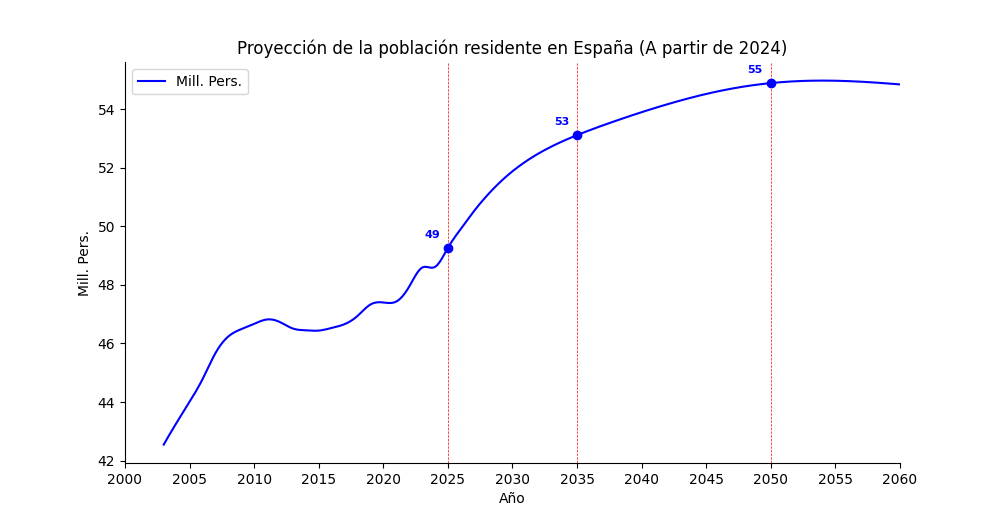

In [68]:
# @title Grafica de la proyeccion de la poblacion residente en España

# Definimos una función para graficar una serie suavizada con hitos y etiquetas personalizables
def _plot_smooth_series(series, series_name, color, label_position, ax):
    # Extraemos los valores de 'Año' y 'Mill. Pers.'
    xs = series['Año']
    ys = series['Mill. Pers.']

    # Interpolación suave para una curva continua
    xs_new = np.linspace(xs.min(), xs.max(), 300)
    spline = make_interp_spline(xs, ys, k=3)
    ys_smooth = spline(xs_new)

    # Graficamos la serie suavizada
    line, = ax.plot(xs_new, ys_smooth, label=series_name, color=color)

    # Marcamos los hitos en los años 2025, 2035 y 2050
    for year in [2025, 2035, 2050]:
        if year >= xs.min() and year <= xs.max():
            x_hito = year
            y_hito = spline(x_hito)
            ax.axvline(x=x_hito, color='red', linestyle='--', linewidth=0.5)
            ax.plot(x_hito, y_hito, 'o', color=color)

            # Calculamos el desplazamiento relativo en función de la escala del gráfico
            x_offset = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.01
            y_offset = (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.02

            # Ajustamos posición según el argumento label_position
            if label_position == 'above_left':
                x_pos, y_pos = x_hito - x_offset, y_hito + y_offset
                ha, va = 'right', 'bottom'
            elif label_position == 'below_right':
                x_pos, y_pos = x_hito + x_offset, y_hito - y_offset
                ha, va = 'left', 'top'

            # Agregamos la etiqueta en la posición calculada
            ax.text(x_pos, y_pos, f'{y_hito:.0f}', color=color, ha=ha, va=va,
                    fontsize=8, weight='bold')

    return line  # Retornamos la línea graficada para interactividad

# Configuración de la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 5.2))

# Ordenamos el DataFrame por año para asegurar el orden correcto
df_poblacion_sorted = df_poblacion.sort_values('Año', ascending=True)

# Graficamos la serie suavizada con etiquetas personalizables
line = _plot_smooth_series(
    df_poblacion_sorted, 'Mill. Pers.', color='blue', label_position='above_left', ax=ax
)

# Configuración del eje X
ax.set_xticks(np.arange(2000, df_poblacion_sorted['Año'].max() + 1, 5))
ax.set_xlim(2000, 2060)
ax.set_xlabel('Año')

# Configuración del eje Y
ax.set_ylabel('Mill. Pers.')
fig.canvas.toolbar_visible = False

# Estilo y leyenda
sns.despine(fig=fig, ax=ax)
plt.title('Proyección de la población residente en España (A partir de 2024)')
ax.legend(loc='upper left')

# Añadimos interactividad con mplcursors solo para la línea principal
cursor = mplcursors.cursor([line], hover=True)

# Configuramos la etiqueta que aparece al pasar el ratón
# Para que la etiqueta desaparezca o s epueda poner relanzar la grafica
@cursor.connect("add")
def on_add(sel):
    x_data, y_data = sel.target
    sel.annotation.set_text(f'Año: {int(x_data)}\nPoblación: {y_data:.0f}')
    sel.annotation.get_bbox_patch().set(alpha=0.8, color='white', edgecolor='blue')

'''
Activar si se desea guardar la grafica como png
'''

# # Guardamos el gráfico como archivo PNG
# plt.savefig(
#     os.path.join(directorio_resultados, 'Rtrn-A01-Proyeccion-Final-Poblacion.png'),
#     format='png', dpi=300, bbox_inches='tight'
# )

# Mostramos el gráfico
plt.show()


# **EVOLUCION DEL PARQUE DE vehiculoS EN FUNCION DE LA POBLACION**

#### **Explicación del cálculo de la proyección**

Modelo basado en crecimiento proporcional con suavización.

Utilizamos un enfoque iterativo donde el crecimiento total de Mill. de vehículos está:

- Proporcional al crecimiento de 'Mill. Pers.'.
- Convergiendo hacia una proporción máxima establecida por los valores de 2005 y 2023.

**Fórmula:**

Para cada año A (2024 en adelante):
- D(A,C)=D(A−1,C)+ΔP(A)⋅factor de convergencia

Donde:

- ΔP(A)=P(A)−P(A−1): Incremento de población en el año A.
- Factor de convergencia: Una proporción que se ajusta gradualmente para reflejar la convergencia observada entre 2005 y 2023. Puede ser:

factor de convergencia=P(2023)−P(2005)D(2023,C)−D(2005,C)

En esta formula:

- 'A' representa el año​
- 'D' es la variable de calculo
- 'C' es la categoria
- 'P' es la poblacion

**Ventajas:**

- Asegura que el crecimiento total del parque de vehículos esté ligado directamente al crecimiento poblacional.
- Incorpora un mecanismo para que el total converja de manera controlada.
- Ignora los picos producidos por eventualidades ajenas a una proyección, como crisis económicas y pandemias.

**Notas adicionales:**

- Este enfoque es conservador, ya que su tendencia no suele provocar que la curva proyectada sobrepase a la de referencia si están muy separadas. Si la sobrepasa y converge en algún punto, el suavizado provoca una tendencia al paralelismo de las curvas.  
- Si se desea un enfoque menos conservador, se puede usar un promedio medio ponderado o tendencia de años consecutivos con un valor típico \( n \) de entre 3 y 5 años, para un ajuste de crecimiento más rápido o más lento. Esto hace que la proyección sea más estable y refleje mejor las tendencias de los datos históricos.  
  Valores típicos para \( n \) serían:
  - **Si tienes muchos datos históricos (2014-2022):** \( n = 5 \)
  - **Si los datos son limitados:** \( n = 3 \)

# **Dataframes y graficas**

In [69]:
# @title Evolución del parque de vehículos en función de la población

'''
Creacion del dataframe base
Extraccion del excel
Verificacion de datos
Renombrado y ordenamiento de columnas
'''

# Parque de vehículos (DataFrame df)
df = pd.read_excel('Ctg-B01.xlsx', sheet_name='parque_tipos' )

# Funcion de verificacion y correcion de totales
def verificar_y_corregir_total(df):
    # Verifica fila por fila
    for index, row in df.iterrows():
        suma_columnas = row.drop(labels=['Años', 'Total']).sum()  # Suma de columnas excepto 'Años' y 'Total'
        if suma_columnas != row['Total']:
            df.at[index, 'Total'] = round(suma_columnas, 8)  # Redondear a 8 decimales

    return df

# Llama a la función de verificacion y correcion de totales
df = verificar_y_corregir_total(df)

# Eliminar la columna 'Remolques y\nSemirremolques' y 'Otros\nVehículos' restando sus valores al total
df['Total'] = round(df['Total'] - (df['Remolques y\nSemirremolques'] + df['Otros\nVehículos']), 8)
df = df.drop(columns=['Remolques y\nSemirremolques', 'Otros\nVehículos'])

# Reordenar las columnas en el DataFrame
nuevo_orden_columnas = [
    'Años', 'Total', 'Turismos', 'Motocicletas', 'Ciclomotores',
    'Autobuses', 'Tractores\nIndustriales', 'Camiones y\nfurgonetas'
]

df = df.reindex(columns=nuevo_orden_columnas)

'''
Extraccion del resto de dataframes y adicion al principal
'''

# Unir datos de las hojas parque_camiones y parque_furgonetas a la copia del df en funcion de su año
# Cargar las hojas adicionales con la columna 'Años' incluida
df2 = pd.read_excel('Ctg-B01.xlsx', sheet_name='parque_camiones')
df3 = pd.read_excel('Ctg-B01.xlsx', sheet_name='parque_furgonetas')

# Realizar el merge por la columna 'Años', excluyendo la columna 'Años' de df2 y df3 después de la combinación
df = df.merge(df2.drop(columns=['Años']), left_on='Años', right_on=df2['Años'], how='left')
df = df.merge(df3.drop(columns=['Años']), left_on='Años', right_on=df3['Años'], how='left')

# Eliminar df2 y df3
del df2, df3

'''
Preparacion de nuevo dataframe fusionado
Verificacion de datos
Renombrado de columnas
Eliminacion de filas con valores nulos
Convertir las unidades a millones
'''

# Renombrar columnas en df
df = df.rename(
    columns={
        'Años': 'Año',
        'TOTAL': 'Total Furgonetas',
        'Total_x': 'TOTAL',
        'Total_y': 'Total Camiones',
        'Camiones y\nfurgonetas': 'Total Camiones y Furgonetas',
        'Tractores\nIndustriales': 'Tractores Indust.'
    }
)

# Eliminar todas las filas que contienen algún valor nulo
df = df.dropna(how='any')

# Dividir todas las columnas excepto 'Año' por 1,000,000 y mostrar con 8 decimales
columnas_a_dividir = df.columns.difference(['Año'])
df[columnas_a_dividir] = df[columnas_a_dividir].astype(float)
df.loc[:, columnas_a_dividir] = (df.loc[:, columnas_a_dividir] / 1_000_000).round(8)

'''
Unir df_poblacion con df y reorganizar
'''

# Realizar el merge por la columna 'Año', excluyendo la columna 'Año' de df_poblacion
df = df.merge(df_poblacion.drop(columns=['Año']), left_on='Año', right_on=df_poblacion['Año'], how='left')

'''
Traer la columna Total al lado de año
'''

# Extraer el nombre de la última columna
ultima_columna = df.columns[-1]

# Reordenar las columnas para colocar la última columna justo después de 'Año'
columnas_reordenadas = (
    ['Año', ultima_columna] +
    [col for col in df.columns if col not in ['Año', ultima_columna]]
)

# Reasignar el DataFrame con el nuevo orden de columnas
df = df[columnas_reordenadas]

'''
Proceso de concatenacion de años y ordenar por el orden cronologico de los años
'''

# Convertir temporalmente la columna 'Año' a cadena en df_poblacion para la comparación
df_poblacion['Año'] = df_poblacion['Año'].astype(str)
df['Año'] = df['Año'].astype(str)

# Filtrar las filas de df_poblacion a partir del año 2024 convertido a cadena
df_poblacion_a_partir_2024 = df_poblacion[df_poblacion['Año'] >= '2024']

# Concatenar las filas filtradas de df_poblacion con df, asegurando que ambas tengan la misma estructura de columnas
df = pd.concat([df, df_poblacion_a_partir_2024], ignore_index=True)

# Convertir 'Año' nuevamente a enteros
df_poblacion['Año'] = df_poblacion['Año'].astype(int)
df['Año'] = df['Año'].astype(int)

# Ordenar el DataFrame por la columna 'Año' para mantener el orden cronológico
df = df.sort_values(by='Año').reset_index(drop=True)

'''
Se añade una columna de vehiculos electricos (hara falta posteriormente)
'''

# Crear columna vehiculos electricos (valor conocido 143.640 en 2023)
import numpy as np
df['Mill. EV'] = np.nan
df.loc[df['Año'] == 2023, 'Mill. EV'] = 143640 / 1000000

'''
Proyeccion
Creaccion de una funcion y posterior instanciacion para calcular los valores faltantes
de todas las columnas baasado en un crecimiento proporcional con suavización
'''

# Proyecciones con un modelo basado en crecimiento proporcional con suavización
def calcular_crecimiento_proporcional_todas_columnas(df, col_base, exclude_col, year_start, year_end):
    """
    Calcula la proyección proporcional de todas las columnas basadas en una columna principal,
    excepto las columnas excluidas.

    Args:
        df (pd.DataFrame): DataFrame que contiene los datos.
        col_base (str): Nombre de la columna base para calcular el crecimiento (e.g., 'Mill. Pers.').
        exclude_col (list): Lista de columnas a excluir del cálculo (e.g., ['Mill. EV']).
        year_start (int): Año a partir del cual se calculan las proyecciones.
        year_end (int): Año hasta el cual se calculan las proyecciones.

    Returns:
        None: Modifica el DataFrame original directamente.
    """
    # Obtener las columnas que deben ser procesadas
    columnas_a_procesar = [col for col in df.columns if col not in exclude_col and col != 'Año']

    # Obtener referencias para el cálculo de convergencia para cada columna
    referencias = {}
    for col_target in columnas_a_procesar:
        ref_start = df.loc[df['Año'] == year_start - 1]
        ref_2005 = df.loc[df['Año'] == 2005]

        if ref_start.empty or ref_2005.empty:
            raise ValueError(f"Datos insuficientes para realizar la proyección en la columna {col_target}.")

        factor_convergence = (ref_start[col_target].values[0] - ref_2005[col_target].values[0]) / \
                             (ref_start[col_base].values[0] - ref_2005[col_base].values[0])
        referencias[col_target] = factor_convergence

    # Realizar la proyección año por año
    for year in range(year_start, year_end + 1):
        prev_year = year - 1

        for col_target in columnas_a_procesar:
            # Obtener datos del año anterior
            mill_pers_current = df.loc[df['Año'] == year, col_base].values[0]
            mill_pers_prev = df.loc[df['Año'] == prev_year, col_base].values[0]
            total_prev = df.loc[df['Año'] == prev_year, col_target].values[0]

            # Incremento proporcional
            delta_pers = mill_pers_current - mill_pers_prev
            total_current = total_prev + delta_pers * referencias[col_target]

            # Actualizar el valor proyectado en el DataFrame, redondeando a 8 decimales
            df.loc[df['Año'] == year, col_target] = round(total_current, 8)


# Llamar a la función directamente sobre tu DataFrame
calcular_crecimiento_proporcional_todas_columnas(
    df=df,
    col_base='Mill. Pers.',
    exclude_col=['Mill. EV'],  # Lista de columnas que no deben procesarse
    year_start=2024,
    year_end=2060
)

'''
Reordemaniento del dataframe para una visualizacion mas concisa
Renoombrados y agrupaciones de categorias
'''

# Renombrar la columna 'TOTAL' a 'Mill. vehiculos' y pasar a df
df = df.rename(columns={'TOTAL': 'Mill. vehiculos'})

# Eliminar columnas que no interesan
df.drop(columns=['Total Camiones y Furgonetas', 'Total Camiones', 'Total Furgonetas'], inplace=True)

#Cambiar el nombre de la columna 'Hasta 499 kg' a 'Furg. Ligera'
df = df.rename(columns={'Hasta 499 kg': 'Furg. Ligera'})

#Cambiar el nombre de la columna 'Hasta 999\nkg' a 'Furg. Transporte'
df = df.rename(columns={'Hasta 999\nkg': 'Furg. Transporte'})

# Sumar el contenido original de la columna 8 junto con las columnas 16,17 y sobrescribir la columna 8
df.iloc[:, 8] = df.iloc[:, 8] + df.iloc[:, 16] + df.iloc[:, 17]

# Eliminar las columnas con índices 16 y 17
df.drop(df.columns[[16, 17]], axis=1, inplace=True)

# Mover columna 15 a posicion 8
# Reorganizar las columnas
cols = list(df.columns)  # Obtener la lista de todas las columnas
cols.insert(8, cols.pop(15))  # Mover la columna de índice 15 a la posición 8

# Reordenar el DataFrame
df = df[cols]

#Cambiar el nombre de la columna 'De 1000\n1499 Kg' a 'Camion medio'
df = df.rename(columns={'De 1000\n1499 Kg': 'Camion medio'})

# Sumar el contenido original de la columna 10 junto con las columnas 11,16 y sobrescribir la columna 10
df.iloc[:, 10] = df.iloc[:, 10] + df.iloc[:, 11] + df.iloc[:, 16]

# Eliminar las columnas con índices 11,16
df.drop(df.columns[[11, 16]], axis=1, inplace=True)

#Cambiar el nombre de la columna 'De 3000 a\n4999 Kg' a 'Camion pesado'
df = df.rename(columns={'De 3000 a\n4999 Kg': 'Camion pesado'})

# Sumar el contenido original de la columna 11 junto con las columnas 12,13,14 y sobrescribir la columna 11
df.iloc[:, 11] = df.iloc[:, 11] + df.iloc[:, 12] + df.iloc[:, 13] + df.iloc[:, 14]

# Eliminar las columnas con índices 12,13,14
df.drop(df.columns[[12, 13, 14]], axis=1, inplace=True)

'''
Salvado del dataframe como archivo excel
'''

# # Archivo Excel con el contenido actualizado de df
# df.to_excel(
#     os.path.join(directorio_resultados, 'Rtrn-B01-Proyeccion-Parque-vehiculos.xlsx'),
#     sheet_name='Proyeccion-Parque-vehiculos',
#     index=False
# )

'''
Presentacion del dataframe desde una copia para que no afecte al original
'''

# Crear una copia del DataFrame para la presentación
df_copy = df.copy()

# Redondear todas las columnas numéricas a 3 decimales excepto 'Año'
for column in df_copy.select_dtypes(include=['float64', 'int64']).columns:
    if column != 'Año':
        df_copy[column] = df_copy[column].round(3)
    else:
        df_copy[column] = df_copy[column].astype(int)

# Configurar pandas para mostrar valores de coma flotante con 3 decimales
pd.set_option('display.float_format', '{:.3f}'.format)

# Usar la función del módulo Display_df.py para presentar tabla
df_copy = df_copy.set_index(df_copy.columns[0])  # Convierte la primera columna en el índice
df_copy.index.name = None  # Esto elimina "Año" como nombre del índice
Display_df.display_dataframe_with_scroll(
    df=df_copy,
    title='Evolución del parque de vehículos en función de la población',
    separator_indices=[1, 2, 11]
)


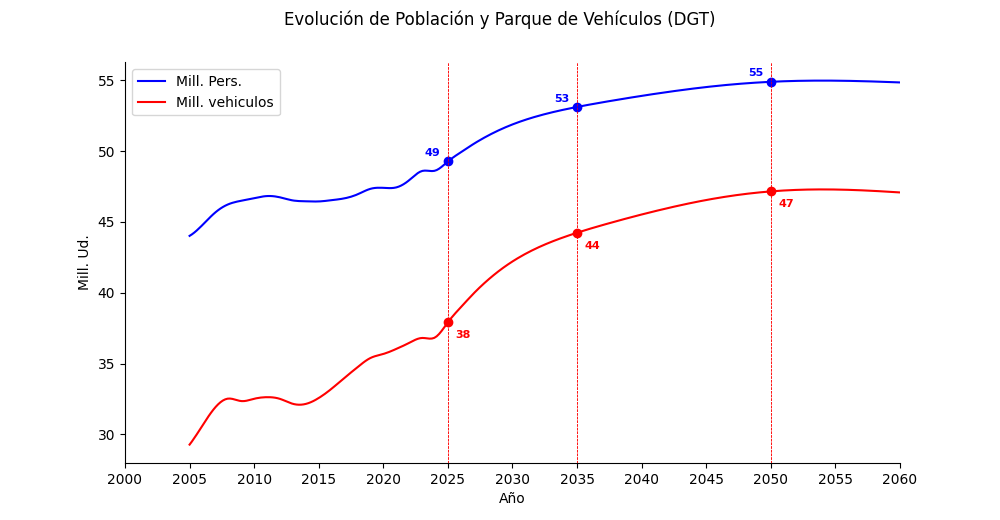

In [70]:
# @title Grafica de la evolucion del parque de vehiculos en funcion de la poblacion

# Definimos una función para graficar una serie suavizada con hitos y etiquetas personalizables
def _plot_smooth_series(series, y_column, series_name, color, label_position, ax):
    # Extraemos los valores de 'Año' y la columna especificada
    xs = series['Año']
    ys = series[y_column]

    # Interpolación suave para una curva continua
    xs_new = np.linspace(xs.min(), xs.max(), 300)
    spline = make_interp_spline(xs, ys, k=3)
    ys_smooth = spline(xs_new)

    # Graficamos la serie suavizada y devolvemos la línea creada
    line, = ax.plot(xs_new, ys_smooth, label=series_name, color=color)

    # Marcamos los hitos en los años 2025, 2035 y 2050
    for year in [2025, 2035, 2050]:
        if year >= xs.min() and year <= xs.max():
            x_hito = year
            y_hito = spline(x_hito)
            ax.axvline(x=x_hito, color='red', linestyle='--', linewidth=0.5)
            ax.plot(x_hito, y_hito, 'o', color=color)

            # Calculamos el desplazamiento relativo en función de la escala del gráfico
            x_offset = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.01
            y_offset = (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.02

            # Ajustamos posición según el argumento label_position
            if label_position == 'above_left':
                x_pos, y_pos = x_hito - x_offset, y_hito + y_offset
                ha, va = 'right', 'bottom'
            elif label_position == 'below_right':
                x_pos, y_pos = x_hito + x_offset, y_hito - y_offset
                ha, va = 'left', 'top'

            # Agregamos la etiqueta en la posición calculada
            ax.text(x_pos, y_pos, f'{y_hito:.0f}', color=color, ha=ha, va=va,
                    fontsize=8, weight='bold')

    return line

# Configuración de la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 5.2))

# Ordenamos el DataFrame por año para asegurar el orden correcto
df_sorted = df.sort_values('Año', ascending=True)

# Graficamos las series suavizadas con etiquetas personalizables
line1 = _plot_smooth_series(df_sorted, 'Mill. Pers.', 'Mill. Pers.', color='blue', label_position='above_left', ax=ax)
line2 = _plot_smooth_series(df_sorted, 'Mill. vehiculos', 'Mill. vehiculos', color='red', label_position='below_right', ax=ax)

# Configuración del eje X
ax.set_xticks(np.arange(2000, df_sorted['Año'].max() + 1, 5))
ax.set_xlim(2000, 2060)
ax.set_xlabel('Año')

# Configuración del eje Y
ax.set_ylabel('Mill. Ud.')
fig.canvas.toolbar_visible = False

# Estilo y leyenda
sns.despine(fig=fig, ax=ax)
fig.suptitle('Evolución de Población y Parque de Vehículos (DGT)')
ax.legend(loc='upper left')

# Interactividad con mplcursors para ambas curvas
cursor = mplcursors.cursor([line1, line2], hover=True)

@cursor.connect("add")
def on_add(sel):
    # Identificamos qué línea ha sido seleccionada y asignamos el color correspondiente
    if sel.artist == line1:
        serie = 'Población'
        color = 'blue'  # Color de la curva de población
    elif sel.artist == line2:
        serie = 'Parque Vehicular'
        color = 'red'  # Color de la curva de parque vehicular

    # Configuramos el texto de la etiqueta
    x_data, y_data = sel.target
    sel.annotation.set_text(f'Año: {int(x_data)}\n{serie}: {y_data:.0f}')

    # Configuramos el estilo de la etiqueta con el color de la curva
    sel.annotation.get_bbox_patch().set(alpha=0.8, color='white', edgecolor=color)

# # Guardamos el gráfico como archivo PNG
# plt.savefig(
#     os.path.join(directorio_resultados, 'Rtrn-B01-Proyeccion-Parque-vehiculos.png'),
#     format='png', dpi=300, bbox_inches='tight'
# )

# Mostramos el gráfico
plt.show()

#### **Observaciones sobre la grafica**

**La curva roja** representa el incremento en el parque de vehiculos en funcion del crecimiento de la poblacion (curva azul), basado en datos de la DGT. Estos no representa tampoco literalmente el numero de vehiculos en circulacion, no todos los matriculados circulan, (colecciones privadas etc...) y no tiene en cuenta transporte de mercancias con origen o destino en el extrangero (dependientes del consumo que si esta relacionado con el volumen de la poblacion cuando se enmarca en un contexto especifico como el de un pais en concreto).

**Esta curva roja**, (parque vehicular) es un dato orientativo ya que depende solo de una variable como es el incremento de la poblacion residente en España, (aunque si el mas representativo teniendo un peso igual o superior al resto de factores socioeconomicos juntos en una economia avanzada).Otros factores socioeconomicos de influencia que no tendremoes en cuenta podrian ser:

- Uno es la repercusion de futuras crisis mundiales y sus efectos. Vemos por ejemplo el paron en el crecimiento del parque de vehiculos en los periodos de maximo efecto de la crisis del 2008 y como enlaza con la la crisis del 2012, y no empieza a repuntar hasta finales del 2015.

- Otro factor que estimula son las subenciones del gobierno y concesionarios, pero tampoco podemos predecir si las daran y sus efectos que suele ser un efecto de reposicion, vehiculo nuevo por viejo aunque no signifique la destruccion del viejo, sino una posterior reventa.

- Otros determinantes junto con la poblacion, seria el IPC vs crecimiento salarial, para nuevas adquisiciones y el indice de consumo, que aumenta la necesidad de transporte por mercancias, por ejemplo.

Todas estas variables muy arbitrarias y cuyas predicciones se suelen hacer a 2 años vista maximo hace dificil su incorporacion.

# **PROYECCION DEL CONSUMO DE ENERGIA EN FUNCION DEL PARQUE DE Veh CONVENCIONAL**

# **Dataframes y graficas**

In [71]:
# @title Proy. del consumo de energía en función del parque de Veh convencional

'''
Extrameos el dataframe de los consumos de energia en el transporte
y lo ponemos con los decimales que queremos trabajar
'''

# Dataframes de tablas externas
df4 = pd.read_excel('Ctg-C01.xlsx')

# Redondea todas las columnas numéricas a 8 decimales
df4 = df4.apply(lambda x: x.round(8) if x.dtype == 'float' or x.dtype == 'int' else x)

'''
Limpiamos filas y columnas que no vamos a usar
Nos aseguramos de que el nombre de la columna sea 'Año' identico a demas dataframe
Convertimos la primera fila en los nuevos cabeceros
'''

# Mantener solo las filas antes de la novena (índice 8)
df4 = df4.iloc[:8]

# Eliminar la primera fila
df4 = df4.iloc[1:]

# Eliminar las dos primeras columnas
df4 = df4.iloc[:, 2:]

# Cambiar el valor de la primera celda (primera fila, primera columna) a 'Año'
df4.iat[0, 0] = 'Año'

# Guardar la primera fila como las nuevas cabeceras y convertir los valores numéricos a enteros
new_headers = df4.iloc[0].apply(lambda x: int(x) if isinstance(x, float) and x.is_integer() else x)

# Eliminar la primera fila y asignar las nuevas cabeceras
df4 = df4[1:]
df4.columns = new_headers

'''
Trasponemos la tabla para mantener el criterio de dataframe previos
Arreglamos cabeceras si es preciso
Convertimos datos menos años en flotantes con 8 decimales
'''

# Transponer df4 sin eliminar el índice (para mantener 'Año' como parte de los datos)
df4 = df4.transpose().reset_index()

# Asignar la primera fila como nuevas cabeceras sin eliminar 'Año'
df4.columns = df4.iloc[0]
df4 = df4[1:].reset_index(drop=True)

# Renombrar la primera columna como 'Año' para asegurar que el nombre esté correcto
df4.rename(columns={df4.columns[0]: 'Año'}, inplace=True)

# Cambiar el nombre de la cabecera de la cuarta columna
df4.rename(columns={df4.columns[3]: 'GLP'}, inplace=True)

# Convertir los datos desde la columna 2 hasta la última a numéricos y redondear a 8 decimales
df4.iloc[:, 1:] = df4.iloc[:, 1:].apply(pd.to_numeric, errors='coerce').round(8)

'''
Pasamos de TJ a GWh con redondeo de 8 decimales
y creamos la columna Total GW/h
'''

# Multiplicar los datos desde la columna 2 hasta la última por 0.277778 (TJ a GW/h)
# Convertir columnas a numéricas antes de la multiplicación
for col in df4.columns[1:]:  # Iterar a través de columnas desde la segunda
    df4[col] = pd.to_numeric(df4[col], errors='coerce')  # Convertir a numérico
df4.iloc[:, 1:] = df4.iloc[:, 1:] * 0.277778

# Redondear los datos de la columna 2 hasta la última a 8 decimales
df4.iloc[:, 1:] = df4.iloc[:, 1:].round(8)

# Crear la columna 'Total GW/h' con la suma de las columnas de la 2 a la 6 para cada fila y redondear a 8 decimales
df4['Total GW/h'] = df4.iloc[:, 1:6].sum(axis=1).round(8)

'''
Extraemos datos de df y df4 y los unimos en funcion del año
Eliminamos filas anteriores al año 2014
'''

# Unir df y df4 en df7 en función del año
df7 = df[['Año', 'Mill. vehiculos']].merge(df4[['Año', 'Total GW/h']], on='Año', how='left')

# Eliminar filas anteriores al año 2014
df7 = df7[df7['Año'] >= 2014].reset_index(drop=True)

'''
Proyeccion
Creaccion de una funcion y posterior instanciacion para calcular los valores faltantes
de todas las columnas basado en un crecimiento proporcional con suavización
'''

# Proyección con un modelo basado en crecimiento proporcional con suavización
# Criterio adicional: Se ignora 2020 y 2021 por pandemia y secuelas
# Se hace transición directa 2019 a 2022 año de recuperación
def calcular_crecimiento_proporcional_unica_columna(df, col_base, col_target, year_start, year_end):
    """
    Calcula la proyección proporcional de una única columna basada en otra,
    ignorando años específicos en los cálculos.

    Args:
        df (pd.DataFrame): DataFrame que contiene los datos.
        col_base (str): Nombre de la columna base para calcular el crecimiento (e.g., 'Mill. vehiculos').
        col_target (str): Nombre de la columna objetivo a proyectar (e.g., 'Total GW/h').
        year_start (int): Año a partir del cual se calculan las proyecciones.
        year_end (int): Año hasta el cual se calculan las proyecciones.

    Returns:
        None: Modifica el DataFrame original directamente.
    """
    # Obtener referencias para el cálculo de convergencia
    ref_start = df.loc[df['Año'] == 2019]  # Año final de los datos disponibles para cálculo
    ref_2014 = df.loc[df['Año'] == 2014]  # Año inicial de los datos

    if ref_start.empty or ref_2014.empty:
        raise ValueError("Datos insuficientes para realizar la proyección.")

    # Calcular factor de convergencia
    factor_convergence = (ref_start[col_target].values[0] - ref_2014[col_target].values[0]) / \
                         (ref_start[col_base].values[0] - ref_2014[col_base].values[0])

    # Realizar la proyección año por año, ignorando 2020 y 2021
    for year in range(year_start, year_end + 1):
        # Determinar el año anterior válido para el cálculo
        if year == 2022:
            prev_year = 2019  # Salta directamente del 2019 al 2022
        elif year in [2020, 2021]:
            continue  # Ignora estos años por completo
        else:
            prev_year = year - 1  # Año consecutivo normal

        # Obtener datos del año anterior
        mill_veh_current = df.loc[df['Año'] == year, col_base].values[0]
        mill_veh_prev = df.loc[df['Año'] == prev_year, col_base].values[0]
        total_prev = df.loc[df['Año'] == prev_year, col_target].values[0]

        # Incremento proporcional
        delta_veh = mill_veh_current - mill_veh_prev
        total_current = total_prev + delta_veh * factor_convergence

        # Actualizar el valor proyectado en el DataFrame, redondeando a 8 decimales
        df.loc[df['Año'] == year, col_target] = round(total_current, 8)


# Aplicar la función directamente sobre el DataFrame df7
calcular_crecimiento_proporcional_unica_columna(
    df=df7,
    col_base='Mill. vehiculos',
    col_target='Total GW/h',
    year_start=2022,  # Los datos empiezan a rellenarse a partir de 2022
    year_end=2060
)

'''
Salvado del dataframe como archivo excel
'''

# # Guardar en un archivo Excel el contenido actualizado de df7
# df7.to_excel(
#     os.path.join(directorio_resultados, 'Rtrn-C01-Proy-eFosil-Transp-Vial.xlsx'),
#     sheet_name='Proy-eFosil-Transp-Vial',
#     index=False
# )

'''
Presentacion de la tabla
'''

# Crear una copia de df7 para la presentación con valores redondeados a 3 decimales
df7_copy = df7.copy()
for column in df7_copy.select_dtypes(include=['float64', 'int64']).columns:
    if column != 'Año':
        df7_copy[column] = df7_copy[column].round(3)
    else:
        df7_copy[column] = df7_copy[column].astype(int)

# Configurar pandas para mostrar valores de coma flotante con 3 decimales
pd.set_option('display.float_format', '{:.3f}'.format)

# Usar la función del módulo Display_df.py para presentar df7_copy
df7_copy = df7_copy.set_index(df7_copy.columns[0])  # Convierte la primera columna en el índice
df7_copy.index.name = None  # Esto elimina "Año" como nombre del índice
Display_df.display_dataframe_with_scroll(
    df=df7_copy,
    title='Proy. del consumo de energía en función del parque de Veh convencional',
    separator_indices=[1]
)


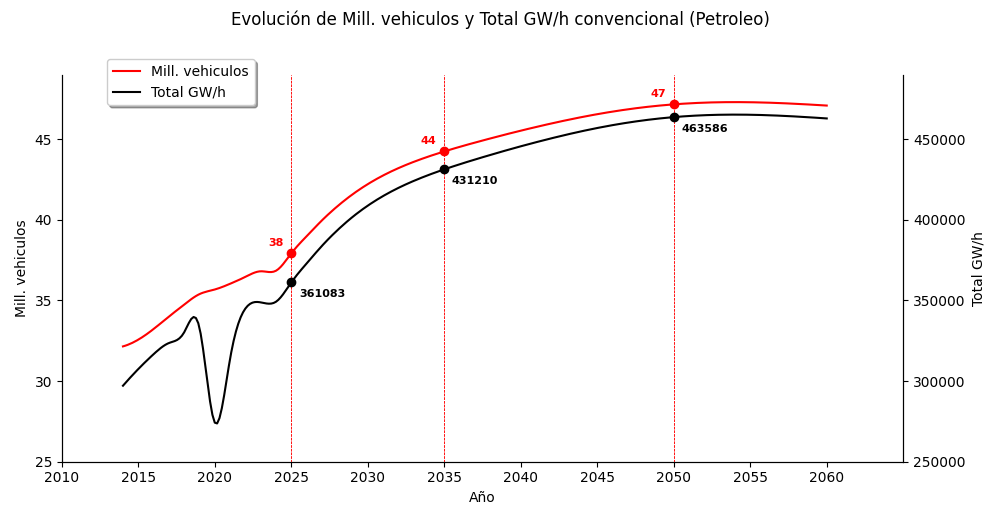

In [72]:
# @title Grafica proyeccion del consumo de energia en funcion del parque de vehiculos convencional

# Definimos una función para graficar una serie suavizada con hitos y etiquetas
def _plot_smooth_series(series, y_column, series_name, color, label_position, ax):
    # Extraemos los valores de 'Año' y la columna especificada
    xs = series['Año']
    ys = series[y_column]

    # Interpolación suave para una curva continua
    xs_new = np.linspace(xs.min(), xs.max(), 300)
    spline = make_interp_spline(xs, ys, k=3)
    ys_smooth = spline(xs_new)

    # Graficamos la serie suavizada y devolvemos la línea creada
    line, = ax.plot(xs_new, ys_smooth, label=series_name, color=color)

    # Marcamos los hitos en los años 2025, 2035 y 2050
    for year in [2025, 2035, 2050]:
        if year >= xs.min() and year <= xs.max():
            x_hito = year
            y_hito = spline(x_hito)
            ax.axvline(x=x_hito, color='red', linestyle='--', linewidth=0.5)
            ax.plot(x_hito, y_hito, 'o', color=color)

            # Calculamos el desplazamiento relativo en función de la escala del gráfico
            x_offset = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.01  # 1% del ancho del gráfico
            y_offset = (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.02  # 2% de la altura del gráfico

            # Ajustamos posición según el argumento label_position
            if label_position == 'above_left':
                x_pos, y_pos = x_hito - x_offset, y_hito + y_offset
                ha, va = 'right', 'bottom'
            elif label_position == 'below_right':
                x_pos, y_pos = x_hito + x_offset, y_hito - y_offset
                ha, va = 'left', 'top'

            # Agregamos la etiqueta en la posición calculada con el formato "{Año}: {Valor}"
            ax.text(x_pos, y_pos, f'{y_hito:.0f}', color=color, ha=ha, va=va,
                    fontsize=8, weight='bold')

    return line

# Configuración de la figura y los ejes
fig, ax1 = plt.subplots(figsize=(10, 5.2))

# Ordenamos el DataFrame por año para asegurar el orden correcto
df_sorted = df7.sort_values('Año', ascending=True)

# Primer eje y para 'Mill. vehiculos' con etiquetas arriba a la izquierda
line1 = _plot_smooth_series(df_sorted, 'Mill. vehiculos', 'Mill. vehiculos', color='red', label_position='above_left', ax=ax1)
ax1.set_ylabel('Mill. vehiculos')
ax1.set_ylim(25, 49)
fig.canvas.toolbar_visible = False

# Segundo eje y para 'Total GW/h' con etiquetas abajo a la derecha
ax2 = ax1.twinx()
line2 = _plot_smooth_series(df_sorted, 'Total GW/h', 'Total GW/h', color='black', label_position='below_right', ax=ax2)
ax2.set_ylabel('Total GW/h')
ax2.set_ylim(250000, 490000)
fig.canvas.toolbar_visible = False

# Configuración del eje X
ax1.set_xticks(np.arange(2010, df_sorted['Año'].max() + 1, 5))
ax1.set_xlim(2010, 2065)
ax1.set_xlabel('Año')

# Estilo y leyenda
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

fig.suptitle('Evolución de Mill. vehiculos y Total GW/h convencional (Petroleo)')
fig.tight_layout(rect=[0, 0, 1, 0.95])

# Leyenda combinada dentro del gráfico
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

fig.legend(lines + lines2, labels + labels2, loc='upper left',
           bbox_to_anchor=(0.1, 0.9),  # Dentro del gráfico
           fancybox=True, shadow=True, ncol=1)  # Una columna

# Interactividad con mplcursors para ambas curvas
cursor = mplcursors.cursor([line1, line2], hover=True)

@cursor.connect("add")
def on_add(sel):
    # Identificamos qué línea ha sido seleccionada y asignamos el color correspondiente
    if sel.artist == line1:
        serie = 'Mill. vehiculos'
        color = 'red'  # Color de la curva de Mill. vehiculos
    elif sel.artist == line2:
        serie = 'Total GW/h'
        color = 'black'  # Color de la curva de Total GW/h

    # Configuramos el texto de la etiqueta
    x_data, y_data = sel.target
    sel.annotation.set_text(f'Año: {int(x_data)}\n{serie}: {y_data:.0f}')

    # Configuramos el estilo de la etiqueta con el color de la curva
    sel.annotation.get_bbox_patch().set(alpha=0.8, color='white', edgecolor=color)

# # Guardamos el gráfico como archivo PNG
# plt.savefig(
#     os.path.join(directorio_resultados, 'Rtrn-C01-Proy-eFosil-Transp-Vial.png'),
#     format='png', dpi=300, bbox_inches='tight'
# )

# Mostramos el gráfico
plt.show()


### **Observaciones sobre la grafica y el modelo**

#### **Observaciones sobre la grafica**

- La grafica representa una evolucion si todo siguiese con el planteamiento de movilidad tradicional y la curva de energia se representa en negro para enfatizar que proviene del petroleo aunque este en GW/h

- La grafica muestra **la necesidad de energia proyectada para el sector transporte por carretera a nivel nacional** hasta el año 2060 con hitos relevantes. TODA ESTA ENERGIA que actualmente depende del sector del petroleo  PASARA A SER ENERGIA VERDE, es decir, vehiculos electricos, de hidrogeno o de combustion e-Fuel, en resumen vehiculos de cero emisiones.

- LOS COMBUSTIBLES e-FUEL son conbustibles sinteticos que se producen artificialmente apartir de hidrogeno y CO2. Solo se consideran de emision cero si se producen apartir de H2 verde, (ni gris, ni azul) y de CO2 extraido exclusivamente de la atmosfera. Aunque se puede usar en motores de combustion clasica, en la actualidad su eficiencia es varias veces inferior veces inferior a los combustibles , 3.33 para gasolina y 2.86 en diesel y su tecnologia de produccion es cara. Aunque no se descarta su implementacion NO TENDREMOS EN CUENTA ESTA TECNOLOGIA en este estudio.

- LA VENTA MARGINAL DE vehiculoS DE HIDROGENO situa su mercado segun chat GPT en un 0% respecto del parque total de vehiculos. La hoja de ruta del hidrogeno del gobierno de España solo marca para el 2030 un total de ventas de vehiculos de hidrogeno de 7500 unidades maximo con la implantacion de 250 hidrogeneras, lo cual sigue siendo a efectos practicos un 0%. Se prevee que aumente significativamente para el 2050 en vehiculos pesados y en la industria (que no nos afecta a este ultimo para el estudio) sin dar datos concretos debido a la ausencia aun de tecnologias rentables y de almacenamiento. Por estos motivos NO TENDREMOS EN CUENTA ESTA TECNOLOGIA en este estudio.

#### **Observaciones sobre el modelo**

- NO PARECERIA DEL TODO EXACTO afirmar que el consumo energetico del sector transporte esta directamente proporcionado al parque de automoviles, ya que un 34% aproximadamente del transporte de mercancias de exportacion e importacion se realiza con vehiculos no matriculados en España. No obstante este tipo de transporte esta asociado a camiones pesados que representan aproximadamente un 2.8% del parque automovilistico. El resto de vehiculos fuera del parque como turismos extrangeros en epocas de turismo su porcentaje se considera cero. Teniendo solo en cuenta el factor de mercancias con origen o destino en el extrangero, el MARGEN DE ERROR en la proyeccion del consumo de energia asociado al parque de automoviles es de 2.8*0.34 = 0.95%.No obstante, este margen de error, podemos considerarlo absorvido al usarse la tabla Ctg-C01 donde se considera la energia consumida en todo el transporte nacional por carreteras españolas, incluido el que hay con origen y destino en el extrangero, pero que consume energia originada en España durante el transito por nuestras carreteras.

#### **Calculo del modelo**

Tambien se ha basado en un crecimiento proporcional con suavizacion explicado con anterioridad

# **MATRICULACIONES Y BAJAS (VERIFICACION DE ERRORES)**

#### **Planteamiento**

El crecimiento del parque de vehiculos depende de las nuevas matriculaciones menos los vehiculos que se dan de baja. No se tiene en cuenta el cambio de titularidad que no afecta al parque total.

Vamos a contrastar los datos que tenemos sobre el parque de vehiculos en España con las matriculaciones y las bajas, entre el 2014 y el 2023, que son los datos que disponemos de la DGT.

#### **Explicacion de la desviacion y correccion**

La principal causa que origina estas desviaciones son debidas a los retrasos en los tramites de la contabilizacion real de las bajas de los vehiculos. Si bien tambien pueden ser atribuidos a ciertos retrasos en matriculaciones con permisos de circulacion temporales su incidencia es mucho menor al ser situaciones muy escasas.

Lo que haremos para trabajar con un dataframe sin incoherencias asumir que todo el error es producido en las bajas de vehiculos y añadirselo, tanto al total como proporcionalmente a sus columnas.

# **Dataframes**

In [73]:
# @title Matriculaciones de vehículos hasta el 2023 según DGT

# Matriculaciones (Dataframe df16)
df10 = pd.read_excel('Ctg-B02.xlsx', sheet_name='Matr_tipo_veh')

# Cambiar el nombre de la columna 'Años' a 'Año' (si existe)
df10 = df10.rename(columns={'Años': 'Año'})

# Eliminar filas anteriores al año 2014
df10 = df10[df10['Año'] >= 2014].reset_index(drop=True)

# Borra columnas por índice de columna
df10.drop(df10.columns[[6, 7]], axis=1, inplace=True)

# Se añade las matriculaciones de ciclomotores y se reordena
df11 = pd.read_excel('Ctg-B02.xlsx', sheet_name='Matr_ciclomotores')

# Eliminar todas las filas menos la primera y la última en df11
df11 = df11.iloc[[-1]]

# Cambiar el nombre de la columna 'Provincias' a 'Año' (si existe)
df11 = df11.rename(columns={'Provincias': 'Año'})

# Transponer df11 sin eliminar el índice (para mantener 'Año' como parte de los datos)
df11 = df11.transpose().reset_index()

# Asignar la primera fila como nuevas cabeceras sin eliminar 'Año'
df11.columns = df11.iloc[0]
df11 = df11[1:].reset_index(drop=True)

# Cambiar el nombre de la columna 'Total' a 'Ciclomotores'
df11 = df11.rename(columns={'Total': 'Ciclomotores'})

# Eliminar filas anteriores al año 2014
df11 = df11[df11['Año'] >= 2014].reset_index(drop=True)

# Unir df10 y df11 en df12 en función del año
df12 = df10.merge(df11, on='Año', how='left')

# Reordenar las columnas según el orden deseado
df12 = df12[['Año', 'Turismos', 'Motocicletas', 'Ciclomotores', 'Autobuses', 'Tractores\nindustriales', 'Camiones y\nfurgonetas']]

# Dataframe furgonetas ligeras y de transporte
df13 = pd.read_excel('Ctg-B02.xlsx', sheet_name='Matr_camio_men_3500_furg_car')

# Eliminar filas anteriores al año 2014
df13 = df13[df13['Año'] >= 2014].reset_index(drop=True)

# Cambiar el nombre de la columna 'Hasta 499 kg' a 'Furg. Ligera'
df13 = df13.rename(columns={'Hasta 499 kg': 'Furg. Ligera'})

# Cambiar el nombre de la columna 'Total' a 'Furg. Transporte'
df13 = df13.rename(columns={'Total': 'Furg. Transporte'})

# Sumar las columnas de índice 2, 3 a la columna de índice 5
df13.iloc[:, 5] = round(df13.iloc[:, 2] + df13.iloc[:, 3], 8)

# Eliminar las columnas con índices 2, 3 y 4
df13.drop(df13.columns[[2, 3, 4]], axis=1, inplace=True)

# Unir df12 y df13 en df14 en función del año
df14 = df12.merge(df13, on='Año', how='left')

# Se añade a matriculaciones camiones medios y pesados. Se quita total de furgonetas y camiones
df15 = pd.read_excel('Ctg-B02.xlsx', sheet_name='Matr_todos_cam_furg_carga')

# Eliminar filas anteriores al año 2014
df15 = df15[df15['Año'] >= 2014].reset_index(drop=True)

# Eliminar las columnas con índice 1
df15.drop(df15.columns[[1]], axis=1, inplace=True)

# Cambiar el nombre de columna
df15 = df15.rename(columns={'De 1000 a\n2999 kg': 'Camion medio'})
df15 = df15.rename(columns={'De 3000 a\n4999 kg': 'Camion pesado'})

# Sumar el contenido original de la columna 2 junto con las columnas 3, 4 y 5, y sobrescribir la columna 2
df15.iloc[:, 2] = round(df15.iloc[:, 2] + df15.iloc[:, 3] + df15.iloc[:, 4] + df15.iloc[:, 5], 8)

# Eliminar las columnas con índices 3, 4, 5 y 6
df15.drop(df15.columns[[3, 4, 5, 6]], axis=1, inplace=True)

# Unir df14 y df15 en df16 en función del año
df16 = df14.merge(df15, on='Año', how='left')

# Eliminar df10, df11, df12, df13, df14, df15
del df10, df11, df12, df13, df14, df15

# Eliminar las columnas con índices 6
df16.drop(df16.columns[[6]], axis=1, inplace=True)

# Cambiar el nombre de la columna 'Tractores\nindustriales' a 'Tractores Indust.'
df16 = df16.rename(columns={'Tractores\nindustriales': 'Tractores Indust.'})

# Pasar a mill. de unidades y redondear a 8 decimales
for col in df16.columns[1:]:
    df16[col] = df16[col].astype('float64') / 1000000
    df16[col] = df16[col].round(8)

# Crear y calcular 'Total Matriculaciones' como la suma de todas las columnas excepto la primera
df16['Mill. Matriculaciones'] = df16.iloc[:, 1:].sum(axis=1).round(8)

# Crear un diccionario con las abreviaturas deseadas con prefijo 'Mt-'
abreviaturas = {
    'Año': 'Año',
    'Turismos': 'Mt-Tur',
    'Motocicletas': 'Mt-Mot',
    'Ciclomotores': 'Mt-Cic',
    'Autobuses': 'Mt-Aut',
    'Tractores Indust.': 'Mt-TI',
    'Furg. Ligera': 'Mt-FL',
    'Furg. Transporte': 'Mt-FT',
    'Camion medio': 'Mt-CM',
    'Camion pesado': 'Mt-CP',
    'Mill. Matriculaciones': 'Mt-MMt'
}

# Renombrar las columnas del DataFrame
df16 = df16.rename(columns=abreviaturas)

# Crear las columnas gemelas con el sufijo -EV y rellenarlas con ceros (como float)
for col in df16.columns:
    if col != 'Año':  # Ignorar la columna Año
        # Nombre de la columna gemela
        col_gemela = f"{col}-EV"
        # Insertar la columna gemela a la derecha de la columna original
        pos = df16.columns.get_loc(col) + 1
        df16.insert(pos, col_gemela, 0.00000000)  # Rellenar con ceros como float

# Solo consideramos matriculaciones EV en turismos del 2023 que son 0.14363
# Aplicar matriculados a la columna Mt-Tur-EV y redondear a 8 decimales
df16.loc[df16['Año'] == 2023, 'Mt-Tur-EV'] = round(0.143630, 8)

# Restar los valores de Mt-Tur-EV a Mt-Tur
df16['Mt-Tur'] = round(df16['Mt-Tur'] - df16['Mt-Tur-EV'], 8)

# Se recalculan valores totales de convencionales y eléctricos
# Excluir 'Mt-MMt' y 'Mt-MMt-EV' de las columnas seleccionadas
columnas_sin_ev = [col for col in df16.columns if not col.endswith('-EV') and col not in ['Año', 'Mt-MMt']]
columnas_con_ev = [col for col in df16.columns if col.endswith('-EV') and col != 'Mt-MMt-EV']

# Calcular Mt-MMt como suma de las columnas sin sufijo -EV fila por fila
df16['Mt-MMt'] = df16[columnas_sin_ev].sum(axis=1).round(8)

# Calcular Mt-MMt-EV como suma de las columnas con sufijo -EV fila por fila
df16['Mt-MMt-EV'] = df16[columnas_con_ev].sum(axis=1).round(8)

'''
Presentacion de la tabla
'''

# Crear una copia del DataFrame para la presentación con valores redondeados a 3 decimales
df16_copy = df16.copy()
for col in df16_copy.columns[1:]:
    df16_copy[col] = df16_copy[col].round(3)

# Configurar pandas para mostrar valores de coma flotante con 3 decimales
pd.set_option('display.float_format', '{:.3f}'.format)

# Usar la función del módulo Display_df.py para presentar tabla
df16_copy = df16_copy.set_index(df16_copy.columns[0])  # Convierte la primera columna en el índice
df16_copy.index.name = None  # Esto elimina "Año" como nombre del índice
Display_df.display_dataframe_with_scroll(
    df=df16_copy,
    title='Matriculaciones de vehículos hasta el 2023 según DGT',
    separator_indices=[18]
)


In [74]:
# @title Bajas de vehículos hasta el 2023 según DGT

# Bajas (Dataframe df17)
df17 = pd.read_excel('Ctg-B03.xlsx')

# Eliminar filas anteriores al año 2014
df17 = df17[df17['Año'] >= 2014].reset_index(drop=True)

# Eliminar las columnas con índices 6, 7, 8 y 10
df17.drop(df17.columns[[6, 7, 8, 10]], axis=1, inplace=True)

# Reordena las columnas según el orden deseado
df17 = df17[['Año', 'Turismos', 'Motocicletas', 'Ciclomotores', 'Autobuses', 'Tractores\nIndustriales', 'Camiones\ny\nfurgonetas']]

# Cambiar el nombre de columna
df17 = df17.rename(columns={'Tractores\nIndustriales': 'Tractores Industr.'})
df17 = df17.rename(columns={'Camiones\ny\nfurgonetas': 'Camiones y Furgonetas'})

# Lista de nombres para las nuevas columnas
nuevas_columnas = ['Furg. Ligera', 'Furg. Transporte', 'Camion medio', 'Camion pesado']

# Añadir las columnas al DataFrame con valores nulos (NaN)
for columna in nuevas_columnas:
    df17[columna] = None

'''Calcular los valores para la columna de índice 7, 8, 9 y 10 en df17
como porcentaje relativo a las columnas 11, 13, 15 y 17 de df16'''
# Calcular el denominador (suma de columnas de df16)
denominador = df16.iloc[:, 11] + df16.iloc[:, 13] + df16.iloc[:, 15] + df16.iloc[:, 17]

# Calcular el resultado y asignarlo a las columnas de df17
df17.iloc[:, 7] = ((df16.iloc[:, 11] * df17.iloc[:, 6]) / denominador).round(8)
df17.iloc[:, 8] = ((df16.iloc[:, 13] * df17.iloc[:, 6]) / denominador).round(8)
df17.iloc[:, 9] = ((df16.iloc[:, 15] * df17.iloc[:, 6]) / denominador).round(8)
df17.iloc[:, 10] = ((df16.iloc[:, 17] * df17.iloc[:, 6]) / denominador).round(8)

# Eliminar las columnas con índice 6
df17.drop(df17.columns[[6]], axis=1, inplace=True)

# Pasar a mill. de unidades y redondear a 8 decimales
for col in df17.columns[1:]:
    df17[col] = df17[col].astype('float64') / 1000000
    df17[col] = df17[col].round(8)

# Crear y calcular 'Total Bajas' como la suma de todas las columnas excepto la primera
df17['Mill. Bajas'] = df17.iloc[:, 1:].sum(axis=1).round(8)

# Crear un diccionario con las abreviaturas deseadas con prefijo 'Bj-'
abreviaturas = {
    'Año': 'Año',
    'Turismos': 'Bj-Tur',
    'Motocicletas': 'Bj-Mot',
    'Ciclomotores': 'Bj-Cic',
    'Autobuses': 'Bj-Aut',
    'Tractores Industr.': 'Bj-TI',
    'Furg. Ligera': 'Bj-FL',
    'Furg. Transporte': 'Bj-FT',
    'Camion medio': 'Bj-CM',
    'Camion pesado': 'Bj-CP',
    'Mill. Bajas': 'Bj-MBj'
}

'''
Presentacion de la tabla
'''

# Renombrar las columnas del DataFrame
df17 = df17.rename(columns=abreviaturas)

# Crear una copia del DataFrame para la presentación con valores redondeados a 3 decimales
df17_copy = df17.copy()
for col in df17_copy.columns[1:]:
    df17_copy[col] = df17_copy[col].round(3)

# Configurar pandas para mostrar valores de coma flotante con 3 decimales
pd.set_option('display.float_format', '{:.3f}'.format)

# Usar la función del módulo Display_df.py para presentar tabla
df17_copy = df17_copy.set_index(df17_copy.columns[0])  # Convierte la primera columna en el índice
df17_copy.index.name = None  # Esto elimina "Año" como nombre del índice
Display_df.display_dataframe_with_scroll(
    df=df17_copy,
    title='Bajas de vehículos hasta el 2023 según DGT',
    separator_indices=[9]
)


In [75]:
# @title Error comparativo entre el incremento del parque de vehículos y matriculaciones vs bajas

# Crear df20 con df7, df16 y df17
df_result = pd.merge(df7, df16, on='Año', how='left')
df20 = pd.merge(df_result, df17, on='Año', how='left')

# Asegúrate de que df20 está ordenado por 'Año'
df20 = df20.sort_values('Año')

# Filtrar los años entre 2015 y 2023 para cálculo de errores
for year in range(2015, 2024):
    current_year = df20[df20['Año'] == year]
    previous_year = df20[df20['Año'] == year - 1]

    # Error vs parque según la DGT
    if not current_year.empty and not previous_year.empty:
        # Calcular el valor de 'eDGT' para cada fila
        current_value = round(
            current_year['Mill. vehiculos'].values[0] -
            current_year['Mt-MMt'].values[0] -
            current_year['Mt-MMt-EV'].values[0] +
            current_year['Bj-MBj'].values[0],
            8
        )

        previous_value = round(previous_year['Mill. vehiculos'].values[0], 8)

        # Asignar el valor calculado en la columna 'eDGT'
        df20.loc[df20['Año'] == year, 'eDGT'] = round(current_value - previous_value, 8)

'''
Presentacion de la tabla
'''

# Crear una copia del DataFrame para la presentación con valores redondeados a 3 decimales
df20_copy = df20.copy()
for col in df20_copy.select_dtypes(include=['float64', 'int64']).columns:
    if col != 'Año':
        df20_copy[col] = df20_copy[col].round(3)
    else:
        df20_copy[col] = df20_copy[col].astype(int)

# Configurar pandas para mostrar valores de coma flotante con 3 decimales
pd.set_option('display.float_format', '{:.3f}'.format)

# Usar la función del módulo Display_df.py para presentar la copia del DataFrame
df20_copy = df20_copy.set_index(df20_copy.columns[0])  # Convierte la primera columna en el índice
df20_copy.index.name = None  # Esto elimina "Año" como nombre del índice
Display_df.display_dataframe_with_scroll(
    df=df20_copy,
    title='Error comparativo entre el incremento del parque de vehículos y matriculaciones vs bajas',
    separator_indices=[2, 20, 22, 31, 32]
)


In [76]:
# @title Corrección de la desviación

# Creamos df21 a partir de df20
df21 = df20.copy()

# Filtrar las filas donde 'eDGT' tiene un valor
df_filtered = df21[df21['eDGT'].notna()]

# Iterar sobre cada año presente en el DataFrame
for year in df_filtered['Año'].unique():
    # Filtrar las filas correspondientes al año actual
    year_data = df_filtered[df_filtered['Año'] == year]

    # Asegurarse de que 'eDGT' sea positivo
    edgt_sum = round(year_data['eDGT'].abs().sum(), 8)

    # Sumar el valor absoluto de 'eDGT' al valor de 'Bj-MBj'
    df21.loc[df21['Año'] == year, 'Bj-MBj'] = round(
        df21.loc[df21['Año'] == year, 'Bj-MBj'] + edgt_sum, 8
    )

    # Identificar las columnas que empiezan con 'Bj-' excluyendo 'Bj-MBj'
    bj_columns = [col for col in df21.columns if col.startswith('Bj-') and col != 'Bj-MBj']

    # Calcular el total de las columnas 'Bj-' (excluyendo 'Bj-MBj') para el año actual
    total_bj = round(df21.loc[df21['Año'] == year, bj_columns].sum().sum(), 8)

    # Si el total es mayor que 0, calcular los porcentajes
    if total_bj > 0:
        # Guardar los valores originales de las columnas para evitar cálculos acumulativos incorrectos
        original_values = df21.loc[df21['Año'] == year, bj_columns]

        for col in bj_columns:
            # Calcular el porcentaje de la columna respecto al total
            percentage = round(original_values[col].sum() / total_bj, 8)

            # Multiplicar el porcentaje por el valor absoluto de 'eDGT' del año
            adjustment = round(percentage * edgt_sum, 8)

            # Sumar el ajuste al valor original de la columna y redondear
            df21.loc[df21['Año'] == year, col] = round(original_values[col] + adjustment, 8)

# Eliminamos la columna de errores que ya no nos sirve
df21 = df21.drop(columns=['eDGT'])

# Creamos la columna 'Mill. EV' en df21 en el índice 2 con valores NaN
df21.insert(2, 'Mill. EV', np.nan)

# Copiamos el valor correspondiente de 'Mill. EV' desde df a df21 para el año 2023
df21.loc[df21['Año'] == 2023, 'Mill. EV'] = round(df.loc[df['Año'] == 2023, 'Mill. EV'].values[0], 8)

# Renombrar las columnas eliminando los guiones ('-') automáticamente
df21.columns = [col.replace('-', '') for col in df21.columns]

# Corrección manual para incorporar el EV del 2023 al total de vehículos en 2024
df21.iloc[9, 2] = round(df21.iloc[9, 2], 8)
df21.iloc[10, 1] = round(df21.iloc[10, 1] + df21.iloc[9, 2], 8)

'''
Presentacion de la tabla
'''

# Crear una copia del DataFrame para la presentación con valores redondeados a 3 decimales
df21_copy = df21.copy()
for col in df21_copy.select_dtypes(include=['float64', 'int64']).columns:
    if col != 'Año':
        df21_copy[col] = df21_copy[col].round(3)
    else:
        df21_copy[col] = df21_copy[col].astype(int)

# Configurar pandas para mostrar valores de coma flotante con 3 decimales
pd.set_option('display.float_format', '{:.3f}'.format)

# Usar la función del módulo Display_df.py para presentar la copia del DataFrame
df21_copy = df21_copy.set_index(df21_copy.columns[0])  # Convierte la primera columna en el índice
df21_copy.index.name = None  # Esto elimina "Año" como nombre del índice
Display_df.display_dataframe_with_scroll(
    df=df21_copy,
    title='Corrección de la desviación',
    separator_indices=[3, 21, 23, 32]
)


# **IMPACTO DE LA MOVILIDAD VIAL DE CERO EMISIONES**

#### **¿que impacto tendra la movilidad vial de cero emisiones en nuestras vidas?**

- Vamos a ver como puede afectar el futuro impuesto por la CEE de una movilidad vial con cero emisiones a nivel de particular, autonomo o empresas. Esto implica un estudio microeconomico, no dependiente de las tablas previas que han sido una preparacion para el estudio macroeconomico que vendra despues.

- Para esto tendremos otra tabla que es mas dependiente de los tipos de vehiculos usados en si, que de la cantidad de los mismos. Por facilidad, ya que no disponemos de una tabla con la proyeccion futura de precios de la energia y sus fuentes, (ni la hemos realizado), trabajaremos bajo el supuesto de la media de precios en el 2023, (de donde parten todas nuestras proyecciones). Naturalmente es previsible que los precios evolucionen al alza de aqui al 2050, pero el efecto comparativo sobre unos precios estacionarios ya nos da la referencia suficiente de los efectos.

- Para el estudio usaremos la citada tabla de referencia con precios unitarios de la energia y otra con las eficiencias de cada tipo de energia para poder realizar una comparativa en cada tipo de vehiculo a los 100 Km que es como se suele realizar en el mercado estandar.

- Otro dato que usaremos necesario es el factor de covergencia de la unidad de energia usada a la unidad respecto a la cual se monitariza:
  - 1 kwh = 1 €/kwh para electricidad
  - 10.3 kwh = 1 €/L para fosil y e-Fuel
  - 33.33 kwh = 1 €/kg de hidrogeno

- Hay que indicar tambien que cuando hacemos referencia a combustibles 'fosiles' son derivados del petroleo, en concreto diesel y gasolina, y tanto las eficiencias como los precios son una media de ambos. Y que cuando hacemos referencia a precios en origen nos referimos al precio sin los impuestos que grava el gobierno sobre los combustibles para distigirlos de los precios finales.

- Tenemos aclarar el precio medio que barajamos para el coste de la recarga que no es en origen ya que depende de multiples factores y por si  mismo necesitaria un exaustivo trabajo de campo y posterior anlisis particularizado. Tenemos tres tipos de cargadores, normal, rapido y ultrarapido cada uno de los cuales requiere de su tiempo de recarga y que la bateria del coche este adaptada para ese tiempo de recarga. Cuanto mas rapida es la recarga mas potencia instantanea es requerida y se eleva el precio del kwh. Hemos optado por analizar el precio de la recarga ultrarapida, a pesar de ser el mas caro, por ser la tendencia que se impondra en las estaciones de servicio, (y ya nos parecera largo tener que esperar 10 minutos tomando un cafe mientras se recarga el vehiculo), aunque muchos de los cargadores actuales en estaciones de servicio actuales son solo de carga rapida que conllevan esperas de entre 40 min y una hora, (como referencia si se quiere tener en cuenta el precio con un cargador rapido saldra como 2/3 del ultrarapido y en uno normal 2/5). Es por esto la gran diferencia de precios entre regargar en una estacion o tranquilamente durante la noche en tu garaje, y eso sin tener en cuenta la posible aplicacion de impuestos sobre combustibles en estaciones de recarga.
No obstante si se comparase una recarga normal entre estacion de servicio (es decir, a igual tiempo), en la primera el precio es mas barato porque amortizan mejor el termino fijo de potencia

- **Tengamos en cuenta que esto es una comparativa actual donde se a considerado la eficiencia media de cada tipo de vehiculo y se prevee que en años venideros se mejoren hasta en un 50%**, (como ejemplo ya hay turismos teslas con una eficiencia de 12 kwh y un modelo en preparacion para unos años con una eficiencia de 8 kwh)

- Distinguiremos en la tabla con la inicial o, e, i si el precio es en origen, en estacion de servicio, o con impuestos. Para la equivalencia de impuestos usaremos la conversion energia euros explicada arriba para sacar la cantidad proporcional a la unidad de energia. Una recarga en origen equivale a hacer una recarga en tu garage, pero el dato de referencia tomado equivale a un termino variable de la fatura promedio con una tarifa regulada segun GPT. Los valores pueden resultar inferiores segun el tipo de factura personal, en mi casa por ejemplo se pagan 0.13 €/kw el termino variable pero ademas se pagan casi 8€ en conceptos varios de termino fijo con una potencia instalada de 3500 kw. No hemos trabajado con minimos sino con medias.

# **Dataframes y graficas**

In [77]:
# @title Eficiencia de los vehiculos (KWh/100km) y Coste

# Dataframes de tablas externas
df30 = pd.read_excel('Ctg-D06.xlsx')
df33 = pd.read_excel('Ctg-D07.xlsx')

# Renombrar columnas de df30
df30.rename(columns={
    'Tipo de Vehículo': 'vehiculo',
    'Motor Gasolina (kWh/100 km)': 'Fosil (KW/h)',
    'Motor Diésel (kWh/100 km)': 'e-Fuel (KW/h)',
    'Motor Eléctrico (kWh/100 km)': 'EV (KW/h)',
    'Motor Hidrógeno (kWh/100 km)': 'H2 (KW/h)'
}, inplace=True)

'''
Calculos de eficiencia a los 100 km
'''

# Definir la función para procesar las celdas y calcular medias
def calcular_media(celda):
    if isinstance(celda, str) and '-' in celda and 'kWh' in celda:
        try:
            # Extraer números del formato 'num1-num2 kWh'
            partes = celda.replace('kWh', '').strip().split('-')
            num1, num2 = float(partes[0]), float(partes[1])
            # Calcular la media con un decimal
            return round((num1 + num2) / 2, 1)
        except ValueError:
            return celda  # Dejar la celda sin cambios si no es posible procesarla
    return celda  # Dejar celdas sin cambios si no cumplen el formato

# Aplicar la función a cada columna del DataFrame
for col in df30.columns:
    df30[col] = df30[col].apply(lambda x: calcular_media(x) if pd.notna(x) else x)

# Convertir a float donde sea posible
df30 = df30.astype(float, errors='ignore')

# Redondeo para aplicar a fila cero de fosiles
df30.iloc[0, 1] = round(df30.iloc[0, [1, 2]].mean(), 1)

# Pasar valores a columna fosil
df30.iloc[3:, 1] = df30.iloc[3:, 2]

# Rellenar e-fuel aplicando el promedio de perdida de potencia
df30.iloc[:, 2] = (df30.iloc[:, 1] * ((3.33 + 2.86) / 2)).round(3)

# Cambiar el orden de las columnas en df30
columnas_ordenadas = [
    'vehiculo',
    'Fosil (KW/h)',
    'e-Fuel (KW/h)',
    'H2 (KW/h)',  # Mover 'H2 (KW/h)' antes de 'EV (KW/h)'
    'EV (KW/h)'
]

# Reordenar el DataFrame
df30 = df30[columnas_ordenadas]

'''
Aplicamos la conversion donde corresponda a unidades de medida equiparables en €
y renombramos los valores de la primera columna
'''

# Columnas de conversion a litros o kilos por cada 100 km segun corresponda
df30['Fosil (L)'] = (df30['Fosil (KW/h)'] / 10.3).round(3)
df30['e-Fuel (L)'] = (df30['e-Fuel (KW/h)'] / 10.3).round(3)
df30['H2 (Kg)'] = (df30['H2 (KW/h)'] / 33.33).round(3)

# Lista con los nuevos nombres para la columna 0
nuevos_nombres = [
    'Tur',
    'Mot',
    'Cic',
    'Bus',
    'TI',
    'FL',
    'FT',
    'CL',
    'CM',
    'CP'
]

# Asignar los nuevos nombres a la columna 0
df30.iloc[:, 0] = nuevos_nombres

'''
Tratamos en el estudio Camiones ligeros y furgonetas de transporte de manera similar
y calculamos la media de las filas 6 y 7, ignorando la primera columna
'''

# Seleccionar todas las columnas excepto la primera
columnas_a_usar = df30.columns[1:]

# Calcular la media de las filas 6 y 7 para las columnas seleccionadas
df30.loc[6, columnas_a_usar] = df30.loc[[6, 7], columnas_a_usar].mean()

# Eliminar la fila con índice 7
df30.drop(index=7, inplace=True)

'''
Se crean y rellenan iteractivamente las columnas de coste apartir de df33
'''

# Iterar sobre las filas de df33 para crear y rellenar nuevas columnas en df30
for _, row in df33.iterrows():
    nueva_columna = row['Clave']  # Nombre de la nueva columna a crear
    columna_base = row['Base']   # Columna existente en df30 que se usará como base
    factor = row['Precio']       # Factor multiplicador

    # Comprobar si la columna base existe en df30
    if columna_base in df30.columns:
        # Crear la nueva columna y calcular los valores
        df30[nueva_columna] = df30[columna_base] * factor
    else:
        print(f"Columna base '{columna_base}' no encontrada en df30. Saltando.")

'''
Presentacion de la tabla
'''

# Crear una copia del DataFrame para la presentación con valores redondeados a 3 decimales
df30_copy = df30.copy()
for col in df30_copy.select_dtypes(include=['float64', 'int64']).columns:
    if col != 'Año':
        df30_copy[col] = df30_copy[col].round(3)
    else:
        df30_copy[col] = df30_copy[col].astype(int)

# Configurar pandas para mostrar valores de coma flotante con 3 decimales
pd.set_option('display.float_format', '{:.3f}'.format)

# Usar la función del módulo Display_df.py para presentar la copia del DataFrame
df30_copy = df30_copy.set_index(df30_copy.columns[0])  # Convierte la primera columna en el índice
df30_copy.index.name = None  # Esto elimina "Año" como nombre del índice
Display_df.display_dataframe_with_scroll(
    df=df30_copy,
    title='Tabla de Eficiencia de los vehiculos (KWh/100km) y Coste',
    separator_indices=[4, 7, 13, 19, 25]
)


In [78]:
# @title Tabla de precios unitarios

# Crear una copia del DataFrame para la presentación con valores redondeados a 3 decimales
df33_copy = df33.copy()
for col in df33_copy.select_dtypes(include=['float64', 'int64']).columns:
    if col != 'Año':
        df33_copy[col] = df33_copy[col].round(3)
    else:
        df33_copy[col] = df33_copy[col].astype(int)

# Configurar pandas para mostrar valores de coma flotante con 3 decimales
pd.set_option('display.float_format', '{:.3f}'.format)

# Usar la función del módulo Display_df.py para presentar la copia del DataFrame
Display_df.display_dataframe_with_scroll(
    df=df33_copy,
    title='Tabla de Precios unitarios',
    separator_indices=[]
)


In [92]:
# @title Graficas de eficiencia y coste segun combustible (interactivas)

# Variables globales
current_index = 0
output = widgets.Output()
current_fig = None  # Variable global para almacenar la figura actual

# Clase para contener los diccionarios
class Diccionarios:
    eficiencia = {
        'columnas': ['Fosil (KW/h)', 'e-Fuel (KW/h)', 'H2 (KW/h)', 'EV (KW/h)'],
        'colores': ['red', 'pink', 'blue', 'green'],
        'titulo': 'Eficiencia a los 100Km',
        'ylabel': 'Eficiencia (KW/h)'
    }
    coste_origen = {
        'columnas': ['oFosil (€)', 'oe-Fuel (€)', 'oH2g (€)', 'oH2v (€)', 'oEVg (€)', 'oEVv (€)'],
        'colores': ['brown', 'purple', 'gray', 'cyan', 'orange', 'yellow'],
        'titulo': 'Costes a los 100Km (en origen)',
        'ylabel': 'Coste (€)'
    }
    coste_es = {
        'columnas': ['eFosil (€)', 'ee-Fuel (€)', 'eH2g (€)', 'eH2v (€)', 'eEVg (€)', 'eEVv (€)'],
        'colores': ['brown', 'purple', 'gray', 'cyan', 'orange', 'yellow'],
        'titulo': 'Costes a los 100Km (En E.S. sin impuestos)',
        'ylabel': 'Coste (€)'
    }
    coste_es_imp = {
        'columnas': ['iFosil (€)', 'ie-Fuel (€)', 'iH2g (€)', 'iH2v (€)', 'iEVg (€)', 'iEVv (€)'],
        'colores': ['brown', 'purple', 'gray', 'cyan', 'orange', 'yellow'],
        'titulo': 'Costes a los 100Km (En E.S con impuestos)',
        'ylabel': 'Coste (€)'
    }
    comparativa = {
    'columnas': ['estFosil (€)', 'estEVur (€)', 'estEVrap (€)', 'estEmed (€)', 'estEhome (€)'],
    'colores': ['red', 'blue', 'green', 'yellow', 'orange'],
    'titulo': 'Comparativa actual (coste 100km)',
    'ylabel': 'Coste (€)'
    }


# Lista de configuraciones basadas en la clase Diccionarios
graficas_config = [
    {'config': Diccionarios.eficiencia},
    {'config': Diccionarios.coste_origen},
    {'config': Diccionarios.coste_es},
    {'config': Diccionarios.coste_es_imp},
    {'config': Diccionarios.comparativa}
]

# Función para mostrar la gráfica actual
def mostrar_grafico(df):
    global current_index, output, current_fig

    # Limpiar el área de salida
    with output:
        clear_output(wait=True)

        # Cerrar la figura actual si existe
        if current_fig:
            plt.close(current_fig)

        # Configuración de la gráfica actual
        config_actual = graficas_config[current_index]['config']

        # Obtener configuración
        columnas = config_actual['columnas']
        colores = config_actual['colores']
        titulo = config_actual['titulo']
        ylabel = config_actual['ylabel']

        # Crear la gráfica utilizando matplotlib directamente
        fig, ax = plt.subplots(figsize=(10, 6))
        current_fig = fig  # Actualizar la figura actual

        # Posiciones para las barras
        x = np.arange(len(df['vehiculo']))  # posiciones en el eje x
        total_barras = len(columnas)
        width = 0.8 / total_barras  # ancho de cada barra

        # Crear las barras y almacenar los objetos
        barras = []
        for i, (columna, color) in enumerate(zip(columnas, colores)):
            posiciones = x - 0.4 + width/2 + i*width
            bar = ax.bar(posiciones, df[columna], width, label=columna, color=color)
            barras.extend(bar)  # Agregar barras individuales a la lista

        # Asegurar que la barra de herramientas está visible
        fig.canvas.toolbar_visible = True

        # Agregar interactividad con etiquetas en las barras
        cursor = mplcursors.cursor(barras, hover=True)

        @cursor.connect("add")
        def on_add(sel):
            # Obtener la barra seleccionada
            bar = sel.artist
            # Obtener el valor de la barra seleccionada
            y_data = bar.get_height()
            # Configurar el texto de la etiqueta
            sel.annotation.set_text(f'Valor: {y_data:.0f}')
            # Configurar el estilo de la etiqueta con el color de la barra
            sel.annotation.get_bbox_patch().set(alpha=0.8, color='white', edgecolor=bar.get_facecolor())

        # Configurar las etiquetas del eje x
        ax.set_xticks(x)
        ax.set_xticklabels(df['vehiculo'], rotation=45)

        # Configurar títulos y leyendas
        ax.set_title(titulo)
        ax.set_ylabel(ylabel)
        ax.set_xlabel('Vehículos')
        ax.legend(title='Categorías', loc='upper left', bbox_to_anchor=(1, 1))
        plt.tight_layout()

        # Mostrar la gráfica
        plt.show()

# Función para guardar la gráfica actual
def guardar_grafico(_):
    global current_index

    # Configuración de la gráfica actual
    config_actual = graficas_config[current_index]['config']

    # Usar el nombre del diccionario actual como 'tipo'
    tipo = [k for k, v in Diccionarios.__dict__.items() if v == config_actual][0]

    # Nombre del archivo
    nombre_archivo = f'Rtrn-D01-{tipo}-100Km.png'
    ruta_guardado = os.path.join(os.getcwd(), nombre_archivo)

    # Guardar la gráfica
    plt.savefig(ruta_guardado, format='png', dpi=300, bbox_inches='tight')
    print(f'Gráfico guardado en: {ruta_guardado}')

# Función para avanzar a la siguiente gráfica
def siguiente_grafico(_):
    global current_index
    current_index = (current_index + 1) % len(graficas_config)
    mostrar_grafico(df30)

# Función para retroceder a la gráfica anterior
def grafico_anterior(_):
    global current_index
    current_index = (current_index - 1) % len(graficas_config)
    mostrar_grafico(df30)

# Función para salir de la presentación
def salir(_):
    with output:
        clear_output(wait=True)
        print('Presentación finalizada.')

# Crear los botones
button_prev = widgets.Button(description='Gráfica anterior')
button_next = widgets.Button(description='Siguiente gráfica')
button_save = widgets.Button(description='Guardar gráfica')
button_exit = widgets.Button(description='Salir')

# Conectar los botones a sus funciones
button_prev.on_click(grafico_anterior)
button_next.on_click(siguiente_grafico)
button_save.on_click(guardar_grafico)
button_exit.on_click(salir)

# Mostrar los botones
display(widgets.HBox([button_prev, button_next, button_save, button_exit]))

# Mostrar el área de salida para las gráficas
display(output)

# Iniciar presentación con df30
iniciar_presentacion = lambda df: mostrar_grafico(df)
iniciar_presentacion(df30)


Output()

#### **Consideraciones sobre las graficas**

- La primera grafica representa la eficiencia de los diferentes tipos de vehiculos a los 100 km. Cuanto mas bajo es el consumo de energia para la misma cantidad de km mas eficiente es el motor, es decir, esta relacionada con el consumo, que no se debe de confundir con la potencia.

- Las tres siguientes muestra diferentes tipos de costes que tiene un vehiculo terrestre, en funcion de su categoria y del tipo de combustible que usa, tanto combencional o fosil, como los previstos de cero emisiones. Cada una en funcion de se es en origen, en estacion de servicio con o sin impuestos. En estas podemos apreciar que no por tener un menor consumo de energia significa que la movilidad con el mismo resulte mas barata.
 - La segunda compara los costes antes de llegar a la Estacion de servicio
 - La tercera los precios en estacion actuales sin impuestos considerando para EV una recarga ultrarapida y de produccion actual, (no totalmente verde)
 - La tercera compara precio en estacion actual con impuestos pero para una EV ultrarapida pero con los precios actuales para totalmente verdes.

- La ultima compara los precios actuales sin impuestos para una misma distancia y un mismo tipo de eficiencia segun el combustible y el punto de recarga.

- Ya se ha aclarado con anterioridad, pero queremos incidir, **que la comparativa se realiza sobre precios actuales**, y que en un futuro arrojara otros datos debido a la mejora en la eficiencia de las baterias que se prevee puedan mejorar hasta en un 50%. No obstante a dia de hoy, se puede afirmar con rotundidad que **ESTA MUY LEJOS DE SER RENTABLE ADQUIRIR UN vehiculo TOTALMENTE ELECTRICO, excepto para recargas particulares**, tanto para las familias, como para autonomos y empresas, no solo por el coste inicial de adquisicion, sino por el coste de la movilidad en trayecto. Viendo tanto la tabla como las graficas, solo con una energia totalmente verde en origen, (solar, eolica o hidraulica), resulta mas rentable en cierto tipos de vehiculos la movilidad. Esto implica que en el momento actual, incluso para una gran empresa de logistica con una gran flota de vehiculos, y que se puede permitir puntos estrategicos de autoabastecimiento en sus rutas con fuentes de abastecimiento propias de energia verde, (plantas solares), puede resultar dificilmente rentable dada la inversion a realizar. **NO ES RENTABLE LA RECARGA IN ITINERE** salvo a futuros con la mejoras de eficiencia y costes de energia verde.

- Solo en el futuro cuando se realice la trasformacion completa de las fuentes de energia en verdes y haya mejorado la eficiencia de la baterias notablemente es cuando se podra apreciar la rentabilidad en la movilidad electrica. Y no se hasta que punto podran competir en este sentido con hibridos con bateria autorenobable, (no enchufable), que garantizan un menor consumo de combustible fosil.

#### **Los impuestos a los carburantes**

- Ya sabemos todos sin que haya que explicarlo el agrabio comparativo entre clases sociales que supone un tipo de impuesto no progresivo como es el de los carburantes. Si bien en la actualidad aun no se aplican en repostajes electricos dada su baja incidencia en el parque total, terminaran por aplicarse, por la sencilla razon de que en España solo suponen 24 mil millones de euros, el 5% del presupuesto del estado en 2023. Ni España, ni ningun estado de la CEE se puede permitir perder esta cantidad de ingresos a no ser que se invente otro impuesto de donde sacar ese dinero.

- Por este motivo se han incluido en la tabla y una grafica de como resultan los costes con impuestos y como resultarian en un improbable caso de que se suprimieran.

- Alguien podria pensar que repostando en su garaje va a tener un ahorro en lugar de repostar en una estacion de servicio.
 - A nivel de impuestos lo dudo, ya se inventara algo el estado como la obligacion de declarar si tienes una estacion de recarga autonoma en tu garaje para facturarte un plus de impuestos.
 - Tambien acabaran subiendo impuestos municipales para financiar los puntos de recarga publicos
 - Por ultimo habra que ver como sube tu factura de la luz al requerir un termino de potencia mas alto, (el conocido como termino fijo de la factura), para poder con el punto de recarga autonomo de tu garaje, aunque en un garaje propio si resulta en terminos globales mas rentable que en una estacion de servicio y que los combustibles fosiles. Lo cual no deja de marginar aun mas a las class menos favorecidas que no disponen de garaje.

#### **Cuando es el momento de comprar un electrico**

- Viendo la tabla y las graficas cuando mas tarde mejor.

- Mi consejo viendo los datos es que cuanto mas tarde mejor. Todo el que no tenga un coche relativamente nuevo lo intente cambiar antes del 1 de enero de 2030 por uno de combustion o preferiblemente hibrido no enchufable, (mas economico en consumo) para intentar aguantar con el hasta el 2050, fecha en la que ya no podran circular y seran para el desguace.

- Hay un motivo adicional macroeconomico para este consejo. Los chinos, (y no me tomen por racista), 'nos han comido la tostada'. Nos llevan una ventaja enorme en precios de adquisicion de vehiculo electrico, aunque no tanta en terminos de eficiencia de las baterias, (ahi el mejor posicionado es Tesla). Un cambio demasiado precipitado probocara un hundimiento del sector del automovil en Europa, del que depende gran parte de su economia 7% del PIB y 14 millones de puestos de trabajo directos o indirectos. Solo en España 9% del PIB y 2 millones de puestos de trabajo. Retrasar la compra da tiempo a nuestras empresas a desarrollar modelos mas economicos y mas eficientes con los que competir o superar al mercado chino y americano.

- Como las cadenas de produccion tienen una limitacion por muy preparadas que esten un retraso demasiado grande esto tambien puede causar un problema de stock y demanda que suba mucho los precios por lo que no nos estrañemos de que en un futoro la CEE retrase fechas.

# Otras consideraciones

#### Vamos a crear otras tablas especificas que nos ayuden a generar graficos que nos ayuden para ver en que nos tenemos que fijar de un EV si queremos comprar un vehiculo de caracteristicas similares al nuestro combencional

- Capacidades de bateria vs eficiencia vs km recorridos
- Datos promedio de vehiculos de combustion

# Dataframes y graficas

In [80]:
# @title Tabla que relaciona capacidades, eficiencias, km_max recorridos de recarga EV

# Crear tabla de capacidades de batería
# Función condicional para generar el rango
def generar_rango_condicional():
    rangos = []

    # Rango de 0.5 a 1 con incrementos de 0.1
    rangos.append(np.arange(0.5, 1, 0.1))

    # Rango de 1 a 15 con incrementos de 1
    rangos.append(np.arange(1, 16, 1))

    # Rango de 15 a 100 con incrementos de 3
    rangos.append(np.arange(15, 101, 3))

    # Rango de 100 a 1000 con incrementos de 5
    rangos.append(np.arange(100, 1001, 5))

    # Concatenar todos los rangos
    return np.concatenate(rangos)

# Generar los valores basados en la función
rango_cap = generar_rango_condicional()

# Crear el DataFrame
capacidades_bateria = pd.DataFrame({'Capacidad (kWh)': rango_cap})

# Rango extendido de eficiencias para incluir valores hasta 400 kWh/100 km
eficiencias = pd.DataFrame({'Eficiencia (kWh/100km)': np.arange(1, 125, 1)})  # Hasta 350 kWh/100 km

# Crear la supertabla df100
df100 = pd.DataFrame()

for _, cap_row in capacidades_bateria.iterrows():
    capacidad = cap_row['Capacidad (kWh)']
    for _, eff_row in eficiencias.iterrows():
        eficiencia = eff_row['Eficiencia (kWh/100km)']
        km_recorridos = capacidad / (eficiencia / 100) if eficiencia > 0 else 0

        # Solo agregar filas si km_recorridos es menor o igual a 1200
        if 100 <= km_recorridos <= 1200:
            df100 = pd.concat([df100, pd.DataFrame({
                'Capacidad (kWh)': [capacidad],
                'Eficiencia (kWh/100km)': [eficiencia],
                'Km recorridos': [km_recorridos],
            })], ignore_index=True)

'''
Presentacion de la tabla
'''

# Crear una copia del DataFrame para la presentación con valores redondeados a 3 decimales
df100_copy = df100.copy()
for col in df100_copy.select_dtypes(include=['float64', 'int64']).columns:
    if col != 'Año':
        df100_copy[col] = df100_copy[col].round(3)
    else:
        df100_copy[col] = df100_copy[col].astype(int)

# Configurar pandas para mostrar valores de coma flotante con 3 decimales
pd.set_option('display.float_format', '{:.3f}'.format)

# Usar la función del módulo Display_df.py para presentar la copia del DataFrame
Display_df.display_dataframe_with_scroll(
    df=df100_copy,
    title='Tabla de Tabla que relaciona capacidades, eficiencias, km_max recorridos de recarga EV',
    separator_indices=[]
)


In [81]:
# @title Datos promedio de vehiculos de combustion

# Dataframes de tablas externas
df101 = pd.read_excel('Ctg-B04.xlsx')

'''
Presentacion de la tabla
'''

# Crear una copia del DataFrame para la presentación con valores redondeados a 3 decimales
df101_copy = df101.copy()
for col in df101_copy.select_dtypes(include=['float64', 'int64']).columns:
    if col != 'Año':
        df101_copy[col] = df101_copy[col].round(3)
    else:
        df101_copy[col] = df101_copy[col].astype(int)

# Configurar pandas para mostrar valores de coma flotante con 3 decimales
pd.set_option('display.float_format', '{:.3f}'.format)

# Usar la función del módulo Display_df.py para presentar la copia del DataFrame
Display_df.display_dataframe_with_scroll(
    df=df101_copy,
    title='Tabla de Datos promedio de vehiculos de combustion',
    separator_indices=[]
)


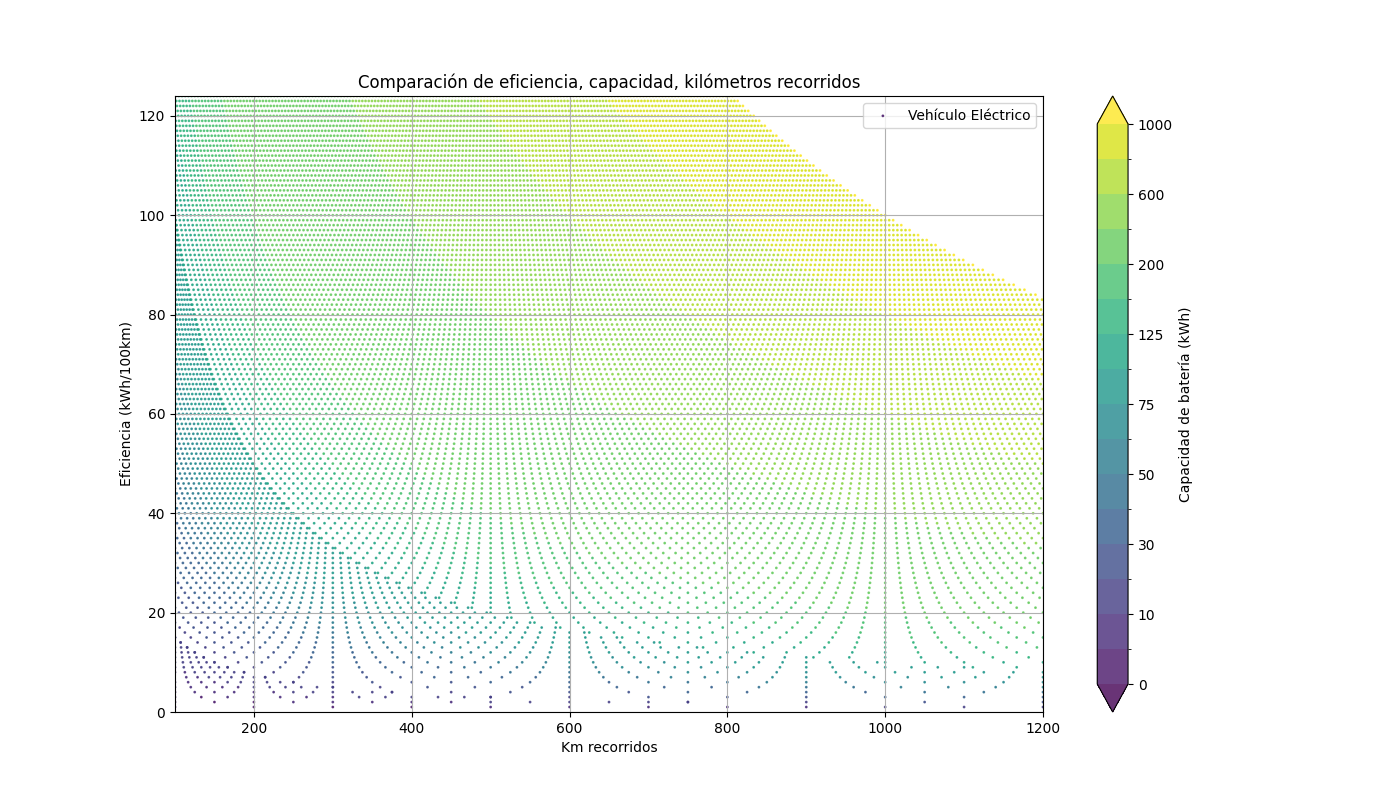

In [93]:
# @title Grafica eficiencia, capacidad, km recorridos

# Configuración de los gradientes de capacidad
bounds = [0, 5, 10, 20, 30, 40, 50, 60, 75, 100, 125, 150, 200, 400, 600, 800, 1000]
norm_capacity = mcolors.BoundaryNorm(bounds, ncolors=256, extend='both')

# Crear el DataFrame df33
# df33 contiene la información de precios
# Supongamos que ya está cargado

# Crear el DataFrame df100
# df100 contiene la información de eficiencia y capacidad
# Supongamos que ya está cargado

# Crear un diccionario para mapear los precios de df33
df33_dict = df33.set_index('Clave')['Precio'].to_dict()

# Generar la gráfica
plt.figure(figsize=(14, 8))

# Scatter plot con todos los puntos de df100
scatter = plt.scatter(
    df100['Km recorridos'],
    df100['Eficiencia (kWh/100km)'],
    c=df100['Capacidad (kWh)'],
    cmap='viridis',
    norm=norm_capacity,
    alpha=0.8,
    s=1,
    label='Vehículo Eléctrico'
)

# Configurar la gráfica
plt.colorbar(scatter, label='Capacidad de batería (kWh)')
plt.title('Comparación de eficiencia, capacidad, kilómetros recorridos')
plt.xlabel('Km recorridos')
plt.ylabel('Eficiencia (kWh/100km)')
plt.grid(True)
plt.legend(loc='upper right')
plt.ylim(0, df100['Eficiencia (kWh/100km)'].max())
plt.xlim(100, 1200)

# Interactividad con mplcursors para puntos de dispersión
cursor = mplcursors.cursor([scatter], hover=True)

@cursor.connect("add")
def on_add(sel):
    # Para puntos de dispersión
    x_data, y_data = sel.target
    # Encontrar el índice del punto seleccionado en df100
    idx = ((df100['Km recorridos'] == x_data) & (df100['Eficiencia (kWh/100km)'] == y_data)).idxmax()
    capacidad = df100.loc[idx, 'Capacidad (kWh)']

    # Calcular estEVur y estEhome
    estEVur = capacidad * df33_dict['estEVur (€)']
    estEhome = capacidad * df33_dict['estEhome (€)']

    # Etiqueta con km, eficiencia, capacidad y costes
    sel.annotation.set_text(
        f'Km: {x_data:.0f}\nEficiencia: {y_data:.2f} kWh/100km\n'
        f'Capacidad: {capacidad:.2f} kWh\n'
        f'estEVur: {estEVur:.2f} €\n'
        f'estEhome: {estEhome:.2f} €'
    )
    sel.annotation.get_bbox_patch().set(alpha=0.8, color='white', edgecolor='blue')

plt.show()



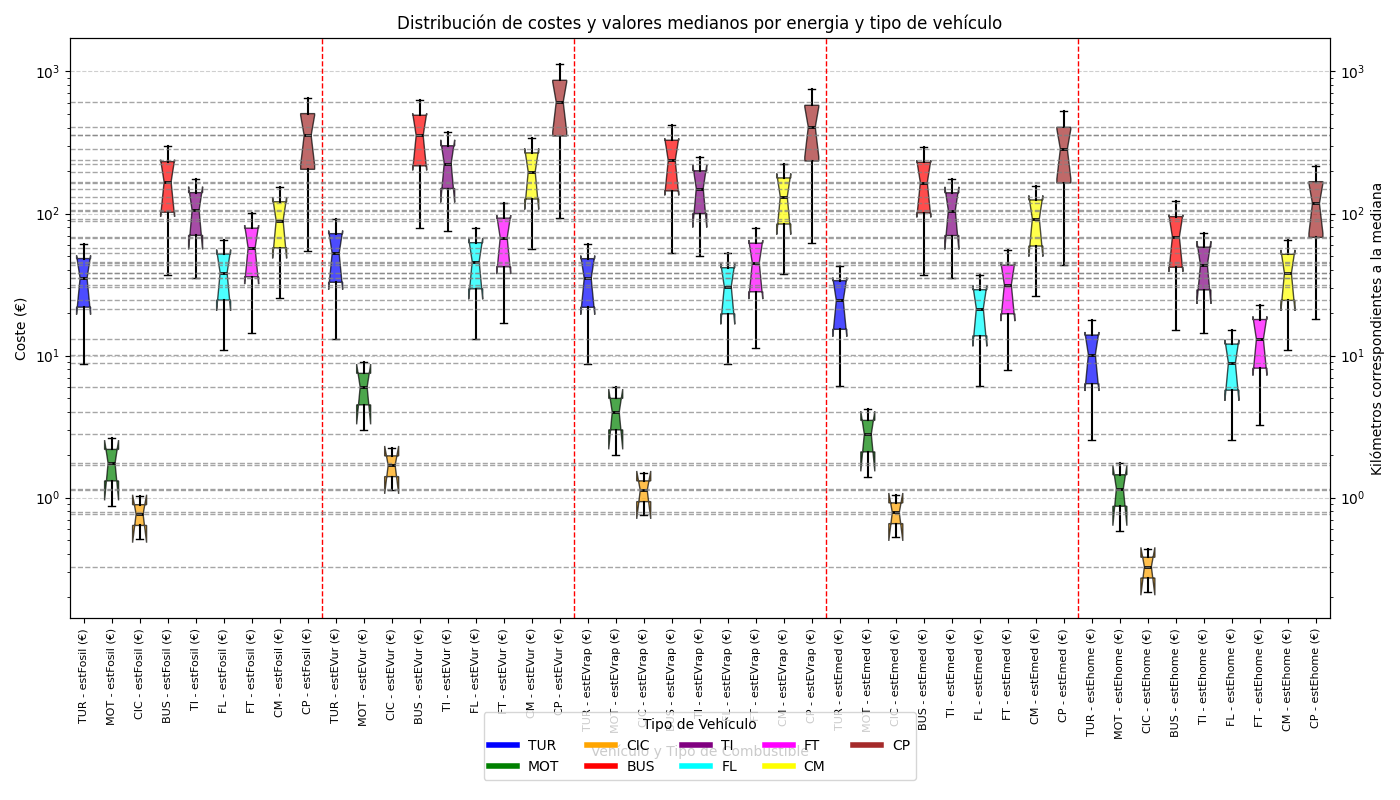

In [83]:
# @title Grafica distribucion de costes y valores medianos por energia y tipo de vehiculo


# **Preparación de datos**
# Combustibles y colores asociados
combustibles = {
    'estFosil (€)': 'blue',
    'estEVur (€)': 'green',
    'estEVrap (€)': 'orange',
    'estEmed (€)': 'purple',
    'estEhome (€)': 'red'
}

# Colores para los vehículos
colors = {
    'TUR': 'blue', 'MOT': 'green', 'CIC': 'orange', 'BUS': 'red',
    'TI': 'purple', 'FL': 'cyan', 'FT': 'magenta', 'CM': 'yellow', 'CP': 'brown'
}

# Normalización para evitar problemas de formato
df101['Veh 100Km'] = df101['Veh 100Km'].str.strip().str.upper()
df30['vehiculo'] = df30['vehiculo'].str.strip().str.upper()

# Preparar datos para el gráfico de caja
data_caja = []
labels_caja = []
box_colors = []
medias = []

# Para las líneas verticales
line_positions = []

for combustible in combustibles.keys():
    if data_caja:  # Añadir posición de la línea si ya hay datos
        line_positions.append(len(data_caja) + 0.5)
    for _, row in df30.iterrows():  # Iterar sobre las filas de df30
        vehiculo = row['vehiculo']
        # Validar que el vehículo existe en df101
        if vehiculo in df101['Veh 100Km'].values:
            km_max = df101.loc[df101['Veh 100Km'] == vehiculo, 'km_max'].values[0]
        else:
            print(f'Advertencia: {vehiculo} no encontrado en df101. Saltando este vehículo.')
            continue  # Saltar al siguiente vehículo

        # Calcular los costes en función de los kilómetros recorridos
        costes = [row[combustible] * km / 100 for km in range(100, km_max + 100, 100)]
        data_caja.append(costes)
        labels_caja.append(f'{vehiculo} - {combustible}')

        # Obtener color del vehículo normalizado
        if vehiculo in colors:
            box_colors.append(colors[vehiculo])
        else:
            print(f'Advertencia: No se encontró un color para el vehículo {vehiculo}. Usando color por defecto.')
            box_colors.append('gray')  # Color por defecto para vehículos sin color especificado

        # Calcular el valor medio para el segundo eje Y
        medias.append(np.median(costes))

# **Gráfico**
fig, ax = plt.subplots(figsize=(14, 8))

# Dibujar cajas con colores específicos
box = ax.boxplot(
    data_caja, vert=True, patch_artist=True, notch=True,
    medianprops=dict(color='black', linewidth=2),
    whiskerprops=dict(color='black', linewidth=1.5),
    flierprops=dict(marker='o', color='red', alpha=0.6)
)

# Aplicar colores a las cajas
for patch, color in zip(box['boxes'], box_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Dibujar líneas rojas discontinuas verticales
for pos in line_positions:
    ax.axvline(x=pos, color='red', linestyle='--', linewidth=1)

# Ajustar escala del eje Y para valores más claros
ax.set_yscale('log')  # Escala logarítmica para distinguir valores pequeños
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Configurar ejes y etiquetas
ax.set_xticks(range(1, len(labels_caja) + 1))
ax.set_xticklabels(labels_caja, rotation=90, fontsize=8)
ax.set_ylabel('Coste (€)')
ax.set_xlabel('Vehículo y Tipo de Combustible')
ax.set_title('Distribución de costes y valores medianos por energia y tipo de vehículo')

# Crear el segundo eje Y
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yscale('log')  # Coincidir la escala logarítmica
ax2.set_ylabel('Kilómetros correspondientes a la mediana')

# Dibujar líneas horizontales discontinuas en gris en el eje Y de medianas
for median in medias:
    ax2.axhline(y=median, color='gray', linestyle='--', alpha=0.7, linewidth=1)

# Colocar leyenda fuera de la gráfica
legend_patches = [plt.Line2D([0], [0], color=color, lw=4, label=vehiculo) for vehiculo, color in colors.items()]
ax.legend(handles=legend_patches, title='Tipo de Vehículo', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)

# Interactividad con mplcursors
cursor = mplcursors.cursor(hover=True)

@cursor.connect("add")
def on_add(sel):
    for i, patch in enumerate(box['boxes']):
        if sel.artist == patch:
            sel.annotation.set_text(f'{labels_caja[i]}\nMediana: {medias[i]:.2f}€')
            sel.annotation.get_bbox_patch().set(alpha=0.8, color='white', edgecolor=box_colors[i])

plt.tight_layout()
plt.show()


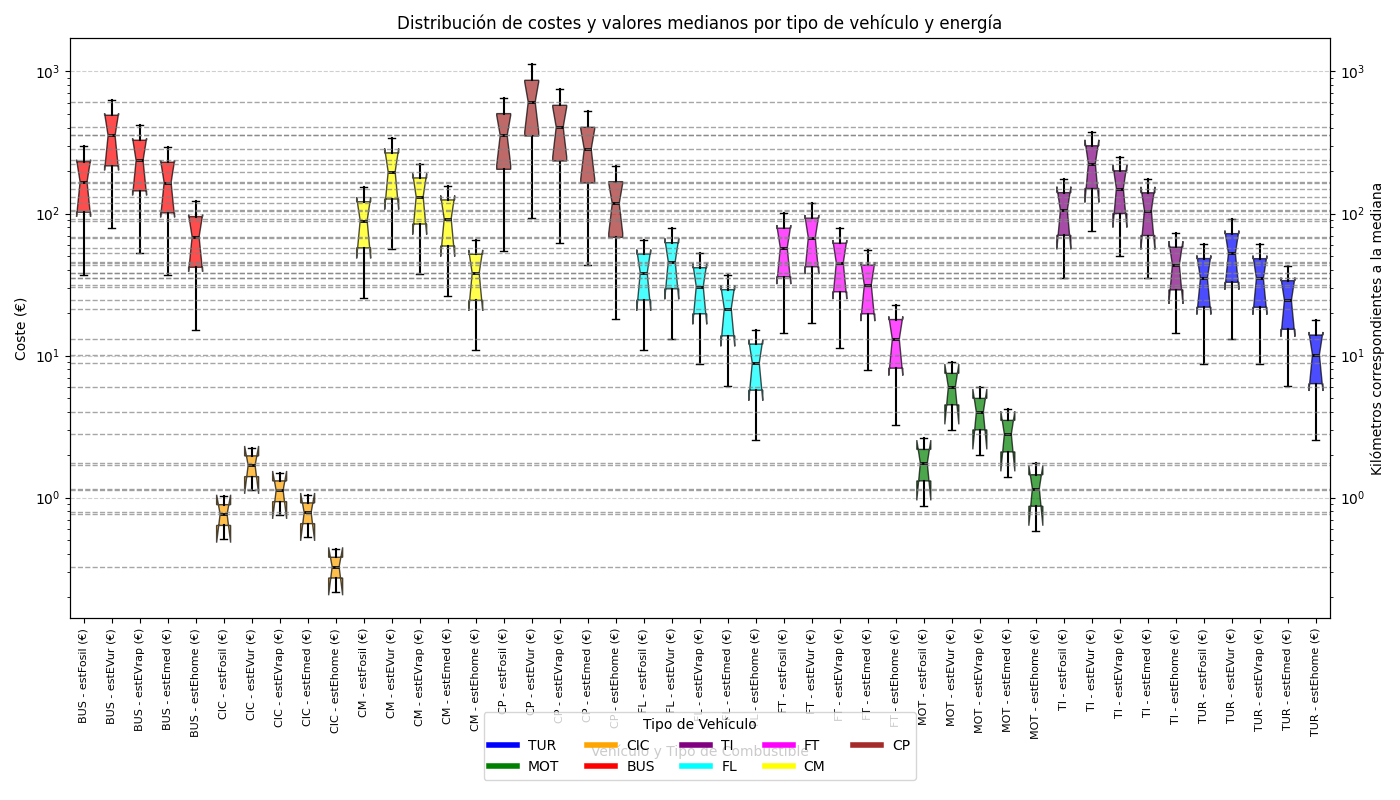

In [84]:
# @title Grafica distribucion de costes y valores medianos por tipo de vehiculo y energia

# **Preparación de datos**
# Combustibles y colores asociados
combustibles = {
    'estFosil (€)': 'blue',
    'estEVur (€)': 'green',
    'estEVrap (€)': 'orange',
    'estEmed (€)': 'purple',
    'estEhome (€)': 'red'
}

# Colores para los vehículos
colors = {
    'TUR': 'blue', 'MOT': 'green', 'CIC': 'orange', 'BUS': 'red',
    'TI': 'purple', 'FL': 'cyan', 'FT': 'magenta', 'CM': 'yellow', 'CP': 'brown'
}

# Normalización para evitar problemas de formato
df101['Veh 100Km'] = df101['Veh 100Km'].str.strip().str.upper()
df30['vehiculo'] = df30['vehiculo'].str.strip().str.upper()

# Preparar datos para el gráfico de caja
data_caja = []
labels_caja = []
box_colors = []
medias = []

for vehiculo, vehiculo_row in df30.groupby('vehiculo'):  # Agrupar por 'vehiculo'
    if vehiculo in df101['Veh 100Km'].values:
        km_max = df101.loc[df101['Veh 100Km'] == vehiculo, 'km_max'].values[0]
    else:
        print(f'Advertencia: {vehiculo} no encontrado en df101. Saltando este vehículo.')
        continue  # Saltar al siguiente vehículo

    for combustible in combustibles.keys():  # Iterar sobre los combustibles
        # Calcular los costes en función de los kilómetros recorridos
        costes = [vehiculo_row[combustible].values[0] * km / 100 for km in range(100, km_max + 100, 100)]
        data_caja.append(costes)
        labels_caja.append(f'{vehiculo} - {combustible}')

        # Obtener color del vehículo normalizado
        if vehiculo in colors:
            box_colors.append(colors[vehiculo])
        else:
            print(f'Advertencia: No se encontró un color para el vehículo {vehiculo}. Usando color por defecto.')
            box_colors.append('gray')  # Color por defecto para vehículos sin color especificado

        # Calcular el valor medio para el segundo eje Y
        medias.append(np.median(costes))

import mplcursors

# **Gráfico**
fig, ax = plt.subplots(figsize=(14, 8))

# Dibujar cajas con colores específicos
box = ax.boxplot(
    data_caja, vert=True, patch_artist=True, notch=True,
    medianprops=dict(color='black', linewidth=2),
    whiskerprops=dict(color='black', linewidth=1.5),
    flierprops=dict(marker='o', color='red', alpha=0.6)
)

# Aplicar colores a las cajas
for patch, color in zip(box['boxes'], box_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Ajustar escala del eje Y para valores más claros
ax.set_yscale('log')  # Escala logarítmica para distinguir valores pequeños
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Configurar ejes y etiquetas
ax.set_xticks(range(1, len(labels_caja) + 1))
ax.set_xticklabels(labels_caja, rotation=90, fontsize=8)
ax.set_ylabel('Coste (€)')
ax.set_xlabel('Vehículo y Tipo de Combustible')
ax.set_title('Distribución de costes y valores medianos por tipo de vehículo y energía')

# Crear el segundo eje Y
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yscale('log')  # Coincidir la escala logarítmica
ax2.set_ylabel('Kilómetros correspondientes a la mediana')

# Dibujar líneas horizontales discontinuas en gris en el eje Y de medianas
for median in medias:
    ax2.axhline(y=median, color='gray', linestyle='--', alpha=0.7, linewidth=1)

# Colocar leyenda fuera de la gráfica
legend_patches = [plt.Line2D([0], [0], color=color, lw=4, label=vehiculo) for vehiculo, color in colors.items()]
ax.legend(handles=legend_patches, title='Tipo de Vehículo', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)

# Interactividad con mplcursors
cursor = mplcursors.cursor(hover=True)

@cursor.connect("add")
def on_add(sel):
    # Identificar el índice de la caja seleccionada
    for i, patch in enumerate(box['boxes']):
        if sel.artist == patch:
            sel.annotation.set_text(
                f'Vehículo: {labels_caja[i].split(" - ")[0]}\n'
                f'Combustible: {labels_caja[i].split(" - ")[1]}\n'
                f'Mediana: {medias[i]:.2f}€'
            )
            sel.annotation.get_bbox_patch().set(alpha=0.8, color='white', edgecolor=box_colors[i])

plt.tight_layout()
plt.show()


#### **Observaciones de las graficas**

- La primera nos da los requisitos de eficiencia y capacidad de bateria para conseguir un vehiculo de prestaciones similares al que tenemos de combustion

- la segunda son dos formas de ver la mediana y los percentiles de los costes y kilometros que podemos conseguir en funcion de tipo de vehiculo y el tipo de recarga o combustible que usemos en dos maneras diferentes de enfocarlo, agrupandolo por combustible o tipo de recarga la primera y agrupandolo por tipo de vehiculo la segunda

# **TRANSICION COMPLETA DEL PARQUE DE VeH A EV**

#### **Consideraciones para la proyeccion de la reforma del parque de Veh convencionales en EV (vehiculos totalmente electricos) en los plazos marcados por la CEE**

Segun proyeccion del PMIEC para el 2030 es que haya 5.5 mill. de vehiculos electricos en circulacion, de los cuales su inmensa mayoria seran turismos y furgonetas ligeras, y podemos considerar el resto autobuses, ya que el porcentaje de otros tipos de trasporte sera despreciable a su lenta incorporacion. Viendo la proyeccion del parque de vehiculos esto parece bastante dificil con nuestra curva proyectada donde significaria que el 100% del incremento del parque movil seria EV y dependiendo de las matriculaciones nuevas vs bajas.Tengamos en cuenta que para finales del 2024 solo se prevee que un maximo de las matriculaciones EV sean del 10% por los pocos incentivos que hay, frente al 20% que se estima a nivel mundial. Debido a un aumento de los incentivos, mejoras en la eficiencia, y campañas que incentiven este modelo por una necesidad de cambio se prevee un aumento progresivo para el 2030:

- 15% al 35% de matr. en turismos, furg. lig. y autobuses seran EV100% en 2034

Las previsiones actuales mas realistas situan para 2035 entre un 28% y un 34% el porcentaje de vehiculos totalmente electricos, (lejos de las previsiones del gobierno). Aqui aunque no hay cifras exactas, lo que si se presupone una mayor incorporacion de otros tipos de transporte. Se tendrian que preveer unos crecimientos medios que tambien podrian ser progresivos:

- 45% al 80% de matr. turismos, furg. lig. y autobuses seran EV100% en 2034
- 10% a 55 % de matr. de resto de vehiculos seran seran EV100% en 2034

Apartir del 1 de enero de 2035 cualquier vehiculo de nueva matriculacion debe de ser de cero emisiones. Esto supone para este estudio:

- 100% de matriculaciones nuevas seran EV100% del 2035 en adelante

#### **Un punto de partida para el estudio**

Salvo el 100% los porcentajes son un intento un punto de partida para trabajar sobre minimos necesarios para cumplir con los requisitos de la normativa europea en 2050. La duda esta en:

- Aplicar este criterio con una tasa relativa constante de incremento anual en las matriculaciones en funcion de la evolucion historica que disponemos que nos genera una proyeccion adaptada a la evolucion que hemos previsto de nuestro parque de vehiculos.
- O si hacemos una proyeccion pensada en lo que he llamado 'mi consejo' de retrasar al maximo la compra.

Como esto ultimo no parece a dia de hoy posible debido a la desinformacion interesada de los consumidores y campañas agresivas a favor del electrico optaremos por la primera opcion. ME EXTRAÑA, que las companias europeas con los medios que disponen para analizar todo este fenomeno, no hayan apostado mas por los hibridos no enchufables, mientras desarrollan la tecnologia y la infraestructura necesaria para hacer unos electricos que puedan competir realmente con el mercado chino y americano.

#### **El Estudio**

- Para nuestro estudio al final tendremos que hacer una retroalimentacion para que se cumplan las espectativas citadas, lo que supone en 2050 ningun vehiculo en circulacion y ninguna matriculacion de vehiculos que no sean de emision cero. La retroalimentacion se hara variando progresivamente la tasa relativa de matriculaciones. En nuestro caso esta variacion de tasa la haremos manualmente al no disponer de conocimientos de 'machine learning' y regresiones suficientes.

- **ES IMPORTANTE RECORDAR, que esta no sera la realidad ya que no todos los vehiculos de emision cero tienen porque ser 100% electricos, estan las realidades del hidrogeno y del e-Fuel, especialmente este ultimo que incluye la trampa de que se puede usar en los vehiculos de combustion actual, en especial si consiguen mejorar la eficiencia de los mismos. No obstante el estudio nos permitira un analisis de la transformacion energetica en el sector del transporte terrestre y posibles repercusiones economicas.**



# **Dataframes y graficas**

In [85]:
# @title Transición Veh-EV (Ud. = MILL. UD.)

'''Montaje de tabla y ordenación de columnas a partir de df40'''

# Crear df40
df40 = df.copy()

# Las furgonetas de transporte engloban camiones ligeros
# Diccionario con los nuevos nombres de las columnas
nuevos_nombres = {
    'Año': 'Año',
    'Mill. Pers.': 'Pbl',
    'Mill. vehiculos': 'Veh',
    'Turismos': 'Tur',
    'Motocicletas': 'Mot',
    'Ciclomotores': 'Cic',
    'Autobuses': 'Bus',
    'Tractores Indust.': 'TI',
    'Furg. Ligera': 'FL',
    'Furg. Transporte': 'FT',
    'Camion medio': 'CM',
    'Camion pesado': 'CP',
    'Mill. EV': 'EV'
}

# Renombrar las columnas con base en el diccionario 'nuevos_nombres'
df40.rename(columns=nuevos_nombres, inplace=True)

# Dividir el valor de la fila 18 en la columna 'EV' por 1,000,000 y redondear a 8 decimales
df40.loc[18, 'EV'] = round(df40.loc[18, 'EV'] / 1_000_000, 8)

# Considerar por simplificación, al no disponer de datos, que no hay EVs antes de 2023
# Asignamos el valor 0.00000000 en las filas correspondientes
df40.loc[:17, 'EV'] = 0.00000000

# Mover la última columna 'EV' al índice de posición 3
df40.insert(3, df40.columns[-1], df40.pop(df40.columns[-1]))

# Renombrar las columnas originales con el sufijo 'Veh' y guardar los nombres originales
nombres_originales = {col: col for col in df40.columns[4:]}  # Excluimos las primeras columnas fijas
df40.rename(columns={col: f"{col}Veh" for col in nombres_originales}, inplace=True)

# Crear las columnas gemelas con los nombres originales + '-EV' y asignar valores NaN iniciales
for col in nombres_originales:
    df40.insert(df40.columns.get_loc(f"{col}Veh") + 1, f"{col}-EV", float('nan'))

# Seleccionar las columnas que terminan en '-EV', excluyendo la columna principal 'EV'
columnas_ev = [col for col in df40.columns if col.endswith('-EV')]

# Asignar el valor 0.00000000 desde la fila 18 hacia arriba para las columnas '-EV'
df40.loc[:17, columnas_ev] = 0.00000000

# Reemplazar la terminación '-EV' por 'EV' en los nombres de las columnas
df40.rename(columns=lambda col: col.replace('-EV', 'EV') if col.endswith('-EV') else col, inplace=True)

# Actualizar valores específicos en la fila 18
df40.at[18, 'TurEV'] = df40.at[18, 'EV']  # Asignar el valor de 'EV' a 'TurEV'
df40.at[18, 'TurVeh'] = round(df40.at[18, 'TurVeh'] - df40.at[18, 'EV'], 8)  # Ajustar 'TurVeh'

# Nos quedamos con valores de 2014 en adelante para equiparar con matriculaciones y bajas
# Eliminamos las filas de la 0 a la 8 y reindexamos el DataFrame
df40.drop(index=range(0, 9), inplace=True)
df40.reset_index(drop=True, inplace=True)

# Eliminar la columna de población ('Pbl'), ya que no es necesaria para este análisis
df40.drop('Pbl', axis=1, inplace=True)

'''Agregamos a la tabla matriculaciones y bajas desde df21 y quitamos NaN'''

# Agregar las columnas correspondientes de matriculaciones y bajas desde el DataFrame df21
df40 = pd.concat([df40, df21.iloc[:, 4:]], axis=1)

# Identificar las columnas que contienen valores NaN
columnas_con_nan = df40.columns[df40.isna().any()]

# Rellenar NaN solo en esas columnas y redondear a 8 decimales
df40[columnas_con_nan] = df40[columnas_con_nan].fillna(0.00000000).round(8)

# Crear la columna 'VT' como la suma de las columnas 'Veh' y 'EV'
# Insertamos 'VT' en el índice 1
df40.insert(1, 'VT', round(df40['Veh'] + df40['EV'], 8))

'''
Tenemos que hacer una proyección de las matriculaciones totales (MtMMt)
El número de matriculaciones anual es muy volátil y depende de muchas situaciones.
Solo hace falta ver en las tablas la variabilidad entre los años 2014 y 2023 de
los que disponemos datos.
No sabemos lo que va a pasar realmente porque depende de la situación de cada año
y suele distar mucho de las previsiones iniciales del año por los vendedores.
Para hacer una proyección estable, vamos a sacar la media de MtMMt entre los años
2014 y 2023. Sacaremos la tasa relativa de crecimiento entre el 2014 y la media
de los 10 años tenidos en cuenta, y la aplicaremos sucesivamente a años proyectados.
'''

# Proyección específica para la columna 'MtMMt' según criterio indicado
# Filtrar los datos entre 2014 y 2023
df_filtered = df40[(df40['Año'] >= 2014) & (df40['Año'] <= 2023)]

# Calcular la media de 'MtMMt' entre 2014 y 2023
media_mtmm = round(df_filtered['MtMMt'].mean(), 8)

# Calcular la tasa relativa
año_inicial = 2014
mtmm_2014 = round(df40.loc[df40['Año'] == año_inicial, 'MtMMt'].iloc[0], 8)
num_filas = len(df_filtered)

tasa_relativa = round(((1 - (mtmm_2014 / media_mtmm)) / num_filas) + 1, 8)

'''
MODIFICACIÓN MANUAL DE LA TASA PARA ADAPTAR EL OBJETIVO DEL 2050
TODO EL PARQUE DE VEHÍCULOS SERÁ DE CERO EMISIONES
'''

tasa_relativa = round(tasa_relativa + 0.02, 8)

# Calcular los valores para los años futuros (2024-2060)
for año in range(2024, 2061):
    valor_anterior = round(df40.loc[df40['Año'] == (año - 1), 'MtMMt'].iloc[0], 8)
    nuevo_valor = round(valor_anterior * tasa_relativa, 8)
    df40.loc[df40['Año'] == año, 'MtMMt'] = nuevo_valor

# Si hay años faltantes, agregar los datos calculados
años_faltantes = [año for año in range(2024, 2061) if año not in df40['Año'].values]
if años_faltantes:
    valores_faltantes = []
    valor_anterior = round(df40.loc[df40['Año'] == 2023, 'MtMMt'].iloc[0], 8)
    for año in años_faltantes:
        nuevo_valor = round(valor_anterior * tasa_relativa, 8)
        valores_faltantes.append({'Año': año, 'MtMMt': nuevo_valor})
        valor_anterior = nuevo_valor
    df40 = pd.concat([df40, pd.DataFrame(valores_faltantes)], ignore_index=True)

'''
Calculamos las bajas como la diferencia entre el crecimiento del parque total interanual
y las matriculaciones del año correspondiente
'''

# Rellenar la columna 'BjMBj' en df40 para los años 2024-2060
def rellenar_bjmbj_df40(df, col_base, col_target, col_bjmbj, year_start, year_end):
    """
    Rellena la columna 'BjMBj' para un rango de años, calculando su valor como:
    'MtMMt' del año - ('Veh' del año - 'Veh' del año anterior).

    Args:
        df (pd.DataFrame): DataFrame que contiene los datos.
        col_base (str): Nombre de la columna base (e.g., 'Veh').
        col_target (str): Nombre de la columna objetivo (e.g., 'MtMMt').
        col_bjmbj (str): Nombre de la columna a rellenar (e.g., 'BjMBj').
        year_start (int): Año a partir del cual se calculan los valores.
        year_end (int): Año hasta el cual se calculan los valores.

    Returns:
        None: Modifica el DataFrame original directamente.
    """
    for year in range(year_start, year_end + 1):
        prev_year = year - 1

        # Obtener valores necesarios para el cálculo
        mtmmt_current = round(df.loc[df['Año'] == year, col_target].values[0], 8)
        veh_current = round(df.loc[df['Año'] == year, col_base].values[0], 8)
        veh_prev = round(df.loc[df['Año'] == prev_year, col_base].values[0], 8)

        # Calcular el valor de 'BjMBj'
        bjmbj_value = round(mtmmt_current - (veh_current - veh_prev), 8)

        # Actualizar el valor en la columna 'BjMBj', redondeando a 8 decimales
        df.loc[df['Año'] == year, col_bjmbj] = bjmbj_value

# Llamar a la función directamente sobre el DataFrame df40
rellenar_bjmbj_df40(
    df=df40,
    col_base='Veh',          # Columna base
    col_target='MtMMt',      # Columna de referencia para el cálculo
    col_bjmbj='BjMBj',       # Columna a rellenar
    year_start=2024,         # Año inicial
    year_end=2060            # Año final
)

'''
Vamos a rellenar las matriculaciones de cada tipo de vehículo convencional
aplicando la media proporcional de los años anteriores sobre el valor de las
matriculaciones totales de cada año.
'''

# Calcular medias y porcentajes, y asignar valores a las columnas desde 2024 hasta 2060
def calcular_y_asignar_valores(df, col_base, columnas_objetivo, year_start, year_end, range_media_start, range_media_end):
    """
    Calcula la media de los valores para cada columna en un rango de años, obtiene su porcentaje respecto a la suma
    total de las medias, y asigna valores desde el año inicial al final multiplicando ese porcentaje por el valor
    correspondiente de la columna base.

    Args:
        df (pd.DataFrame): DataFrame que contiene los datos.
        col_base (str): Columna base para los cálculos (e.g., 'MtMMt').
        columnas_objetivo (list): Lista de columnas a procesar (e.g., ['MtTur', 'MtMot', ...]).
        year_start (int): Año inicial para asignar valores.
        year_end (int): Año final para asignar valores.
        range_media_start (int): Año inicial del rango para calcular la media.
        range_media_end (int): Año final del rango para calcular la media.

    Returns:
        None: Modifica el DataFrame original directamente.
    """
    # Filtrar filas dentro del rango de años para calcular las medias
    df_medias = df[(df['Año'] >= range_media_start) & (df['Año'] <= range_media_end)]

    # Calcular la media para cada columna en el rango, redondeando a 8 decimales
    medias = {col: round(df_medias[col].mean(), 8) for col in columnas_objetivo}

    # Calcular el porcentaje que representa cada media respecto al total, redondeando a 8 decimales
    suma_total_medias = round(sum(medias.values()), 8)
    porcentajes = {col: round(medias[col] / suma_total_medias, 8) for col in columnas_objetivo}

    # Asignar valores a cada columna desde year_start hasta year_end
    for year in range(year_start, year_end + 1):
        valor_base = round(df.loc[df['Año'] == year, col_base].values[0], 8)

        for col in columnas_objetivo:
            valor_calculado = round(valor_base * porcentajes[col], 8)
            df.loc[df['Año'] == year, col] = valor_calculado

# Definir las columnas objetivo
columnas_objetivo = ['MtTur', 'MtMot', 'MtCic', 'MtAut', 'MtTI', 'MtFL', 'MtFT', 'MtCM', 'MtCP']

# Llamar a la función directamente sobre el DataFrame df40
calcular_y_asignar_valores(
    df=df40,
    col_base='MtMMt',               # Columna base
    columnas_objetivo=columnas_objetivo,
    year_start=2024,                # Año inicial
    year_end=2060,                  # Año final
    range_media_start=2014,         # Año inicial para calcular la media
    range_media_end=2023            # Año final para calcular la media
)

'''
Vamos a rellenar las bajas de cada tipo de vehículo aplicando la media proporcional
de los años anteriores sobre el valor de las bajas totales de cada año.
Esta es general y única y no distinguimos entre convencionales y EV.
'''

# Rellenamos las matriculaciones y bajas por tipo de vehículo como un promedio de los totales
# Calcular medias y porcentajes, y asignar valores a las columnas desde 2024 hasta 2060
def calcular_y_asignar_valores_bjmbj(df, col_base, columnas_objetivo, year_start, year_end, range_media_start, range_media_end):
    """
    Calcula la media de los valores para cada columna en un rango de años, obtiene su porcentaje respecto a la suma
    total de las medias, y asigna valores desde el año inicial al final multiplicando ese porcentaje por el valor
    correspondiente de la columna base.

    Args:
        df (pd.DataFrame): DataFrame que contiene los datos.
        col_base (str): Columna base para los cálculos (e.g., 'BjMBj').
        columnas_objetivo (list): Lista de columnas a procesar (e.g., ['BjTur', 'BjMot', ...]).
        year_start (int): Año inicial para asignar valores.
        year_end (int): Año final para asignar valores.
        range_media_start (int): Año inicial del rango para calcular la media.
        range_media_end (int): Año final del rango para calcular la media.

    Returns:
        None: Modifica el DataFrame original directamente.
    """
    # Filtrar filas dentro del rango de años para calcular las medias
    df_medias = df[(df['Año'] >= range_media_start) & (df['Año'] <= range_media_end)]

    # Calcular la media para cada columna en el rango, redondeando a 8 decimales
    medias = {col: round(df_medias[col].mean(), 8) for col in columnas_objetivo}

    # Calcular el porcentaje que representa cada media respecto al total, redondeando a 8 decimales
    suma_total_medias = round(sum(medias.values()), 8)
    porcentajes = {col: round(medias[col] / suma_total_medias, 8) for col in columnas_objetivo}

    # Asignar valores a cada columna desde year_start hasta year_end
    for year in range(year_start, year_end + 1):
        valor_base = round(df.loc[df['Año'] == year, col_base].values[0], 8)

        for col in columnas_objetivo:
            valor_calculado = round(valor_base * porcentajes[col], 8)
            df.loc[df['Año'] == year, col] = valor_calculado

# Definir las columnas objetivo
columnas_objetivo_bj = ['BjTur', 'BjMot', 'BjCic', 'BjAut', 'BjTI', 'BjFL', 'BjFT', 'BjCM', 'BjCP']

# Llamar a la función directamente sobre el DataFrame df40
calcular_y_asignar_valores_bjmbj(
    df=df40,
    col_base='BjMBj',              # Columna base
    columnas_objetivo=columnas_objetivo_bj,
    year_start=2024,               # Año inicial
    year_end=2060,                 # Año final
    range_media_start=2014,        # Año inicial para calcular la media
    range_media_end=2023           # Año final para calcular la media
)

'''
Para la transición desde el 2024 hasta el año 2030 el modelo es:
15% al 35% de matr. progresiva en turismos, furg. ligeras y autobuses
'''

# Variables para los porcentajes de EV
porcentaje_ev_inicio = 0.15  # 15% en 2024
porcentaje_ev_final = 0.35  # 35% en 2030

# Filtrar las filas que están en el rango de años 2024 a 2030
df40_in_range = df40[(df40['Año'] >= 2024) & (df40['Año'] <= 2030)].copy()

# Lista de columnas específicas a modificar
columns_to_update = ['MtMMtEV', 'MtTurEV', 'MtAutEV', 'MtFLEV']

# Calcular la progresión lineal y actualizar solo las columnas relevantes
for column in columns_to_update:  # Iterar solo sobre las columnas de interés
    base_column = column[:-2]  # Obtener el nombre de la columna base
    if base_column in df40.columns:  # Verificar que la columna base exista en df40
        # Calcular la columna 'EV' dentro del rango de años con progresión lineal
        df40_in_range[column] = df40_in_range.apply(
            lambda row: round(
                row[base_column] * (
                    porcentaje_ev_inicio +
                    (row['Año'] - 2024) / (2030 - 2024) * (porcentaje_ev_final - porcentaje_ev_inicio)
                ), 8
            ),
            axis=1
        )

        # Ajustar la columna base restando los valores calculados en la columna 'EV'
        df40_in_range[base_column] = df40_in_range.apply(
            lambda row: round(row[base_column] - row[column], 8), axis=1
        )

# Actualizar el DataFrame original solo para las filas y columnas modificadas
for column in columns_to_update:
    base_column = column[:-2]
    if base_column in df40.columns:  # Actualizar también las columnas base asociadas
        df40.loc[df40_in_range.index, [column, base_column]] = df40_in_range[[column, base_column]]

'''
Para la transición desde el 2031 hasta el año 2034 el modelo es:
- 45% al 80% de matr. progresiva en turismos, furg. ligeras y autobuses
- 10% a 55 % de matr. progresiva en resto de tipo de vehículos
'''

# Variables para los porcentajes de EV
porcentaje_ev_inicio_1 = 0.55  # 55% en 2031
porcentaje_ev_final_1 = 0.80  # 80% en 2034

porcentaje_ev_inicio_2 = 0.10  # 10% en 2031
porcentaje_ev_final_2 = 0.55  # 55% en 2034

# Filtrar las filas que están en el rango de años 2031 a 2034
df40_in_range = df40[(df40['Año'] >= 2031) & (df40['Año'] <= 2034)].copy()

# Listas de columnas específicas para cada grupo
columns_to_update_1 = ['MtTurEV', 'MtAutEV', 'MtFLEV']
columns_to_update_2 = ['MtMotEV', 'MtCicEV', 'MtTIEV', 'MtFTEV', 'MtCMEV', 'MtCPEV']

# Cálculo para las columnas del primer grupo
for column in columns_to_update_1:
    base_column = column[:-2]
    if base_column in df40.columns:
        # Calcular la columna 'EV' con los porcentajes del primer grupo
        df40_in_range[column] = df40_in_range.apply(
            lambda row: round(
                row[base_column] * (
                    porcentaje_ev_inicio_1 +
                    (row['Año'] - 2031) / (2034 - 2031) * (porcentaje_ev_final_1 - porcentaje_ev_inicio_1)
                ), 8
            ),
            axis=1
        )

# Cálculo para las columnas del segundo grupo
for column in columns_to_update_2:
    base_column = column[:-2]
    if base_column in df40.columns:
        # Calcular la columna 'EV' con los porcentajes del segundo grupo
        df40_in_range[column] = df40_in_range.apply(
            lambda row: round(
                row[base_column] * (
                    porcentaje_ev_inicio_2 +
                    (row['Año'] - 2031) / (2034 - 2031) * (porcentaje_ev_final_2 - porcentaje_ev_inicio_2)
                ), 8
            ),
            axis=1
        )

# Cálculo separado para 'MtMMtEV'
df40_in_range['MtMMtEV'] = df40_in_range.apply(
    lambda row: round(
        row['MtTurEV'] + row['MtAutEV'] + row['MtFLEV'] +
        row['MtMotEV'] + row['MtCicEV'] + row['MtTIEV'] +
        row['MtFTEV'] + row['MtCMEV'] + row['MtCPEV'], 8
    ),
    axis=1
)

# Ajustar la columna base 'MtMMt' separadamente
df40_in_range['MtMMt'] = df40_in_range.apply(
    lambda row: round(row['MtMMt'] - row['MtMMtEV'], 8),
    axis=1
)

# Actualizar el DataFrame original solo para las filas y columnas modificadas
all_columns_to_update = columns_to_update_1 + columns_to_update_2 + ['MtMMtEV']
for column in all_columns_to_update:
    base_column = column[:-2] if column != 'MtMMtEV' else 'MtMMt'
    if base_column in df40.columns:
        df40.loc[df40_in_range.index, [column, base_column]] = df40_in_range[[column, base_column]]

'''
Del 2035 en adelante el 100% de las matriculaciones son EV
'''

# Asignar el 100% de matriculaciones nuevas a matriculaciones EV
# Filtrar las filas que están en el rango de años 2035 a 2060
df40_in_range = df40[(df40['Año'] >= 2035) & (df40['Año'] <= 2060)].copy()

# Lista de columnas objetivo (pares)
columns_pairs = [
    ('MtTur', 'MtTurEV'), ('MtMot', 'MtMotEV'), ('MtCic', 'MtCicEV'),
    ('MtAut', 'MtAutEV'), ('MtTI', 'MtTIEV'), ('MtFL', 'MtFLEV'),
    ('MtFT', 'MtFTEV'), ('MtCM', 'MtCMEV'), ('MtCP', 'MtCPEV'),
    ('MtMMt', 'MtMMtEV')
]

# Intercambiar los valores entre columnas pareadas
for col_base, col_ev in columns_pairs:
    # Asegurarse de que ambas columnas están en el DataFrame
    if col_base in df40.columns and col_ev in df40.columns:
        # Realizar el intercambio manualmente
        df40_in_range[col_ev] = df40_in_range[col_base].round(8)
        df40_in_range[col_base] = 0.000

# Actualizar el DataFrame original con los valores modificados
for col_base, col_ev in columns_pairs:
    if col_base in df40.columns and col_ev in df40.columns:
        df40.loc[df40_in_range.index, [col_base, col_ev]] = df40_in_range[[col_base, col_ev]]

'''
No hay estudios completos sobre la durabilidad de los vehículos eléctricos por lo
reciente de la tecnología. Los seguimientos más actuales realizados por Tesla y
Nissan a fechas del estudio (2023) van por 13 años de duración y siguen lo que
en principio todo apunta por el camino que va a una durabilidad media, con un
mantenimiento y cuidado adecuados, similar a la de los vehículos de combustión,
que se sitúa en 18 y 20 años pudiendo llegar a más.

Vamos a considerar, por tanto, y siendo prudentes, una durabilidad de 15 años. Esto
es como una media ya que la realidad futura es imprecisa, habrá quien si puede
aguantará con el vehículo 20 o 25 años y quien lo cambie a los 4 años en una
operación renove.

Añadiremos columnas de bajas de EV con valores 0.00000000 inicialmente y que empezará
a contar a partir de los 15 años del año donde empiezan las matr. de vehículos EV.
y las bajas EV serán igual a las matriculaciones EV de hace 15 años.
'''

# Creación de columnas con valores cero para las bajas de vehículos eléctricos
columnas_originales = ['BjMBj', 'BjTur', 'BjMot', 'BjCic', 'BjAut', 'BjTI', 'BjFL', 'BjFT', 'BjCM', 'BjCP']
for col in columnas_originales:
    indice = df40.columns.get_loc(col)  # Obtiene el índice de la columna base
    df40.insert(indice + 1, col + 'EV', 0.00000000)  # Inserta la columna gemela a la derecha con valores iniciales 0.00000000

# Lista de columnas a procesar para asignar valores de bajas de EV
columnas = ['BjMBj', 'BjTur', 'BjMot', 'BjCic', 'BjAut', 'BjTI', 'BjFL', 'BjFT', 'BjCM', 'BjCP']

# Iterar sobre cada columna en la lista
for col in columnas:
    # Determinar la columna de referencia con una excepción para 'BjMBj'
    if col == 'BjMBj':
        col_referencia = 'MtMMtEV'  # Caso especial para la columna total
    else:
        col_referencia = f'Mt{col[2:]}EV'  # Sustituir 'Bj' por 'Mt' y añadir el sufijo 'EV'

    col_gemela = f'{col}EV'  # La columna gemela con el sufijo 'EV'

    # Verificar si la columna de referencia existe
    if col_referencia not in df40.columns:
        print(f"Columna de referencia '{col_referencia}' no encontrada. Saltando...")
        continue

    # Buscar el primer año donde la columna de referencia tiene un valor distinto de cero
    fila_no_cero = df40[df40[col_referencia] != 0].iloc[0]

    # Obtener el año inicial detectado
    año_no_cero = fila_no_cero['Año']

    # Calcular el primer año objetivo
    año_objetivo = año_no_cero + 15

    # Rellenar la columna gemela desde el año objetivo hasta 2060
    while año_objetivo <= 2060:
        # Calcular el año correspondiente en la columna de referencia
        año_fuente = año_objetivo - 15

        # Obtener el valor correspondiente de la columna de referencia para el año fuente
        if not df40[df40['Año'] == año_fuente][col_referencia].empty:
            valor_a_rellenar = df40.loc[df40['Año'] == año_fuente, col_referencia].iloc[0]

            # Rellenar el valor en la columna gemela para el año objetivo
            df40.loc[df40['Año'] == año_objetivo, col_gemela] = round(valor_a_rellenar, 8)

        # Incrementar el año objetivo
        año_objetivo += 1

    # Recalcular los valores de la columna original restando los de su gemela
    df40[col] -= df40[col_gemela]

'''
Vamos a renombrar columnas para que se entienda que los nombres que no tienen sufijo
"Veh" son vehículos convencionales, poniéndoles el sufijo y organizarlas.
'''

# Renombrado poniendo sufijos donde faltan
df40.rename(
    columns=lambda col: (
        col + 'Veh' if col not in ['Año', 'VT', 'Veh', 'EV']
        and not (col.endswith('Veh') or col.endswith('EV')) else col
    ),
    inplace=True
)

# Renombrar columnas que contienen 'Aut' en su base por 'Bus', manteniendo prefijos y sufijos
df40.rename(
    columns={col: col.replace('Aut', 'Bus') for col in df40.columns if 'Aut' in col},
    inplace=True
)

# Mover las columnas 'MtMMtVeh' y 'MtMMtEV' a los índices 4 y 5
for col, new_index in zip(['MtMMtVeh', 'MtMMtEV'], [4, 5]):
    # Extraer la columna
    column_data = df40.pop(col)
    # Insertar la columna en la posición deseada
    df40.insert(new_index, col, column_data)

# Mover las columnas 'BjMBjVeh' y 'BjMBjEV' a los índices 6 y 7
for col, new_index in zip(['BjMBjVeh', 'BjMBjEV'], [6, 7]):
    # Extraer la columna
    column_data = df40.pop(col)
    # Insertar la columna en la posición deseada
    df40.insert(new_index, col, column_data)

'''
Actualizamos valores de las columnas Veh y EV y por tipo de vehículos
'''

# Actualizar la columna 'EV'
# Inicializar el primer valor de EV en 0.00000000
df40.loc[0, 'EV'] = 0.00000000

# Calcular EV para el resto de las filas
for i in range(1, len(df40)):
    df40.loc[i, 'EV'] = round((df40.loc[i, 'MtMMtEV'] - df40.loc[i, 'BjMBjEV']) + df40.loc[i - 1, 'EV'], 8)

# Actualizar la columna 'Veh' como la diferencia entre 'VT' y 'EV'
df40['Veh'] = round(df40['VT'] - df40['EV'], 8)

# Lista de categorías base
categorias = ['Tur', 'Mot', 'Cic', 'Bus', 'TI', 'FL', 'FT', 'CM', 'CP']

# Inicializar la columna EV de la primera fila como 0.00000000 para cada categoría
for categoria in categorias:
    col_EV = f'{categoria}EV'
    df40.loc[0, col_EV] = 0.00000000  # Primera fila: EV = 0.00000000

# Calcular EV y Veh para cada fila y categoría
for categoria in categorias:
    col_EV = f'{categoria}EV'  # Columna EV sin prefijo
    col_Veh = f'{categoria}Veh'  # Columna Veh sin prefijo
    col_MtEV = f'Mt{categoria}EV'  # Columna con prefijo Mt y sufijo EV
    col_BjEV = f'Bj{categoria}EV'  # Columna con prefijo Bj y sufijo EV

    # Rellenar las columnas fila por fila
    for i in range(1, len(df40)):
        # Calcular EV: (EV del año anterior) + (MtEV) - (BjEV)
        df40.loc[i, col_EV] = round(
            df40.loc[i - 1, col_EV] +  # EV del año anterior
            df40.loc[i, col_MtEV] -  # MtEV de la fila actual
            df40.loc[i, col_BjEV], 8  # BjEV de la fila actual
        )

    # Calcular Veh: (Veh - EV)
    df40[col_Veh] = round(df40[col_Veh] - df40[col_EV], 8)

'''
Corrección y reasignación de valores negativos en todos los años y de valores
positivos entre 2050 y 2060 en las columnas Veh.
'''

# Identificar las columnas Veh y EV
veh_columns = [col for col in df40.columns if col.endswith('Veh')]
ev_columns = [col for col in df40.columns if col.endswith('EV')]

# Asegurar que cada columna Veh tiene una columna gemela EV
gemelas = {veh: ev for veh, ev in zip(veh_columns, ev_columns)}

# Proceso 1: Valores negativos en Veh
for veh_col, ev_col in gemelas.items():
    negativos = df40[veh_col] < 0
    # Restar el valor absoluto del negativo a su columna gemela EV
    df40.loc[negativos, ev_col] -= round(df40.loc[negativos, veh_col].abs(), 8)
    # Poner los valores negativos en Veh a 0.00000000
    df40.loc[negativos, veh_col] = 0.00000000

# Proceso 2: Años de 2050 a 2060
for veh_col, ev_col in gemelas.items():
    en_rango = df40['Año'].between(2050, 2060)
    valores_originales = df40.loc[en_rango, veh_col]
    # Sumar el valor original absoluto de Veh a su columna gemela EV
    df40.loc[en_rango, ev_col] += round(valores_originales.abs(), 8)
    # Poner los valores de Veh a 0.00000000
    df40.loc[en_rango, veh_col] = 0.00000000

'''
Crear columnas totales para cada 'base' de estudio
'''

# Identificar columnas terminadas en Veh
veh_columns = [col for col in df40.columns if col.endswith('Veh') and col not in ['VT', 'Veh']]
ev_columns = [col for col in df40.columns if col.endswith('EV') and col not in ['EV']]

# Crear las columnas terminadas en VT y ubicarlas delante de las columnas Veh
for veh_col in veh_columns:
    # Determinar la base común y el nombre de la columna EV correspondiente
    base_name = veh_col[:-3]  # Quitar 'Veh' para obtener la base común
    ev_col = base_name + 'EV'  # La columna EV ya existe
    vt_col = base_name + 'VT'  # Nombre de la nueva columna VT

    # Insertar la nueva columna terminada en VT delante de la columna Veh
    veh_index = df40.columns.get_loc(veh_col)  # Índice de la columna Veh
    df40.insert(veh_index, vt_col, round(df40[veh_col] + df40[ev_col], 8))  # Suma Veh + EV con redondeo a 8 decimales

'''
Ajuste de matriculaciones
'''

# Definir los grupos de columnas correctamente
grouped_columns = [
    ('MtMMtVT', 'MtMMtVeh', 'MtMMtEV'),
    ('MtTurVT', 'MtTurVeh', 'MtTurEV'),
    ('MtMotVT', 'MtMotVeh', 'MtMotEV'),
    ('MtCicVT', 'MtCicVeh', 'MtCicEV'),
    ('MtBusVT', 'MtBusVeh', 'MtBusEV'),
    ('MtTIVT', 'MtTIVeh', 'MtTIEV'),
    ('MtFLVT', 'MtFLVeh', 'MtFLEV'),
    ('MtFTVT', 'MtFTVeh', 'MtFTEV'),
    ('MtCMVT', 'MtCMVeh', 'MtCMEV'),
    ('MtCPVT', 'MtCPVeh', 'MtCPEV'),
]

# Busca discrepancias en matr. y las reparte porporcionalmente
# Extraer la primera tupla y las demás
primary_group = grouped_columns[0]
other_groups = grouped_columns[1:]

# Iterar por cada índice en la tupla (0, 1, 2)
for idx in range(3):
    primary_column = primary_group[idx]  # Columna de referencia

    # Calcular la suma fila por fila de las columnas en los demás grupos
    other_columns = [group[idx] for group in other_groups]

    for i, row in df40.iterrows():
        # Sumar los valores de las otras columnas para esta fila
        other_values = row[other_columns]
        other_sum = other_values.sum()

        # Calcular la discrepancia
        discrepancy = row[primary_column] - other_sum

        # Ignorar discrepancias menores de 0.00000005
        if abs(discrepancy) <= 0.00000005:
            continue

        # Repartir la discrepancia proporcionalmente entre las otras columnas
        proportions = other_values / other_sum if other_sum != 0 else 0
        adjustments = discrepancy * proportions

        # Actualizar las columnas en df40
        for col, adjustment in zip(other_columns, adjustments):
            df40.at[i, col] += round(adjustment, 8)

# Iguala matr. totales con suma de Veh y EV matriculados
# Iterar por cada tupla de columnas en grouped_columns
for col1, col2, col3 in grouped_columns:
    # Iterar por cada fila del DataFrame
    for i, row in df40.iterrows():
        # Calcular la suma de los valores de col2 y col3
        sum_col2_col3 = row[col2] + row[col3]

        # Verificar si el valor de col1 es igual a la suma
        if row[col1] == sum_col2_col3:
            continue  # Si son iguales, no hacer nada

        # Si col1 es mayor, ajustar col3 restando la diferencia
        if row[col1] > sum_col2_col3:
            difference = row[col1] - sum_col2_col3
            df40.at[i, col3] += difference

        # Si col1 es menor, ajustar col3 sumando la diferencia
        elif row[col1] < sum_col2_col3:
            difference = sum_col2_col3 - row[col1]
            df40.at[i, col3] -= difference

# # Archivo Excel con el contenido actualizado de df40
# df40.to_excel(
#     os.path.join(directorio_resultados, 'Rtrn-B02-Proy-transicion-Veh-EV.xlsx'),
#     sheet_name='Proy-transicion-Veh-EV',
#     index=False
# )

'''
Presentacion de la tabla
'''

# Crear una copia de df40
df40_copy = df40.copy()

# Redondear todas las columnas numéricas a 8 decimales excepto 'Año'
for column in df40_copy.select_dtypes(include=['float64', 'int64']).columns:
    if column != 'Año':
        df40_copy[column] = df40_copy[column].round(3)
    else:
        df40_copy[column] = df40_copy[column].astype(int)

# Configurar pandas para mostrar valores de coma flotante con 3 decimales
pd.set_option('display.float_format', '{:.3f}'.format)

# Usar la función del módulo Display_df.py para presentar la copia de la tabla
df40_copy = df40_copy.set_index(df40_copy.columns[0])  # Convierte la primera columna en el índice
df40_copy.index.name = None  # Esto elimina "Año" como nombre del índice
Display_df.display_dataframe_with_scroll(
    df=df40_copy,
    title='Tabla Transición Veh-EV (UD. = MILL. UD.)',
    separator_indices=[3, 6, 9, 36, 63]
)


In [94]:
# @title Grafica de la transicion Veh-EV (Ud. = MILL. UD.) con botón de salvado

# Variables globales
current_index = 0  # Índice actual del grupo
current_hito_year = 2050  # Año inicial del hito
grouped_columns = []  # Lista de grupos
output = widgets.Output()  # Área de salida para gráficos

# Crear botones interactivos
button_prev = widgets.Button(description="Gráfica anterior")
button_next = widgets.Button(description="Siguiente gráfica")
button_exit = widgets.Button(description="Salir")
button_save = widgets.Button(description="Guardar gráfica")

# Función para graficar una serie suavizada con hitos y etiquetas personalizables
def _plot_smooth_series_with_hitos(df, y_column, series_name, color, ax, bar_column=None):
    xs = df['Año']
    ys = df[y_column]

    # Interpolación más suave utilizando splines cúbicos
    xs_new = np.linspace(xs.min(), xs.max(), 300)
    spline = make_interp_spline(xs, ys, k=3)  # k=3 para splines cúbicos
    ys_smooth = spline(xs_new)

    # Graficamos la serie suavizada
    ax.plot(xs_new, ys_smooth, label=series_name, color=color, linewidth=2)

    # Añadimos los hitos
    global current_hito_year
    for year in [2025, 2035, 2040, 2045, current_hito_year]:
        if xs.min() <= year <= xs.max():
            x_hito = year
            y_hito = spline(x_hito)

            # Línea vertical y punto
            ax.axvline(x=x_hito, color='red', linestyle='--', linewidth=0.5)
            ax.plot(x_hito, y_hito, 'o', color=color)

            # Etiqueta de porcentaje, colocada encima del punto
            x_offset = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.01
            y_offset = (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.02
            if bar_column and year in df['Año'].values:
                bar_value = df.loc[df['Año'] == year, bar_column].values[0]
                percentage = (bar_value / y_hito) * 100 if y_hito != 0 else 0
                ax.text(
                    x_hito - x_offset,
                    y_hito + y_offset,  # Colocado encima del punto
                    f'{percentage:.1f}%',
                    color='green',
                    ha='right',
                    va='bottom',
                    fontsize=8,
                    weight='bold'
                )

# Función para mostrar la gráfica actual
def mostrar_grafico(df):
    global current_index, grouped_columns, current_hito_year, output

    # Limpiar el área de salida
    with output:
        clear_output(wait=True)

        # Cerrar figuras abiertas
        plt.close('all')

        # Obtener el grupo actual
        grT, grVeh, grEV = grouped_columns[current_index]

        # Crear la figura y el eje
        fig, ax = plt.subplots(figsize=(13, 7))

        # Graficar la curva suavizada con hitos
        _plot_smooth_series_with_hitos(df, grT, grT, color='red', ax=ax, bar_column=grEV)

        # Graficar barras
        bar_width = 0.3
        x_positions = df['Año']
        ax.bar(x_positions - bar_width / 2, df[grVeh], width=bar_width, color='gray', label=grVeh)
        ax.bar(x_positions + bar_width / 2, df[grEV], width=bar_width, color='green', label=grEV)

        # Configuración de ejes
        ax.set_xticks(np.arange(2015, 2061, 5))
        ax.set_xlim(df['Año'].min() - 1, df['Año'].max() + 1)
        ax.set_xlabel('Año')
        ax.set_ylabel('Valores')
        plt.title(f'Proyección {grT}-{grVeh}-{grEV}')
        ax.legend()
        fig.canvas.toolbar_visible = False

        # Mostrar gráfico
        plt.show()

        plt.close(current_fig)

# Función para guardar la gráfica actual
def guardar_grafico(_):
    global current_index, grouped_columns

    # Obtener el grupo actual
    grT, grVeh, grEV = grouped_columns[current_index]
    nombre_archivo = f'Rtrn-B02-proy-{grT}-{grVeh}-{grEV}-hito-{current_hito_year}.png'
    ruta_guardado = os.path.join(os.getcwd(), nombre_archivo)

    # Guardar la figura
    plt.savefig(ruta_guardado, format='png', dpi=300, bbox_inches='tight')
    print(f'Gráfico guardado en: {ruta_guardado}')

# Función para manejar el botón "Siguiente gráfica"
def siguiente_grafico(_):
    global current_index
    current_index = (current_index + 1) % len(grouped_columns)
    mostrar_grafico(df40)

# Función para manejar el botón "Gráfica anterior"
def grafico_anterior(_):
    global current_index
    current_index = (current_index - 1) % len(grouped_columns)
    mostrar_grafico(df40)

# Función para salir de la presentación
def salir(_):
    with output:
        clear_output(wait=True)
        print('Presentación finalizada.')

# Conectar botones a sus funciones
button_prev.on_click(grafico_anterior)
button_next.on_click(siguiente_grafico)
button_save.on_click(guardar_grafico)
button_exit.on_click(salir)

# Mostrar los botones fuera de la gráfica
display(widgets.HBox([button_prev, button_next, button_save, button_exit]))

# Mostrar el área de salida para los gráficos
display(output)

# Función principal para iniciar la presentación
iniciar_presentacion = lambda df: mostrar_grafico(df)

# Lista completa de grupos
grouped_columns = [
    ('VT', 'Veh', 'EV'),
    ('MtMMtVT', 'MtMMtVeh', 'MtMMtEV'),
    ('BjMBjVT', 'BjMBjVeh', 'BjMBjEV'),
    ('TurVT', 'TurVeh', 'TurEV'),
    ('MotVT', 'MotVeh', 'MotEV'),
    ('CicVT', 'CicVeh', 'CicEV'),
    ('BusVT', 'BusVeh', 'BusEV'),
    ('TIVT', 'TIVeh', 'TIEV'),
    ('FLVT', 'FLVeh', 'FLEV'),
    ('FTVT', 'FTVeh', 'FTEV'),
    ('CMVT', 'CMVeh', 'CMEV'),
    ('CPVT', 'CPVeh', 'CPEV'),
    ('MtTurVT', 'MtTurVeh', 'MtTurEV'),
    ('MtMotVT', 'MtMotVeh', 'MtMotEV'),
    ('MtCicVT', 'MtCicVeh', 'MtCicEV'),
    ('MtBusVT', 'MtBusVeh', 'MtBusEV'),
    ('MtTIVT', 'MtTIVeh', 'MtTIEV'),
    ('MtFLVT', 'MtFLVeh', 'MtFLEV'),
    ('MtFTVT', 'MtFTVeh', 'MtFTEV'),
    ('MtCMVT', 'MtCMVeh', 'MtCMEV'),
    ('MtCPVT', 'MtCPVeh', 'MtCPEV'),
    ('BjTurVT', 'BjTurVeh', 'BjTurEV'),
    ('BjMotVT', 'BjMotVeh', 'BjMotEV'),
    ('BjCicVT', 'BjCicVeh', 'BjCicEV'),
    ('BjBusVT', 'BjBusVeh', 'BjBusEV'),
    ('BjTIVT', 'BjTIVeh', 'BjTIEV'),
    ('BjFLVT', 'BjFLVeh', 'BjFLEV'),
    ('BjFTVT', 'BjFTVeh', 'BjFTEV'),
    ('BjCMVT', 'BjCMVeh', 'BjCMEV'),
    ('BjCPVT', 'BjCPVeh', 'BjCPEV')
]

# Iniciar la presentación (reemplaza `df40` con tu DataFrame)
iniciar_presentacion(df40)


Output()

#### Observaciones sobre las graficas

Las graficas muestran el proceso transformador en el parque de vehiculos convencionales a uno de vehiculos totalmente electricos (teorico en principio pero potencialmente real), bajo un supuesto de minimos, para cumplir los plazos, especificados con anterioridad y con una tasa de matriculaciones de vehiculos ajustada de un crecimiento interanual de un 4.2%.

Esto se traduce, y ya que se supone una variabilidad en el mercado, en que algun año baja de esa tasa de matriculaciones, otro u ootros deben de subir o vicebersa para cumplir con las espectativas de la CEE. Y como mala noticia ya vamos mal porque aunque el 2024 no a terminado a la realizacion de este estudio, por lo que se le a supuesto dicho crecimiento del 4.2 en las matriculaciones, la realidad a noviembre es que se prevee que el año acabe con una tasa de matriculaciones de solo el 1.9% con un 9% de las mismas como vehiculos totalmente electricos.


# **TRANSICION ENERGETICA EN EL SECTOR TRANSPORTE VIAL** (Transporte terrestre por carretera) **Y SUS DERIVADAS MACROECONOMICAS**

# **Dataframes y graficas**

In [87]:
# @title Tabla Media de kms anuales por tipo de vehiculo 2014-2023 (DGT)

# Dataframe histórico población
# Nombre del archivo que quieres abrir
nombre_archivo = 'Ctg-B05.xlsx'

# Lee el archivo como DataFrame
df51 = pd.read_excel(nombre_archivo)

'''
Arreglar desplazamiento de columnas
Reposicionar columnas
Crear FL con valores de FT (hacen la misma funcion)
'''

df51.rename(columns={
    'Año': 'Año',
    'Ciclomotores': 'Cic',
    'Motocicletas': 'Mot',
    'Turismos': 'Tur',
    'Furgonetas': 'FT',
    'Camiones': 'CM',
    '3.500 kg MMA)': 'CP',
    'Camiones (>3.500 kg MMA)': 'Bus',
    'Autobuses': 'TI',
    'Tractores industriales': 'Borrar'
}, inplace=True)

# Eliminar la ultima columna
df51.drop(columns=df51.columns[-1], inplace=True)

# Mover columnas para ajustar al orden que llevamos
cols = list(df51.columns)
cols.insert(1, cols.pop(3))
cols.insert(2, cols.pop(3))
cols.insert(4, cols.pop(7))
cols.insert(5, cols.pop(8))
df51 = df51[cols]

# Crear la columna 'FL'
df51.insert(df51.columns.get_loc('FT'), 'FL', df51['FT'])

# Dejar una sola fila con la media y eliminar la columna 'Año'
df51.drop(columns='Año', inplace=True)
df51.iloc[0, :] = df51.iloc[:, :].mean().astype(int)
df51.drop(df51.index[1:], inplace=True)

# Crear una copia de df_poblacion
df51_copy = df51.copy()

# Redondear todas las columnas numéricas a 3 decimales excepto 'Año'
for column in df51_copy.select_dtypes(include=['float64', 'int64']).columns:
    if column != 'Año':
        df51_copy[column] = df51_copy[column].round(3)
    else:
        df51_copy[column] = df51_copy[column].astype(int)

# Usar la función del módulo Display_df.py para presentar la copia de la tabla
Display_df.display_dataframe_with_scroll(
    df=df51_copy,
    title='Tabla Media de Kms anuales por tipo de vehiculo 2014-2023 (DGT)',
    separator_indices=[]
)

In [88]:
# @title Tabla Energía/economia de transicion en sector transporte terrestre por carretera(GW/h)

# Crear df50
df50 = df7.copy()

# Eliminar la columna con índice 1
df50.drop(df50.columns[1], axis=1, inplace=True)

# Renombrar la columna 'Total GW/h' a 'GWh'
df50.rename(columns={'Total GW/h': 'GWh'}, inplace=True)

# Crear las columnas de energia generales y por tipo de vehiculo para EV
df50[[
    'GWhVeh', 'GWhEV', 'GWhTurEV', 'GWhMotEV', 'GWhCicEV',
    'GWhBusEV', 'GWhTIEV', 'GWhFLEV', 'GWhFTEV', 'GWhCMEV',
    'GWhCPEV'
]] = 0.00000000

# Lista común para todas las columnas relacionadas con vehículos eléctricos (EV)
EV_por_tipo = ['GWhTurEV', 'GWhMotEV', 'GWhCicEV', 'GWhBusEV',
               'GWhTIEV', 'GWhFLEV', 'GWhFTEV', 'GWhCMEV', 'GWhCPEV']

'''
Cálculo de la energía por tipo de vehículo como si fuese de combustión
sobre la base del porcentaje de vehículos EV en cada año y el peso
relativo medio de los km anuales recorridos por tipo de vehículo.
'''

# Cálculo del tanto por 1 de vehículos EV de cada tipo por año
# Definir las bases comunes
bases = ['Tur', 'Mot', 'Cic', 'Bus', 'TI', 'FL', 'FT', 'CM', 'CP']

# Iterar sobre las bases y calcular los cocientes para asignarlos a df50
for base in bases:
    ev_column = f"{base}EV"  # Columna terminada en EV en df40
    vt_column = f"{base}VT"  # Columna terminada en VT en df40
    df50[f"GWh{base}EV"] = (df40[ev_column] / df40[vt_column]).round(8)  # Calcular cociente con 8 decimales

# Mapeo explícito de las bases comunes
base_mapping = {col: col.replace('GWh', '').replace('EV', '') for col in EV_por_tipo}

# Calcular la suma total de la única fila en df51
total_df51 = df51.iloc[0].sum()

# Iterar sobre el mapeo y calcular los valores
for df50_col, df51_base in base_mapping.items():
    # Multiplicar el valor original en df50, el valor en GWh, y el peso relativo, luego redondear
    df50[df50_col] = (df50[df50_col] * df50['GWh'] * (df51[df51_base].iloc[0] / total_df51)).round(8)

# Asignar valores a GWhEV
df50['GWhEV'] = df50[EV_por_tipo].sum(axis=1)

'''
Asignar valores totales a GWhVeh
'''

# Establecer el formato para evitar notación científica
pd.options.display.float_format = '{:.8f}'.format

# Calcular la diferencia y redondear a 8 decimales
df50['GWhVeh'] = (df50['GWh'] - df50['GWhEV']).round(8)

'''
Doblar la columna GWh en fósil y de transición a verde, (la que sería si nada
cambia y la proyectada en la transición verde)
'''

# Renombrar la columna 'GWh' a 'GWh Fosil'
df50.rename(columns={'GWh': 'GWh Fosil'}, inplace=True)

# Clonar la columna 'GWh Fosil' con el nuevo nombre 'GWh Transicion Verde'
df50.insert(df50.columns.get_loc('GWh Fosil') + 1, 'GWh con Tran.', df50['GWh Fosil'])

'''
Convertir la energía por tipo de vehículo EV calculada como de combustión a verde
según la tabla de eficiencias comparativas.
'''

# Crear el diccionario relacion_potencia_por_tipo con claves en mayúsculas
relacion_potencia_por_tipo = {
    row['vehiculo'].strip().upper(): row['EV (KW/h)'] / row['Fosil (KW/h)']
    for _, row in df30.iterrows()
}
# Rellenar los valores de las columnas de df50 según el diccionario
for column in EV_por_tipo:
    # Extraer la base del nombre de la columna (quitando 'GWh' y 'EV')
    base = column.replace('GWh', '').replace('EV', '').upper()

    # Obtener el factor correspondiente desde el diccionario
    factor = relacion_potencia_por_tipo.get(base, 1)  # Valor por defecto si falta

    # Multiplicar cada valor de la columna por el factor y redondear a 8 decimales
    df50[column] = (df50[column] * factor).round(8)

'''
Actualizamos valores de GWhEV como la suma de todas las energías EV recalculadas.
Actualizamos GWh con Tran. como la suma de GWhVeh menos GWhEV.
Eliminamos las columnas EV por tipo de vehículo.
'''

# Actualizar la columna GWhEV con la suma fila por fila de las columnas indicadas
df50['GWhEV'] = df50[EV_por_tipo].sum(axis=1)

# Actualizar la columna 'GWh con Tran.' con la suma de las columnas 'GWhVeh' y 'GWhEV'
df50['GWh con Tran.'] = df50[['GWhVeh', 'GWhEV']].sum(axis=1)

# Eliminar las columnas especificadas inplace
df50.drop(columns=EV_por_tipo, inplace=True)

'''
Creación de columnas para el monto de costes
'''

# Lista con los nombres de las nuevas columnas
nuevas_columnas = ['Total Fosil con imp. Mill.€', 'Total Fosil sin imp. Mill.€', 'Total tran. con imp. Mill.€', 'Total tran. sin imp. Mill.€']

# Crear las nuevas columnas con valores 0.00000000
for columna in nuevas_columnas:
    df50[columna] = 0.00000000

# Asegurar que las columnas tengan exactamente 8 decimales
df50[nuevas_columnas] = df50[nuevas_columnas].astype(float).round(8)

'''
Calculo de montos de costes anuales en funcion del tipo de energia
Creamos para ello una funcion generica
'''

# Función para cálculo del precio del GWh de una energía específica (limitada a 'Fosil')
def precio_gwh_tipo_energia(df30, df51, tipo_energia):
    """
    Calcula el precio del GWh de energía fósil en función del uso de tipos de vehículos.
    Solo permite el tipo de energía 'Fosil'.

    Args:
        df30 (DataFrame): DataFrame con datos de precios y consumos por tipo de vehículo.
        df51 (DataFrame): DataFrame con una fila que representa el porcentaje de uso por tipo de vehículo.
        tipo_energia (str): Tipo de energía a calcular (debe ser 'Fosil').

    Returns:
        float: Precio del GWh de la energía fósil.
    """

    # Definir las columnas específicas para energía fósil
    col_euros = f'i{tipo_energia} (€)'  # Nombre estándar para €/km
    col_kwh = f'{tipo_energia} (KW/h)'  # Nombre estándar para kW/h

    # Crear el diccionario con los valores de 'Fosil (€)' divididos por 100 (€/km)
    precio_energia_km_tipoveh = (
        df30.assign(**{col_euros: df30[col_euros] / 100})
        .set_index('vehiculo')[col_euros]
        .to_dict()
    )

    # Crear el diccionario con los valores de 'Fosil (KW/h)' divididos por 100 (kWh/km)
    energia_kwh_km_tipoveh = (
        df30.assign(**{col_kwh: df30[col_kwh] / 100})
        .set_index('vehiculo')[col_kwh]
        .to_dict()
    )

    # Crear el nuevo diccionario combinando los dos anteriores (€/kWh)
    costo_energia_por_kwh_tipoveh = {
        clave: precio_energia_km_tipoveh[clave] / energia_kwh_km_tipoveh[clave]
        for clave in precio_energia_km_tipoveh.keys() & energia_kwh_km_tipoveh.keys()
    }

    # Crear el diccionario del tanto por 1 de uso por tipo de vehículo
    fila_unica = df51.iloc[0]  # Extraer la única fila como una Serie
    suma_fila = fila_unica.sum()  # Calcular la suma de los valores de la fila

    # Crear el diccionario de porcentaje de uso
    porcentaje_uso_tipoveh = (fila_unica / suma_fila).to_dict()

    # Crear el nuevo diccionario combinando los dos anteriores (€/kWh)
    impacto_uso_tipoveh = {
        clave: costo_energia_por_kwh_tipoveh[clave] * porcentaje_uso_tipoveh[clave]
        for clave in costo_energia_por_kwh_tipoveh.keys() & porcentaje_uso_tipoveh.keys()
    }

    # Precio del GWh del tipo de energía en función del uso de tipos de vehículos
    precio_gwh = sum(impacto_uso_tipoveh.values()) * 1000000

    return precio_gwh

'''
Calculo del montos anuales aplicando la funcion y relaciones de precios de df30
El precio gwh fosil se saca por la funcion generica que tiene en cuenta el ratio de uso tipo veh
Obtnido este el precio gwh EVv se saca mas sencillo del anterior respecto al promedio de precios
La transicion se que engloba EVv+EVg se saca por una interpolacion cuadratica que da una idea aproximada
'''

# Calcular el precio del GWh anual para energías
precio_gwh_fosil = precio_gwh_tipo_energia(df30, df51, 'Fosil')
precio_gwh_EVv = precio_gwh_fosil * (df30['iEVv (€)'].mean() / df30['iFosil (€)'].mean())
precio_gwh_EVg = precio_gwh_fosil * (df30['iEVg (€)'].mean() / df30['iFosil (€)'].mean())

'''
Total de fosiles con impuestos en millones de euros
'''

# Rellenar columna 'Total Fosil con imp. Mill.€'
df50['Total Fosil con imp. Mill.€'] = df50['GWh Fosil'] * precio_gwh_fosil / 1000000

'''
Total de fosiles sin impuestos en millones de euros
'''

# Rellenar columna 'Total Fosil sin imp. Mill.€'
df50['Total Fosil sin imp. Mill.€'] = df50['Total Fosil con imp. Mill.€'] / 2

'''
Total de la transicion con impuestos en millones de euros como una curva compuesta
'''

# Calcular y rellenar la columna 'Total tran. con imp. Mill.€'
# Primera parte: Filas 0 a 9
for idx in range(0, 10):  # Incluir hasta la fila 9
    df50.loc[idx, 'Total tran. con imp. Mill.€'] = (
        (df50.loc[idx, 'GWhVeh'] * precio_gwh_fosil +
         df50.loc[idx, 'GWhEV'])
    ) / 1000000  # Dividir por 1,000,000

# Segunda parte: Filas 10 a 17
for idx in range(10, 18):  # Incluir hasta la fila 17
    df50.loc[idx, 'Total tran. con imp. Mill.€'] = (
        ((df50.loc[idx, 'GWhVeh'] * precio_gwh_fosil) +
         (df50.loc[idx, 'GWhEV'] * precio_gwh_EVg))
    ) / 1000000  # Dividir por 1,000,000

# Cuarta parte: Filas 36 a 46 (se calcula antes que el tercero para sacar lal interpolacion)
for idx in range(36, 47):
    df50.loc[idx, 'Total tran. con imp. Mill.€'] = (
        (df50.loc[idx, 'GWhVeh'] * precio_gwh_fosil +
         df50.loc[idx, 'GWhEV'] * precio_gwh_EVv)
    ) / 1000000  # Dividir por 1,000,000

# Tercera parte: Filas 17 a 35 (Interpolación cuadrática con puntos adicionales)
# Obtener los valores de referencia para la interpolación
valor_inicio = df50.loc[16, 'Total tran. con imp. Mill.€']  # Valor en la fila 16
valor_fin = df50.loc[36, 'Total tran. con imp. Mill.€']  # Valor en la fila 36

# Calcular valores intermedios adicionales
valor_intermedio_1 = (valor_inicio + df50.loc[15, 'Total tran. con imp. Mill.€']) / 2
valor_intermedio_2 = (valor_fin + df50.loc[37, 'Total tran. con imp. Mill.€']) / 2
valor_intermedio_3 = (valor_intermedio_1 + df50.loc[14, 'Total tran. con imp. Mill.€']) / 2
valor_intermedio_4 = (valor_intermedio_2 + df50.loc[38, 'Total tran. con imp. Mill.€']) / 2

# Crear una interpolación cuadrática con puntos adicionales
interpolador = interp1d(
    [14, 15, 16, 36, 37, 38],  # Puntos conocidos (extremos y puntos adicionales)
    [
        valor_intermedio_3,  # Promedio de la fila 14
        valor_intermedio_1,  # Promedio entre fila 15 y el inicio
        valor_inicio,        # Valor en la fila 16
        valor_fin,           # Valor en la fila 36
        valor_intermedio_2,  # Promedio entre fila 37 y el fin
        valor_intermedio_4   # Promedio de la fila 38
    ],
    kind='quadratic'  # Interpolación cuadrática
)

# Crear un rango de índices para las filas 17 a 35
indices_interpolacion = np.arange(17, 36)

# Aplicar la interpolación para las filas 17 a 35
valores_interpolados = interpolador(indices_interpolacion)

# Rellenar los valores en df50
for idx, valor in zip(indices_interpolacion, valores_interpolados):
    df50.loc[idx, 'Total tran. con imp. Mill.€'] = valor

'''
Total de la transicion sin impuestos en millones de euros como una curva compuesta
'''

# Rellenar columna 'Total tran. sin imp. Mill.€'
# Primera parte: Filas 0 a 9 (igual que la columna 'Total tran. con imp. Mill.€')
for idx in range(0, 10):  # Incluir hasta la fila 9
    df50.loc[idx, 'Total tran. sin imp. Mill.€'] = (df50.loc[idx, 'Total Fosil sin imp. Mill.€'])

# Segunda parte: Filas 10 a 17
for idx in range(10, 18):  # Incluir hasta la fila 17
    df50.loc[idx, 'Total tran. sin imp. Mill.€'] = (
        ((df50.loc[idx, 'GWhVeh'] * precio_gwh_fosil) +
         (df50.loc[idx, 'GWhEV'] * precio_gwh_EVg))
    ) / 2000000  # Dividir por 1,000,000

# Cuarta parte: Filas 36 a 46 (se calcula antes que el tercero para sacar lal interpolacion)
for idx in range(36, 47):
    df50.loc[idx, 'Total tran. sin imp. Mill.€'] = (
        df50.loc[idx, 'Total tran. con imp. Mill.€'] - df50.loc[idx, 'Total Fosil sin imp. Mill.€']
    )

# Tercera parte: Filas 17 a 35 (Interpolación cuadrática)
# Obtener los valores de referencia para la interpolación
valor_inicio = df50.loc[16, 'Total tran. sin imp. Mill.€']  # Valor en la fila 16
valor_fin = df50.loc[36, 'Total tran. sin imp. Mill.€']  # Valor en la fila 36

# Calcular valores intermedios adicionales
valor_intermedio_1 = (valor_inicio + df50.loc[15, 'Total tran. sin imp. Mill.€']) / 2
valor_intermedio_2 = (valor_fin + df50.loc[37, 'Total tran. sin imp. Mill.€']) / 2
valor_intermedio_3 = (valor_intermedio_1 + df50.loc[14, 'Total tran. sin imp. Mill.€']) / 2
valor_intermedio_4 = (valor_intermedio_2 + df50.loc[38, 'Total tran. sin imp. Mill.€']) / 2

# Crear una interpolación cuadrática con puntos adicionales
interpolador = interp1d(
    [14, 15, 16, 36, 37, 38],  # Puntos conocidos (extremos y puntos adicionales)
    [
        valor_intermedio_3,  # Promedio de la fila 14
        valor_intermedio_1,  # Promedio entre fila 15 y el inicio
        valor_inicio,        # Valor en la fila 16
        valor_fin,           # Valor en la fila 36
        valor_intermedio_2,  # Promedio entre fila 37 y el fin
        valor_intermedio_4   # Promedio de la fila 38
    ],
    kind='quadratic'  # Interpolación cuadrática
)

# Crear un rango de índices para las filas 17 a 35
indices_interpolacion = np.arange(17, 36)

# Aplicar la interpolación para las filas 17 a 35
valores_interpolados = interpolador(indices_interpolacion)

# Rellenar los valores en df50
for idx, valor in zip(indices_interpolacion, valores_interpolados):
    df50.loc[idx, 'Total tran. sin imp. Mill.€'] = valor

'''
Creación de columna para la '% de benef/perd acumulado'
'''

# Crear la columna '% de benef/perd' y calcular los valores
df50['% de benef/perd acumulado'] = ((df50['GWhVeh'] / df50['GWhVeh'].iloc[0]) * 100) - 100

# Encontrar el índice del primer valor menor o igual a -100
primer_menor_menos_100 = (df50['% de benef/perd acumulado'] <= -100).idxmax() if any(df50['% de benef/perd acumulado'] <= -100) else len(df50)

# Rellenar con NaN a partir de ese índice
df50.loc[primer_menor_menos_100:, '% de benef/perd acumulado'] = np.nan

'''
Creación de columna para la '% de benef/perd interanual'
'''

# Inicializar la nueva columna '% de benef/perd interanual'
df50['% de benef/perd interanual'] = 0  # Inicializar con ceros o valores predeterminados

# Aseguramos que la columna existe y es del tipo adecuado
df50['% de benef/perd interanual'] = df50['% de benef/perd interanual'].astype(float)

# Calcular el porcentaje interanual
df50.loc[1:, '% de benef/perd interanual'] = (
    (df50['GWhVeh'] / df50['GWhVeh'].shift(1) - 1) * 100
)

# Reemplazar valores menores a -100 con -100
df50['% de benef/perd interanual'] = df50['% de benef/perd interanual'].apply(
    lambda x: -100 if x <= -100 or not np.isfinite(x) else x
)

# Encontrar el índice del primer valor igual a -100
primer_menor_menos_100 = (df50['% de benef/perd interanual'] == -100).idxmax() if any(df50['% de benef/perd interanual'] == -100) else len(df50)

# Rellenar con NaN a partir de ese índice
df50.loc[primer_menor_menos_100 + 1:, '% de benef/perd interanual'] = np.nan

'''
Presentacion de la tabla
'''

# Crear una copia de df50
df50_copy = df50.copy()

# Redondear todas las columnas numéricas a 3 decimales excepto 'Año'
for column in df50_copy.select_dtypes(include=['float64', 'int64']).columns:
    if column != 'Año':
        df50_copy[column] = df50_copy[column].round(3)
    else:
        df50_copy[column] = df50_copy[column].astype(int)

# Configurar pandas para mostrar valores de coma flotante con 3 decimales
pd.set_option('display.float_format', '{:.3f}'.format)

# Usar la función del módulo Display_df.py para presentar la copia de la tabla
df50_copy = df50_copy.set_index(df50_copy.columns[0])  # Convierte la primera columna en el índice
df50_copy.index.name = None  # Esto elimina "Año" como nombre del índice
Display_df.display_dataframe_with_scroll(
    df=df50_copy,
    title='Tabla de Energía/Economia de transicion en sector transp. terrestre por carretera (GW/h)',
    separator_indices=[2, 4, 8]
)


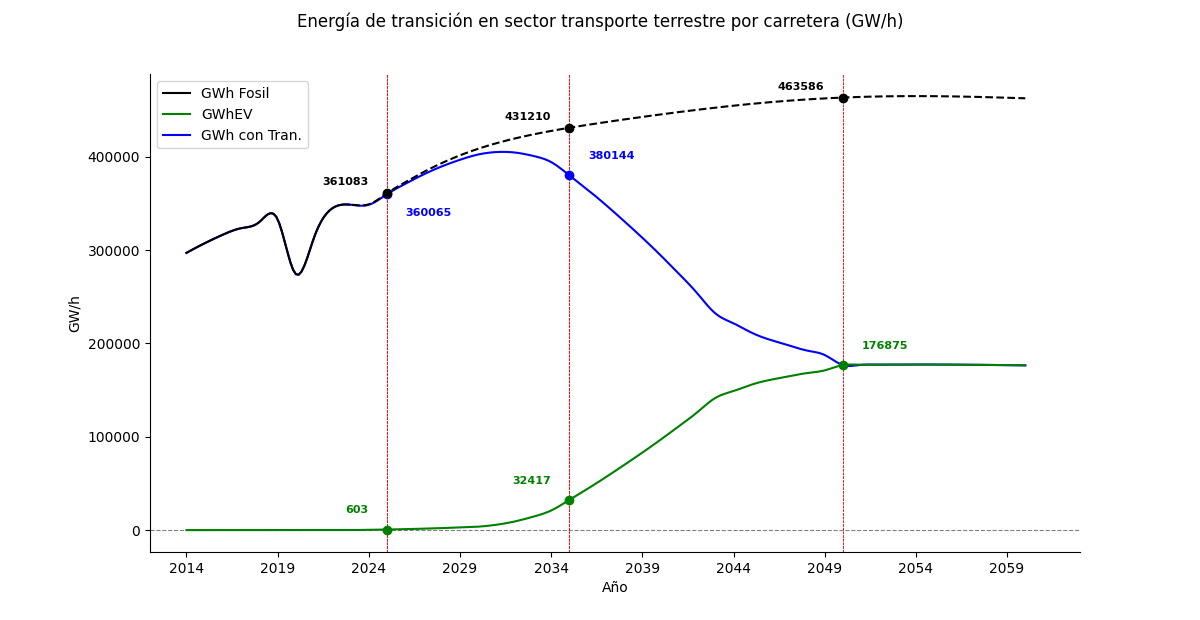

In [89]:
# @title Grafica de la Energía de transición en sector transporte terrestre por carretera (GW/h)

# Definimos una función para graficar una serie suavizada con hitos y etiquetas personalizables
def _plot_smooth_series(series, y_column, series_name, color, label_position, ax, zorder,
                        exclude_last_hito=False):
    # Extraemos los valores de 'Año' y la columna especificada
    xs = series['Año']
    ys = series[y_column]

    # Interpolación suave para una curva continua
    xs_new = np.linspace(xs.min(), xs.max(), 300)
    spline = make_interp_spline(xs, ys, k=3)
    ys_smooth = spline(xs_new)

    # Graficamos la serie suavizada con un zorder especificado
    if y_column == 'GWh Fosil':
        # Línea sólida hasta 2023
        xs_solid = xs_new[xs_new <= 2023]
        ys_solid = spline(xs_solid)
        ax.plot(xs_solid, ys_solid, label=series_name, color=color, zorder=zorder)

        # Línea discontinua después de 2023
        xs_dashed = xs_new[xs_new > 2023]
        ys_dashed = spline(xs_dashed)
        ax.plot(xs_dashed, ys_dashed, linestyle='--', color=color, zorder=zorder)
    else:
        ax.plot(xs_new, ys_smooth, label=series_name, color=color, zorder=zorder)

    # Marcamos los hitos en los años 2025, 2035 y 2050
    for i, year in enumerate([2025, 2035, 2050]):
        if exclude_last_hito and i == 2:
            continue

        if year >= xs.min() and year <= xs.max():
            x_hito = year
            y_hito = spline(x_hito)
            ax.axvline(x=x_hito, color='red', linestyle='--', linewidth=0.5, zorder=1)
            ax.plot(x_hito, y_hito, 'o', color=color, zorder=zorder)

            # Determinamos el desplazamiento para evitar interferencias
            x_offset = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.02
            y_offset = (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.03

            # Ajustes específicos para los hitos solicitados
            if y_column == 'GWh con Tran.' and year == 2035:
                x_pos, y_pos = x_hito + x_offset, y_hito + y_offset
                ha, va = 'left', 'bottom'
            elif y_column == 'GWhEV' and year == 2050:
                x_pos, y_pos = x_hito + x_offset, y_hito + y_offset
                ha, va = 'left', 'bottom'
            elif label_position == 'above_left':
                x_pos, y_pos = x_hito - x_offset, y_hito + y_offset
                ha, va = 'right', 'bottom'
            elif label_position == 'below_right':
                x_pos, y_pos = x_hito + x_offset, y_hito - y_offset
                ha, va = 'left', 'top'

            # Agregamos la etiqueta en la posición calculada
            ax.text(x_pos, y_pos, f'{y_hito:.0f}', color=color, ha=ha, va=va,
                    fontsize=8, weight='bold')

# Configuración de la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6.2))

# Ordenamos el DataFrame por año para asegurar el orden correcto
df_sorted = df50.sort_values('Año', ascending=True)

# Graficamos las series suavizadas con etiquetas personalizables y el zorder definido
_plot_smooth_series(df_sorted, 'GWh Fosil', 'GWh Fosil', color='black',
                    label_position='above_left', ax=ax, zorder=3)
_plot_smooth_series(df_sorted, 'GWhEV', 'GWhEV', color='green',
                    label_position='above_left', ax=ax, zorder=2)
_plot_smooth_series(df_sorted, 'GWh con Tran.', 'GWh con Tran.', color='blue',
                    label_position='below_right', ax=ax, zorder=1,
                    exclude_last_hito=True)

# Configuración del eje X
ax.set_xticks(np.arange(2014, df_sorted['Año'].max() + 1, 5))
ax.set_xlim(2012, 2063)
ax.set_xlabel('Año')
fig.canvas.toolbar_visible = False

# Configuración del eje Y con línea en el eje cero
ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.8, zorder=0)
ax.set_ylabel('GW/h')

# Estilo y leyenda
sns.despine(fig=fig, ax=ax)
fig.suptitle('Energía de transición en sector transporte terrestre por carretera (GW/h)')
ax.legend(loc='upper left')

# Mostramos el gráfico
plt.show()


#### **Observaciones sobre la grafica**

- La grafica representan el proceso transformador en el origen de la energia en el sector transporte terrestre y en como debe de evolucionar sobre una base de minimos de una dependencia directa total de los derivados del petroleo, hasta una dependencia total de la energia electrica, con el proceso transformador de la misma a totalmente verde. Todo ello en una comparativa con la evolucion prevista por el estudio si todo el sector siguiera dependiente totalmente y de forma directa de derivados del petroleo.

- Esto representa un ahorro energetico para el pais en el sector del trasporte terrestre de mas del 60%, pero como vimos mas arriba no tiene por que significar un ahorro final en el trasporte terrestre por carretera tanto de personas como de mercancias. Va a depender de la posibilidad de tener acceso a la recarga de la bateria en lo que hemos denominado 'en origen' o si va depepender de hacerse en estaciones de servicio.

- A nivel personal va a incidir en en nivel de la clase social y sus posibles.

- A nivel de empresas como no trabajan a perdidas el impacto tambien recaera en las personas bien de forma directa en el transporte de viajeros o de forma indirecta a traves de la subida del indice de precios al consumo en el caso de transporte de mercancias.

- A nivel de autonomos y agrario, y con las politicas actuales de desproteccion que hay frente a ellos donde los margenes que les dejan las grandes empresas y distribuidoras los estrangulan puede terminar de ser su ruina o una subida aun mayor en los indices del precio al consumo, a no ser que se mantenga la politica actual de no aplicar impuestos añadidos a la recarga en estaciones de servicio, lo que se traduciria en un impacto enorme el la recaudacion del estado y en sus presupuestos generales.





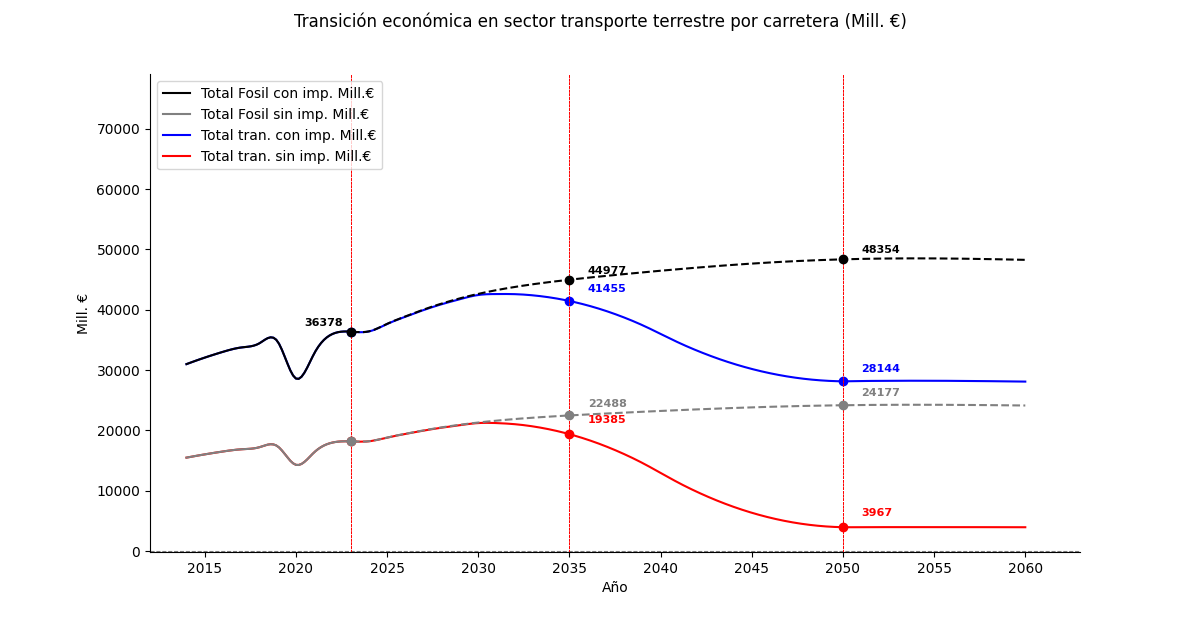

In [90]:
# @title Grafica del impacto macroeconomico en el consumo por la transicion (Mill. €)

# Definimos una función para graficar una serie suavizada con hitos y etiquetas específicas
def plot_smooth_series_with_specific_milestones(
    series, y_column, series_name, color, ax, zorder, milestone_years
):
    # Extraemos los valores de 'Año' y la columna especificada
    xs = series['Año']
    ys = series[y_column]

    # Interpolación suave para una curva continua
    xs_new = np.linspace(xs.min(), xs.max(), 300)
    spline = make_interp_spline(xs, ys, k=3)
    ys_smooth = spline(xs_new)

    # Graficamos la serie suavizada
    if series_name == 'Total Fosil con imp. Mill.€' or series_name == 'Total Fosil sin imp. Mill.€':
        # Línea sólida hasta 2023
        xs_solid = xs_new[xs_new <= 2023]
        ys_solid = spline(xs_solid)
        ax.plot(xs_solid, ys_solid, label=series_name, color=color, zorder=zorder)

        # Línea discontinua después de 2023
        xs_dashed = xs_new[xs_new > 2023]
        ys_dashed = spline(xs_dashed)
        ax.plot(xs_dashed, ys_dashed, linestyle='--', color=color, zorder=zorder)
    else:
        # Línea continua para otras series
        ax.plot(xs_new, ys_smooth, label=series_name, color=color, zorder=zorder)

    # Marcamos y etiquetamos únicamente los hitos específicos
    for year in milestone_years:
        if year >= xs.min() and year <= xs.max():
            x_hito = year
            y_hito = spline(x_hito)
            ax.axvline(x=x_hito, color='red', linestyle='--', linewidth=0.5, zorder=1)
            ax.plot(x_hito, y_hito, 'o', color=color, zorder=zorder)

            # Etiqueta personalizada para el hito 2023
            if year == 2023 and series_name == 'Total Fosil con imp. Mill.€':
                x_offset = -(ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.05  # Desplazamiento horizontal a la izquierda
                y_offset = (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.1  # Desplazamiento vertical hacia arriba
                ax.text(
                    x_hito + x_offset,
                    y_hito + y_offset,
                    f'{y_hito:.0f}',
                    color=color,
                    fontsize=8,
                    weight='bold',
                    ha='left',
                    va='top',
                )
            elif year != 2023:
                # Etiquetas normales para otros hitos
                x_offset = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.02
                y_offset = (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.03
                ax.text(
                    x_hito + x_offset,
                    y_hito + y_offset,
                    f'{y_hito:.0f}',
                    color=color,
                    fontsize=8,
                    weight='bold',
                    ha='left',
                    va='bottom',
                )

# Configuración de la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6.2))

# Ordenamos el DataFrame por año para asegurar el orden correcto
df_sorted = df50.sort_values('Año', ascending=True)

# Definimos los hitos específicos
milestone_years = [2023, 2035, 2050]

# Graficamos las series suavizadas
plot_smooth_series_with_specific_milestones(
    df_sorted,
    'Total Fosil con imp. Mill.€',
    'Total Fosil con imp. Mill.€',
    color='black',
    ax=ax,
    zorder=2,
    milestone_years=milestone_years,
)
plot_smooth_series_with_specific_milestones(
    df_sorted,
    'Total Fosil sin imp. Mill.€',
    'Total Fosil sin imp. Mill.€',
    color='gray',
    ax=ax,
    zorder=3,  # Colocamos esta serie detrás de las demás
    milestone_years=milestone_years
)
plot_smooth_series_with_specific_milestones(
    df_sorted,
    'Total tran. con imp. Mill.€',
    'Total tran. con imp. Mill.€',
    color='blue',
    ax=ax,
    zorder=0,
    milestone_years=milestone_years,
)
plot_smooth_series_with_specific_milestones(
    df_sorted,
    'Total tran. sin imp. Mill.€',
    'Total tran. sin imp. Mill.€',
    color='red',
    ax=ax,
    zorder=1,
    milestone_years=milestone_years,
)

# Configuración del eje X
ax.set_xticks(np.arange(2015, 2061, 5))  # Marcadores visibles de 2015 a 2060 en pasos de 5
ax.set_xlim(2012, 2063)  # Límites completos del eje X
ax.set_xlabel('Año')
fig.canvas.toolbar_visible = False

# Configuración del eje Y con línea en el eje cero
ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.8, zorder=0)
ax.set_ylim(-110, 79000)  # Ajuste del eje Y desde -110 hasta 74000
ax.set_ylabel('Mill. €')

# Estilo y leyenda
sns.despine(fig=fig, ax=ax)
fig.suptitle('Transición económica en sector transporte terrestre por carretera (Mill. €)')
ax.legend(loc='upper left')

# Mostramos el gráfico
plt.show()


#### **Observaciones sobre la grafica**

- De graficas anteriores hemos visto que a nivel personal va a ser una energia mas cara, (excepto en recargas particulares), de forma directa. De forma indirecta lo va ser tambien atraves de la subida del IPC como consecuencia de la amortizacion de gastos extra 'in itinere' o inversiones para evitarlas por parte de empresas y autonmos.

- Sin embargo en la grafica vemos que a nivel macroeconomico, como el consumo energetico disminuye mucho si va a haber un ahorro, representado principalmente en la curva azul (por que el gobierno mantendra sus impuestos). Sin embargo hay quien no consideraria esto ahorro, por dos razones:
 - La citada anteriormente de que para muchas familias no sera tal ahorro y haber como suben los sueldos los poximos 25 años porque ante subidas del IPC la CEE recomienda congelacion.
 - La segunda es por que este ahorro en realidad representa perdida del PIB que se traduce en un pais mas empobrecido. Aunque no sera tanto porque los 28.221 millones de € perdidos representan solo un 0.05% del PIB español

- Tambien se simula como seria el monto si el gobierno decide que no se puede permitir la perdida en la recaudacion y decide implantarla, de lo que hablamos con anterioridad

- En la grafica no se ha tenido en cuenta como afectara la mejora en la eficiencia de las baterias, (que bajara el precio), ni como iran subiendo los precios de la energia eletrica verde por parte de las energeticas al no disponer de proyecciones de las mismas. Si se a considerado que en el 2050 toda la energia producida debe de ser verde y se le ha aplicado el precio actual.

- El hito del 2050 de la linea roja representa tambien el incremento en la demanda final energetica que repercutira en un incremento de los beneficios de las empresas energeticas. El proceso de transicion de la linea roja no afecta a esto ya que tiene en cuenta el periodo de transicion con energia fosil.

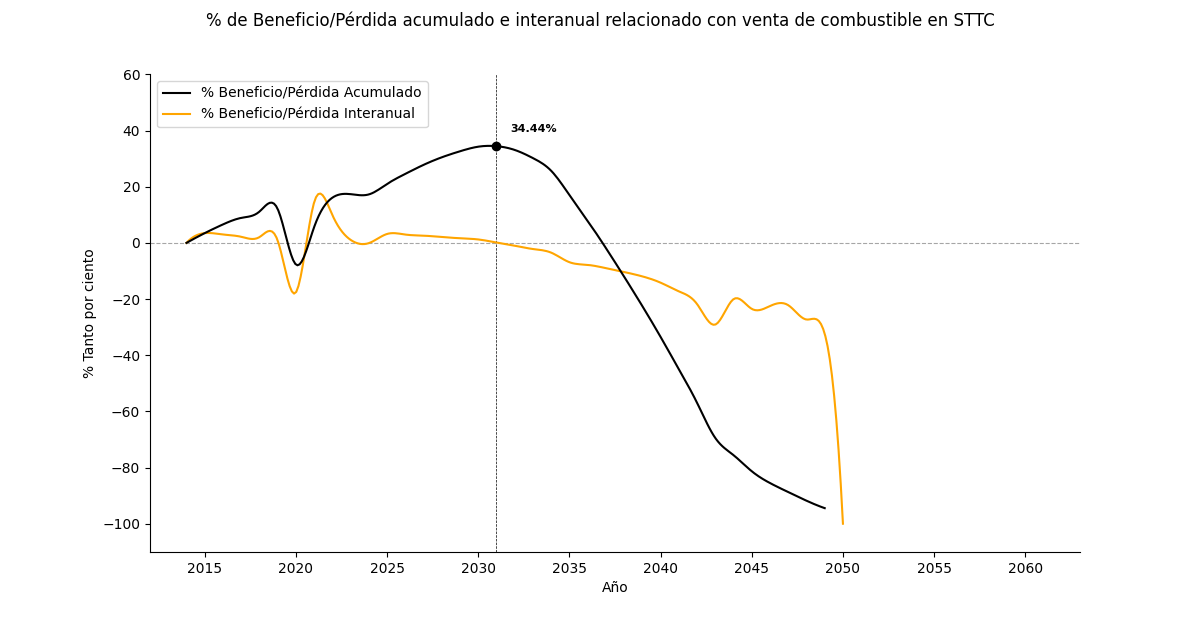

In [91]:
# @title Grafica de % de Beneficio/Pérdida acumulado relacionado con venta de combustible en STTC (referenciado al 2014)

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import seaborn as sns
import mplcursors

# Definimos una función para graficar una serie suavizada y manejar NaN e infinitos
def plot_smooth_series(
    series, x_column, y_column, series_name, color, ax, zorder, linestyle='-',
    add_max_hito=False
):
    # Filtrar filas con valores válidos en las columnas especificadas
    valid_series = series.dropna(subset=[x_column, y_column])

    # Extraemos los valores de 'Año' y la columna especificada
    xs = valid_series[x_column]
    ys = valid_series[y_column]

    # Interpolación suave para una curva continua
    xs_new = np.linspace(xs.min(), xs.max(), 300)
    spline = make_interp_spline(xs, ys, k=3)
    ys_smooth = spline(xs_new)

    # Graficamos la serie suavizada
    line, = ax.plot(xs_new, ys_smooth, label=series_name, color=color, linestyle=linestyle, zorder=zorder)

    # Añadimos el hito para el valor máximo si está indicado
    if add_max_hito:
        max_value_index = valid_series[y_column].idxmax()
        max_year = valid_series.loc[max_value_index, x_column]
        max_value = valid_series.loc[max_value_index, y_column]

        # Marcamos y etiquetamos el hito del máximo
        x_hito = max_year
        y_hito = spline(x_hito)
        ax.axvline(x=x_hito, color=color, linestyle='--', linewidth=0.5, zorder=1)
        ax.plot(x_hito, y_hito, 'o', color=color, zorder=zorder)

        # Etiqueta del hito máximo
        x_offset = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.02
        y_offset = (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.03
        ax.text(
            x_hito + x_offset,
            y_hito + y_offset,
            f'{max_value:.2f}%',
            color=color,
            fontsize=8,
            weight='bold',
            ha='left',
            va='bottom',
        )

    return line  # Retornamos la línea graficada para usarla con mplcursors

# Configuración de la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6.2))

# Graficamos la primera serie suavizada en negro
line1 = plot_smooth_series(
    series=df50,
    x_column='Año',
    y_column='% de benef/perd acumulado',
    series_name='% Beneficio/Pérdida Acumulado',
    color='black',
    ax=ax,
    zorder=3,
    add_max_hito=True  # Agregar hito para el máximo
)

# Graficamos la segunda serie suavizada en naranja
line2 = plot_smooth_series(
    series=df50,
    x_column='Año',
    y_column='% de benef/perd interanual',
    series_name='% Beneficio/Pérdida Interanual',
    color='orange',
    ax=ax,
    zorder=2,
    add_max_hito=False  # No agregar hito para esta serie
)

# Configuración del eje X
ax.set_xticks(np.arange(2015, 2061, 5))  # Marcadores visibles de 2015 a 2060 en pasos de 5
ax.set_xlim(2012, 2063)  # Límites completos del eje X
ax.set_xlabel('Año')

# Configuración del eje Y
ax.set_ylim(-110, 60)  # Ajustar el eje Y entre -110% y +60%
ax.set_ylabel('% Tanto por ciento')
fig.canvas.toolbar_visible = False

# Línea discontinua para el valor 0 del eje Y
ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.8, zorder=0, alpha=0.7)

# Estilo y leyenda
sns.despine(fig=fig, ax=ax)
fig.suptitle('% de Beneficio/Pérdida acumulado e interanual relacionado con venta de combustible en STTC')
ax.legend(loc='upper left')

# Interactividad con mplcursors para ambas curvas
cursor = mplcursors.cursor([line1, line2], hover=True)

@cursor.connect("add")
def on_add(sel):
    # Identificamos qué línea ha sido seleccionada y asignamos el color correspondiente
    if sel.artist == line1:
        serie = '% Beneficio/Pérdida Acumulado'
        color = 'black'
    elif sel.artist == line2:
        serie = '% Beneficio/Pérdida Interanual'
        color = 'orange'

    # Configuramos el texto de la etiqueta
    x_data, y_data = sel.target
    sel.annotation.set_text(f'Año: {int(x_data)}\n{serie}: {y_data:.0f}')

    # Configuramos el estilo de la etiqueta con el color de la curva
    sel.annotation.get_bbox_patch().set(alpha=0.8, color='white', edgecolor=color)

# Mostramos el gráfico
plt.show()


#### **Observaciones sobre la grafica**

-Si la CEE sigue con su plan previsto esto pueda dar tambien una idea a inversionistas sobre el futuro de ciertos mercados, que a priori significa perdidas en el mercado del petroleo pero ganancias en el mercado de la energia electrica.

- En la grafica vemos como se reducen los 'beneficios' brutos de las petroleras. **PERO OJO!!!**, el termino beneficio no es el mas correcto lo que representamos mas bien la reduccion de costes en el consumo de combustibles derivados del petroleo. Al no disponer del margen de beneficio de una petrolera por litro de combustible vendido no podemos saber la reduccion de beneficios real. Por eso lo vamos a expresar como un % en lugar de en euros, y **TENIENDO SIEMPRE PRESENTE** que no es el beneficio final de las companias sino el margen correspondiente a la produccion y venta de gasolina y diesel destinado al sector transporte terrestre. ** NO CONFUNDIR CON LAS ACCIONES EN BOLSA**

-¿Como afecta especialmente a las petroleras y a sus refinerias?
 - Por un lado parece indudable que va haber una reduccion drastica en el consumo del petroleo (el 56% del petroleo que consume España se dedica al sector transporte y de ese un 90% solo al sector carretera).
 - Pero no solo eso, aunque probablemente hara falta un residual de derivados del petroleo para la combustion para ciertos sectores estrategicos como el militar, aviacion civil y maritimo, el petroleo sigue siendo necesario dada la cantidad de articulos que usamos en nuestra vida que son tambien sus derivados, y que afecta principalmente a la produccion de plasticos tecnicos, grafeno, textiles, etc... y que supone una transformacion drastica, bien por modernizacion, bien por extincion y creacion de otras, de las refinerias especializadas en la obtencion de combustibles por decantacion en otras de extraccion de otros deribados, lo que supondra una fuerte inversion necesaria en el sector para no se sabe que margen de beneficio.
 - Esto no quiere decir que la empresas de este sector desaparezcan o que esten abocadas a perdidas tan grandes que las hagan desaparecer. Quiere decir que necesitan un fuerte reconversion para adaptarse a la demanda requerida de productos deribados del petroleo potenciando incluso algunos que aun estan en via de expansion. Por poner un ejemplo, fomentar el panel solar de grafeno o paneles solares flexibles con esta misma base de manera que aumente mucho la demanda de grafeno, cuya forma mas facil y barata de producirlo es atraves del petroleo.

# CONCLUSIONES

- Mas caro para familias, empresas y autonomos
- Aumenta la brecha de clases
- Incremento adicional del IPC y bajada adicional del PIB
- Incertidumbre en el sector del automovil
- Incertidumbre en las finanzas relacionadas con el sector petroleo

# EN RESUMEN, SE A LUCIDO LA CEE

# Dudas en el aire y desafíos:

- ¿Dónde y cómo se aplicarán los impuestos que no son progresivos de manera que afecten lo menos posible a las clases bajas?
- Desafío de la automoción por hidrógeno para ser competitiva (símil diésel vs. gasolina).
- ¿Dónde quedaría el futuro del hidrógeno (noche, falta de viento y sol, transporte aéreo o marítimo)?
- ¿Hay futuro para el e-fuel?
- ¿Hacen falta más presas? Reto hidráulico.